# "Ciencia de Datos Aplicada al Comercio Minorista: Efecto del Preprocesamiento y del Análisis Exploratorio de Datos en la Toma de Decisiones Estratégicas (2022–2024)"

### Curso: Limpieza y Manipulación de Datos
### Maestria de Ciencia de Datos de la Universidad Continental, Perú - 2025

## Grupo # 1
- Cynthia Marin Quiroz
- Bernabé Gonzales García
- Fabian Alexander Herrera Aguayo
- Jhordy Burga Dominguez
- Enrique Jose Sanchez Arenas

# 01.- Descripción del Data set y fuente
El presente conjunto de datos representan las transacciones de venta de una tienda minorista que incluye ocho categorías de productos con 25 artículos por categoría, cada una con precios fijos.

Puede ser de fácil acceso mediante el siguiente link: https://www.kaggle.com/datasets/ahmedmohamed2003/retail-store-sales-dirty-for-data-cleaning

# 02.- Librerías utilizadas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import math
import warnings
warnings.filterwarnings("ignore", message="Glyph .* missing from font")
warnings.filterwarnings("ignore", category=FutureWarning)
import missingno as msno

# 03.- Carga del Data Set

In [2]:
try:
  # Nombre del archivo
  nombre_archivo = 'retail_store_sales.csv'

  # Lectura del archivo
  data = pd.read_csv(nombre_archivo,sep=',')

  # Mensaje de carga exitosa
  print("El Data set fue cargado satisfactoriamente.")

#Mensaje de error en la carga
except FileNotFoundError:
  print("Error: No se encunetra el archivo.")
  print("Asegúrese de que el archivo del Data set se encuentre en el directorio.")

El Data set fue cargado satisfactoriamente.


#  04.- Análisis Exploratorio de Datos (EDA)

## 04.1.- Tamaño del Data Set

In [3]:
print(f'El Data set tiene {data.shape[0]} filas y {data.shape[1]} columnas.')

El Data set tiene 12575 filas y 11 columnas.


## 04.2.- Encabezados del Data Set

In [4]:
data.head(5)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


## 04.3.- Tipo de datos del Data Set

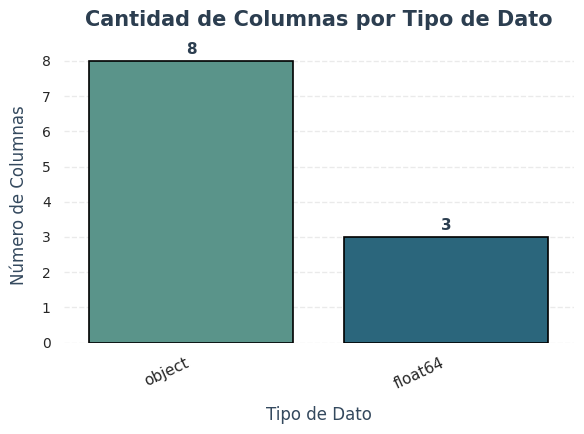

In [5]:
def grafica_tipo_datos(df):
    # Preparación de datos
    tipos = df.dtypes.value_counts().reset_index()
    tipos.columns = ['Tipo de Dato', 'Número de Columnas']

    # Configuración de estilo visual
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(6, 4.5))

    # Paleta elegante azul petróleo → verde agua
    colores = sns.color_palette("crest", n_colors=len(tipos))

    # Gráfico (corrigido: se agrega hue para evitar FutureWarning)
    ax = sns.barplot(
        data=tipos,
        x='Tipo de Dato',
        y='Número de Columnas',
        hue='Tipo de Dato',
        palette=colores,
        legend=False,                # evita mostrar leyenda redundante
        edgecolor='black',
        linewidth=1.2
    )

    # Título y ejes
    ax.set_title(
        "Cantidad de Columnas por Tipo de Dato",
        fontsize=15, fontweight='bold', color='#2c3e50', pad=15
    )
    ax.set_xlabel("Tipo de Dato", fontsize=12, labelpad=10, color='#34495e')
    ax.set_ylabel("Número de Columnas", fontsize=12, labelpad=10, color='#34495e')

    # Etiquetas sobre las barras
    for container in ax.containers:
        ax.bar_label(
            container,
            fmt='%d',
            label_type='edge',
            padding=3,
            color='#2c3e50',
            fontsize=11,
            fontweight='bold'
        )

    # Detalles estéticos
    sns.despine(left=True, bottom=True)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.xticks(rotation=25, ha='right', fontsize=11)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

grafica_tipo_datos(data)

## 04.4.- Calidad de los datos

In [6]:
def dashboard_calidad_dato(df):
    """
    Dashboard integral de calidad de datos:
    Muestra:
      - Nombre de columna
      - Tipo de dato
      - Celdas vacías y %
      - Valores únicos y %
      - Valores no nulos y %
      - Valores nulos y %
    Ordenado descendentemente por % de valores nulos.
    Heatmap aplicado solo a la columna "% de valores nulos".
    """

    # Cálculos base
    total_rows, total_cols = df.shape
    total_cells = df.size
    total_duplicates = df.duplicated().sum()

    # Métricas por columna
    tipo_dato = df.dtypes
    null_count = df.isnull().sum()
    non_null_count = df.notnull().sum()
    unique_count = df.nunique()

    # Considerar "celdas vacías" como aquellas con string vacío o solo espacios
    empty_count = df.apply(lambda col: col.astype(str).str.strip().eq("").sum())

    # Porcentajes
    null_percent = (null_count / len(df)) * 100
    non_null_percent = (non_null_count / len(df)) * 100
    empty_percent = (empty_count / len(df)) * 100
    unique_percent = (unique_count / len(df)) * 100

    # Construcción del resumen
    resumen = pd.DataFrame({
        'Nombre de Columna': df.columns,
        'Tipo de Dato': tipo_dato.values,
        'Celdas Vacías': empty_count.values,
        '% Celdas Vacías': empty_percent.round(2),
        'Valores Únicos': unique_count.values,
        '% Valores Únicos': unique_percent.round(2),
        'Valores No Nulos': non_null_count.values,
        '% Valores No Nulos': non_null_percent.round(2),
        'Valores Nulos': null_count.values,
        '% Valores Nulos': null_percent.round(2)
    })

    # Orden descendente por % de valores nulos
    resumen = resumen.sort_values(by='% Valores Nulos', ascending=False).reset_index(drop=True)

    # Resumen global
    total_missing_cells = null_count.sum()
    overall_missing_percent = (total_missing_cells / total_cells) * 100

    print("🔍 RESUMEN PRELIMINAR DE CALIDAD DE DATOS")
    print("═" * 50)
    print(f"Filas totales: {total_rows:,}")
    print(f"Columnas totales: {total_cols}")
    print(f"Total de celdas nulas: {total_missing_cells:,} ({overall_missing_percent:.2f}%)")
    print(f"Filas duplicadas: {total_duplicates:,}")
    print(f"Celdas totales analizadas: {total_cells:,}")
    print(f"═" * 50,"\n")

    # Paleta tipo heatmap (verde → amarillo → rojo)
    cmap = sns.color_palette("RdYlGn_r", as_cmap=True)

    # Estilo visual
    styled = (
        resumen.style
        .background_gradient(cmap=cmap, subset=['% Valores Nulos'])  # Heatmap solo en esta columna
        .format({
            'Celdas Vacías': '{:,}',
            '% Celdas Vacías': '{:.2f}%',
            'Valores Únicos': '{:,}',
            '% Valores Únicos': '{:.2f}%',
            'Valores No Nulos': '{:,}',
            '% Valores No Nulos': '{:.2f}%',
            'Valores Nulos': '{:,}',
            '% Valores Nulos': '{:.2f}%'
        })
        .set_caption("Dashboard de Calidad de Datos")
        .set_table_styles([
            {'selector': 'caption', 'props': [
                ('font-size', '16px'),
                ('font-weight', 'bold'),
                ('text-align', 'left'),
                ('color', '#2c3e50')
            ]},
            {'selector': 'th', 'props': [
                ('background-color', '#f4f4f4'),
                ('color', '#333'),
                ('text-align', 'center'),
                ('font-weight', 'bold')
            ]},
            {'selector': 'td', 'props': [('text-align', 'center')]}
        ])
    )

    return styled

dashboard_calidad_dato(data)

🔍 RESUMEN PRELIMINAR DE CALIDAD DE DATOS
══════════════════════════════════════════════════
Filas totales: 12,575
Columnas totales: 11
Total de celdas nulas: 7,229 (5.23%)
Filas duplicadas: 0
Celdas totales analizadas: 138,325
══════════════════════════════════════════════════ 



,Nombre de Columna,Tipo de Dato,Celdas Vacías,% Celdas Vacías,Valores Únicos,% Valores Únicos,Valores No Nulos,% Valores No Nulos,Valores Nulos,% Valores Nulos
0,Discount Applied,object,0,0.00%,2,0.02%,"8,376",66.61%,"4,199",33.39%
1,Item,object,0,0.00%,200,1.59%,"11,362",90.35%,"1,213",9.65%
2,Price Per Unit,float64,0,0.00%,25,0.20%,"11,966",95.16%,609,4.84%
3,Total Spent,float64,0,0.00%,227,1.81%,"11,971",95.20%,604,4.80%
4,Quantity,float64,0,0.00%,10,0.08%,"11,971",95.20%,604,4.80%
5,Transaction ID,object,0,0.00%,"12,575",100.00%,"12,575",100.00%,0,0.00%
6,Customer ID,object,0,0.00%,25,0.20%,"12,575",100.00%,0,0.00%
7,Category,object,0,0.00%,8,0.06%,"12,575",100.00%,0,0.00%
8,Payment Method,object,0,0.00%,3,0.02%,"12,575",100.00%,0,0.00%
9,Location,object,0,0.00%,2,0.02%,"12,575",100.00%,0,0.00%


Las variables "Item" y "Price Per Unit" son identificadores críticos para la venta. Eliminar filas sin hacer una análisis provocaría una gran pérdida de información, sobre todo teniendo que el 9.65% es significativo.

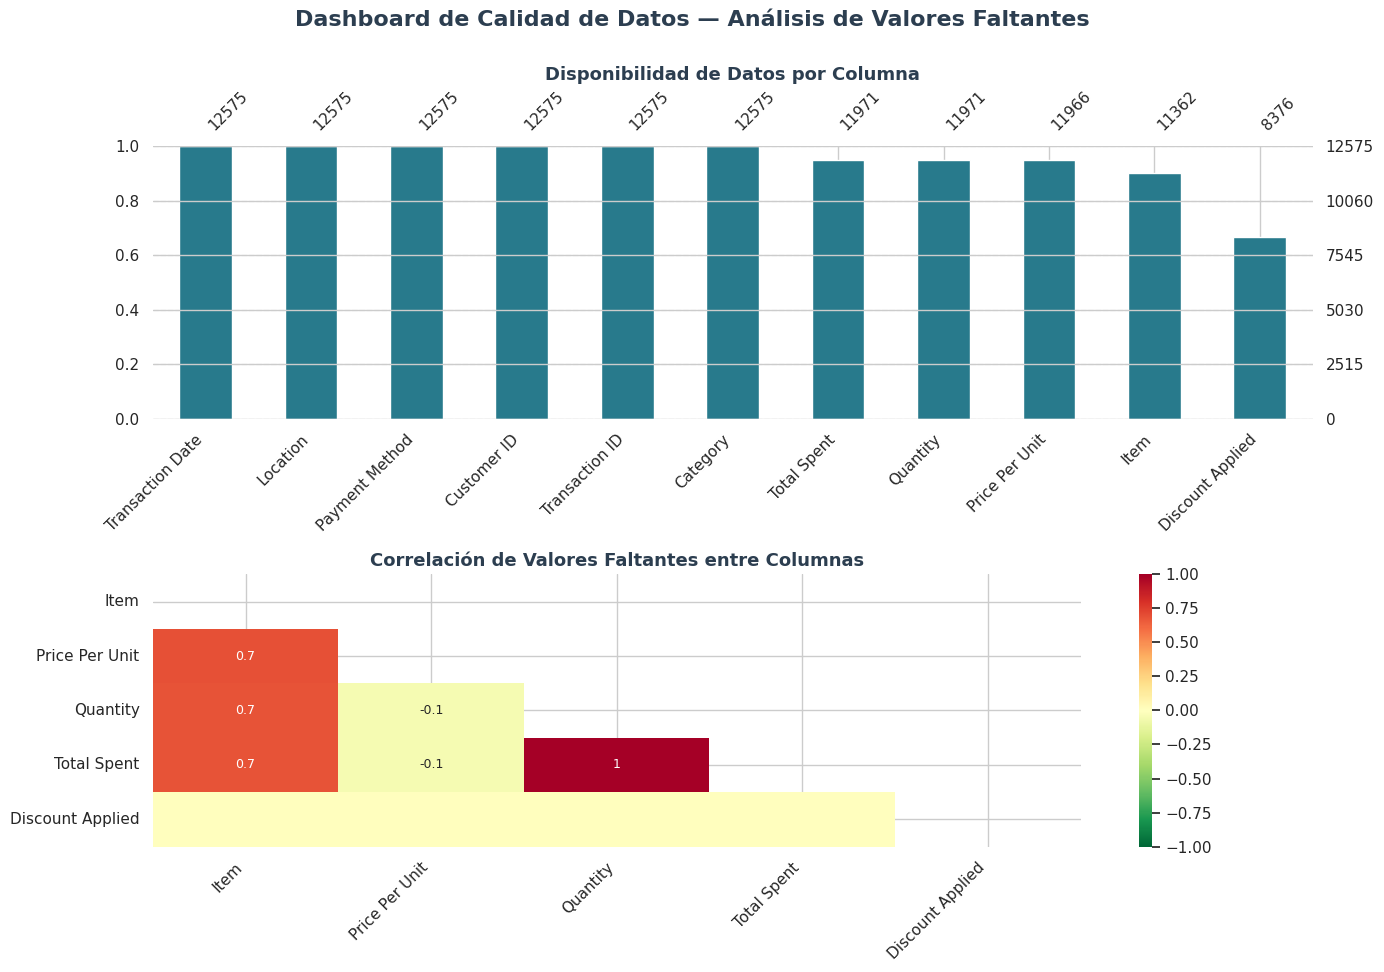

🔍 CORRELACIÓN DE VALORES FALTANTES
══════════════════════════════════════════════════
📈 0.7 → 70% coincidencia de que la otra columna tenga faltantes
🎯 1.0 → 100% coincidencia de que la otra columna tenga faltantes
📊 Patrón: NaN se agrupan en filas. Hay filas incompletas donde faltan todas las columnas relacionadas con ventas.


In [7]:
def graficos_calidad_datos(df):
    """
    Dashboard profesional de calidad de datos:
    - Gráfico de barras con completitud de columnas.
    - Heatmap de correlación de valores faltantes.
    """

    # Configuración general
    sns.set_theme(style="whitegrid")
    plt.rcParams.update({'axes.titlesize': 13, 'axes.labelsize': 11})
    fig = plt.figure(figsize=(14, 10))
    fig.suptitle(
        "Dashboard de Calidad de Datos — Análisis de Valores Faltantes",
        fontsize=16, fontweight='bold', color='#2c3e50', y=0.97
    )

    # Paleta armónica
    paleta = sns.color_palette("crest", as_cmap=False)
    color_bar = paleta[3]

    # Gráfico de barras (completitud)
    ax1 = plt.subplot(2, 1, 1)
    msno.bar(df, color=color_bar, ax=ax1, fontsize=11, sort='descending')
    ax1.set_title("Disponibilidad de Datos por Columna", fontsize=13, fontweight='bold', color='#2c3e50')
    ax1.grid(axis='y', linestyle='--', alpha=0.3)

    # Mapa de correlación de valores faltantes
    ax2 = plt.subplot(2, 1, 2)
    msno.heatmap(df, ax=ax2, cmap='RdYlGn_r', fontsize=11)
    ax2.set_title("Correlación de Valores Faltantes entre Columnas", fontsize=13, fontweight='bold', color='#2c3e50')

    # Ajustes visuales
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

graficos_calidad_datos(data)

print("🔍 CORRELACIÓN DE VALORES FALTANTES")
print("═" * 50)
print("📈 0.7 → 70% coincidencia de que la otra columna tenga faltantes")
print("🎯 1.0 → 100% coincidencia de que la otra columna tenga faltantes")
print("📊 Patrón: NaN se agrupan en filas. Hay filas incompletas donde faltan todas las columnas relacionadas con ventas.")

## 04.5.- Caracteristicas de las variables númericas

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price Per Unit,11966.0,23.365912,10.743519,5.0,14.0,23.0,33.5,41.0
Quantity,11971.0,5.536380,2.857883,1.0,3.0,6.0,8.0,10.0
Total Spent,11971.0,129.652577,94.750697,5.0,51.0,108.5,192.0,410.0


## 04.6.- Gráficos de distribución, Boxplots y Barras

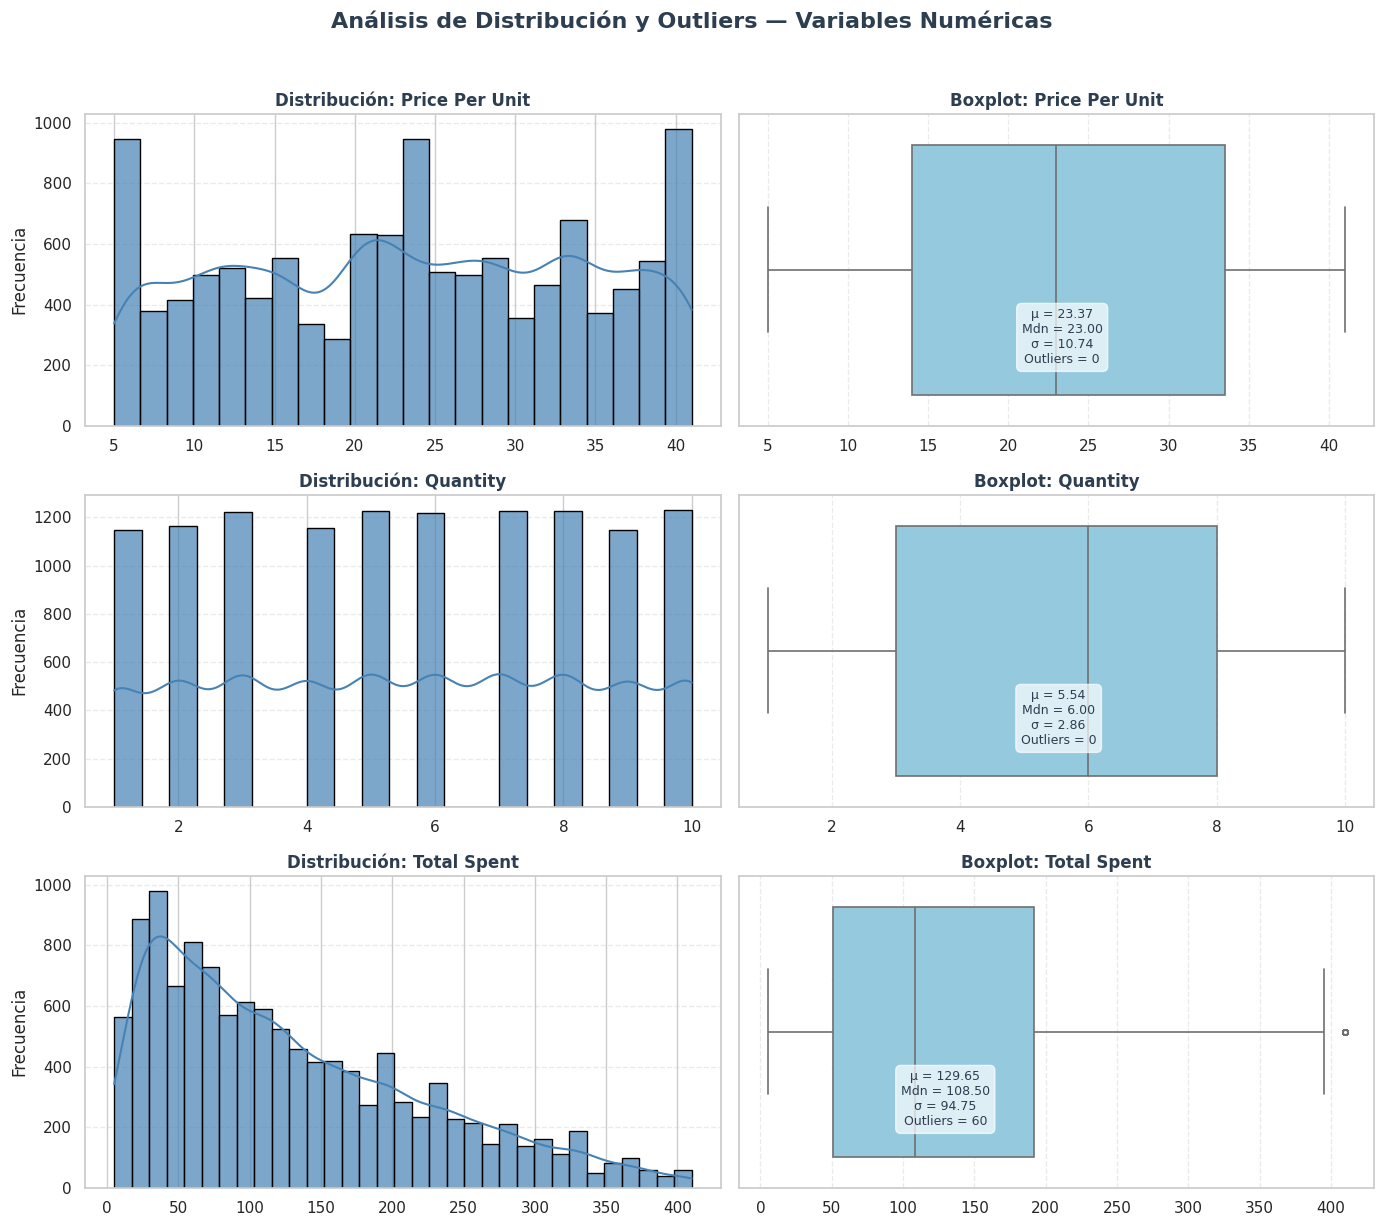


🎯 ANÁLISIS DE DISTRIBUCIONES
════════════════════════════════════════════════════════════

📊 VARIABLE: PRICE PER UNIT
────────────────────────────────────────
   📈 ESTADÍSTICAS DESCRIPTIVAS:
      • Media: 23.37
      • Mediana: 23.00
      • Desviación estándar: 10.74
      • Rango: 5.00 - 41.00
      • Coeficiente de variación: 46.0%
   📊 FORMA DE LA DISTRIBUCIÓN:
      • Asimetría: -0.03
      • Curtosis: -1.17
      • Interpretación: Simétrica
   🔍 ANÁLISIS DE OUTLIERS:
      • Número de outliers: 0
      • Porcentaje: 0.0%
      • Rango IQR: [14.00, 33.50]
   💡 INSIGHTS ACCIONABLES:
      • 📊 VARIABILIDAD MODERADA: Dispersión aceptable
      • ✅ OUTLIERS MÍNIMOS: Datos limpios

📊 VARIABLE: QUANTITY
────────────────────────────────────────
   📈 ESTADÍSTICAS DESCRIPTIVAS:
      • Media: 5.54
      • Mediana: 6.00
      • Desviación estándar: 2.86
      • Rango: 1.00 - 10.00
      • Coeficiente de variación: 51.6%
   📊 FORMA DE LA DISTRIBUCIÓN:
      • Asimetría: -0.01
      • Curto

In [9]:
def distribucion_y_boxplots(df, columnas=None):
    """
    Muestra histogramas y boxplots (con outliers en rojo) para las variables numéricas.
    Cada variable se representa en una fila: histograma (izquierda) y boxplot (derecha).
    Incluye un resumen ejecutivo con insights accionables.
    """

    # Selección de todas las columnas numéricas en caso no se especifiquen
    if columnas is None:
        columnas = df.select_dtypes(include=['number']).columns.tolist()

    num_cols = len(columnas)
    if num_cols == 0:
        print("No se encontraron columnas numéricas para graficar.")
        return

    # Configuración del estilo visual
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(14, num_cols * 4))
    fig.subplots_adjust(hspace=0.35)

    # Si hay solo una variable, mantener formato de array
    if num_cols == 1:
        axes = np.array([axes])

    # Almacenar estadísticas para el resumen ejecutivo
    resumen_estadisticas = {}

    # Generar gráficos por variable
    for i, col in enumerate(columnas):
        data = df[col].dropna()

        # Calcular estadísticas básicas
        media = data.mean()
        mediana = data.median()
        std = data.std()
        cv = (std / media) * 100  # Coeficiente de variación
        asimetria = data.skew()
        curtosis = data.kurtosis()

        # Detección de outliers (rango intercuartílico)
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = ((data < lower) | (data > upper)).sum()
        porcentaje_outliers = (outliers / len(data)) * 100

        # Almacenar estadísticas para el resumen
        resumen_estadisticas[col] = {
            'media': media,
            'mediana': mediana,
            'std': std,
            'cv': cv,
            'asimetria': asimetria,
            'curtosis': curtosis,
            'outliers': outliers,
            'porcentaje_outliers': porcentaje_outliers,
            'q1': Q1,
            'q3': Q3,
            'iqr': IQR,
            'min': data.min(),
            'max': data.max()
        }

        # Histograma (columna izquierda)
        ax_hist = axes[i, 0]
        sns.histplot(data, kde=True, color='steelblue', edgecolor='black', alpha=0.7, ax=ax_hist)
        ax_hist.set_title(f"Distribución: {col}", fontsize=12, fontweight='bold', color='#2c3e50')
        ax_hist.set_xlabel("")
        ax_hist.set_ylabel("Frecuencia")
        ax_hist.grid(axis='y', linestyle='--', alpha=0.4)

        # Boxplot (columna derecha)
        ax_box = axes[i, 1]
        sns.boxplot(
            x=data,
            color='skyblue',
            fliersize=4,
            linewidth=1.2,
            flierprops=dict(marker='o', color='red', alpha=0.6),
            ax=ax_box
        )
        ax_box.set_title(f"Boxplot: {col}", fontsize=12, fontweight='bold', color='#2c3e50')
        ax_box.set_xlabel("")
        ax_box.grid(axis='x', linestyle='--', alpha=0.4)

        # Mostrar estadísticas dentro del boxplot
        texto = (
            f"μ = {media:.2f}\n"
            f"Mdn = {mediana:.2f}\n"
            f"σ = {std:.2f}\n"
            f"Outliers = {outliers}"
        )
        ax_box.text(
            x=data.mean(),
            y=0.3,
            s=texto,
            fontsize=9,
            color='#2c3e50',
            bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.4'),
            ha='center'
        )

    # Título general
    plt.suptitle(
        "Análisis de Distribución y Outliers — Variables Numéricas",
        fontsize=16,
        fontweight='bold',
        color='#2c3e50',
        y=1.02
    )
    plt.tight_layout()
    plt.show()

    # GENERAR RESUMEN EJECUTIVO
    _generar_resumen_ejecutivo(resumen_estadisticas)

def _generar_resumen_ejecutivo(resumen_estadisticas):
    """
    Genera un resumen ejecutivo con insights accionables basados en las estadísticas
    """
    print("\n🎯 ANÁLISIS DE DISTRIBUCIONES")
    print("═" * 60)

    for variable, stats in resumen_estadisticas.items():
        print(f"\n📊 VARIABLE: {variable.upper()}")
        print("─" * 40)

        # Estadísticas básicas
        print(f"   📈 ESTADÍSTICAS DESCRIPTIVAS:")
        print(f"      • Media: {stats['media']:.2f}")
        print(f"      • Mediana: {stats['mediana']:.2f}")
        print(f"      • Desviación estándar: {stats['std']:.2f}")
        print(f"      • Rango: {stats['min']:.2f} - {stats['max']:.2f}")
        print(f"      • Coeficiente de variación: {stats['cv']:.1f}%")

        # Análisis de forma de distribución
        print(f"   📊 FORMA DE LA DISTRIBUCIÓN:")
        print(f"      • Asimetría: {stats['asimetria']:.2f}")
        print(f"      • Curtosis: {stats['curtosis']:.2f}")

        # Interpretación de asimetría
        if abs(stats['asimetria']) < 0.5:
            forma = "Simétrica"
        elif stats['asimetria'] > 0:
            forma = "Sesgo positivo (cola a la derecha)"
        else:
            forma = "Sesgo negativo (cola a la izquierda)"
        print(f"      • Interpretación: {forma}")

        # Análisis de outliers
        print(f"   🔍 ANÁLISIS DE OUTLIERS:")
        print(f"      • Número de outliers: {stats['outliers']}")
        print(f"      • Porcentaje: {stats['porcentaje_outliers']:.1f}%")
        print(f"      • Rango IQR: [{stats['q1']:.2f}, {stats['q3']:.2f}]")

        # INSIGHTS ACCIONABLES
        print(f"   💡 INSIGHTS ACCIONABLES:")

        # Insight 1: Variabilidad
        if stats['cv'] > 50:
            print(f"      • ⚠️  ALTA VARIABILIDAD: Los datos son muy dispersos")
        elif stats['cv'] > 20:
            print(f"      • 📊 VARIABILIDAD MODERADA: Dispersión aceptable")
        else:
            print(f"      • ✅ BAJA VARIABILIDAD: Datos consistentes")

        # Insight 2: Outliers
        if stats['porcentaje_outliers'] > 5:
            print(f"      • 🚨 ALTO NIVEL DE OUTLIERS: Revisar calidad de datos")
        elif stats['porcentaje_outliers'] > 1:
            print(f"      • 📈 OUTLIERS MODERADOS: Considerar transformaciones")
        else:
            print(f"      • ✅ OUTLIERS MÍNIMOS: Datos limpios")

        # Insight 3: Relación media-mediana
        diff_media_mediana = abs(stats['media'] - stats['mediana'])
        if diff_media_mediana > (0.1 * stats['media']):
            print(f"      • 📉 SESGO DETECTADO: Media y mediana difieren significativamente")

        # Insight 4: Recomendaciones específicas por variable
        if "Price" in variable.lower():
            print(f"      • 💰 PRECIOS: Verificar estrategia de precios")
        elif "Quantity" in variable.lower():
            print(f"      • 📦 CANTIDAD: Analizar patrones de demanda")
        elif "Total" in variable.lower():
            print(f"      • 🏷️  VENTAS: Revisar transacciones atípicas")

    # RESUMEN COMPARATIVO GENERAL
    print(f"\n🏆 RESUMEN COMPARATIVO GENERAL")
    print("─" * 40)

    # Variable con mayor variabilidad
    mayor_cv = max(resumen_estadisticas.items(), key=lambda x: x[1]['cv'])
    print(f"   • Mayor variabilidad: {mayor_cv[0]} ({mayor_cv[1]['cv']:.1f}%)")

    # Variable con más outliers
    mayor_outliers = max(resumen_estadisticas.items(), key=lambda x: x[1]['porcentaje_outliers'])
    print(f"   • Más outliers: {mayor_outliers[0]} ({mayor_outliers[1]['porcentaje_outliers']:.1f}%)")

    # Variable más simétrica
    menor_asimetria = min(resumen_estadisticas.items(), key=lambda x: abs(x[1]['asimetria']))
    print(f"   • Más simétrica: {menor_asimetria[0]} (asimetría: {menor_asimetria[1]['asimetria']:.2f})")

    # RECOMENDACIONES FINALES
    print(f"\n💡 RECOMENDACIONES ESTRATÉGICAS")
    print("─" * 40)

    total_outliers = sum(stats['outliers'] for stats in resumen_estadisticas.values())
    total_observaciones = sum(len(df) for df in [])  # En una implementación real, pasarías el df

    if total_outliers > 100:
        print("   🚨 PRIORIDAD: Revisar y tratar outliers significativos")
    else:
        print("   ✅ CALIDAD DE DATOS: Nivel de outliers aceptable")


# Ejecutar análisis completo
distribucion_y_boxplots(data, columnas=['Price Per Unit', 'Quantity', 'Total Spent'])

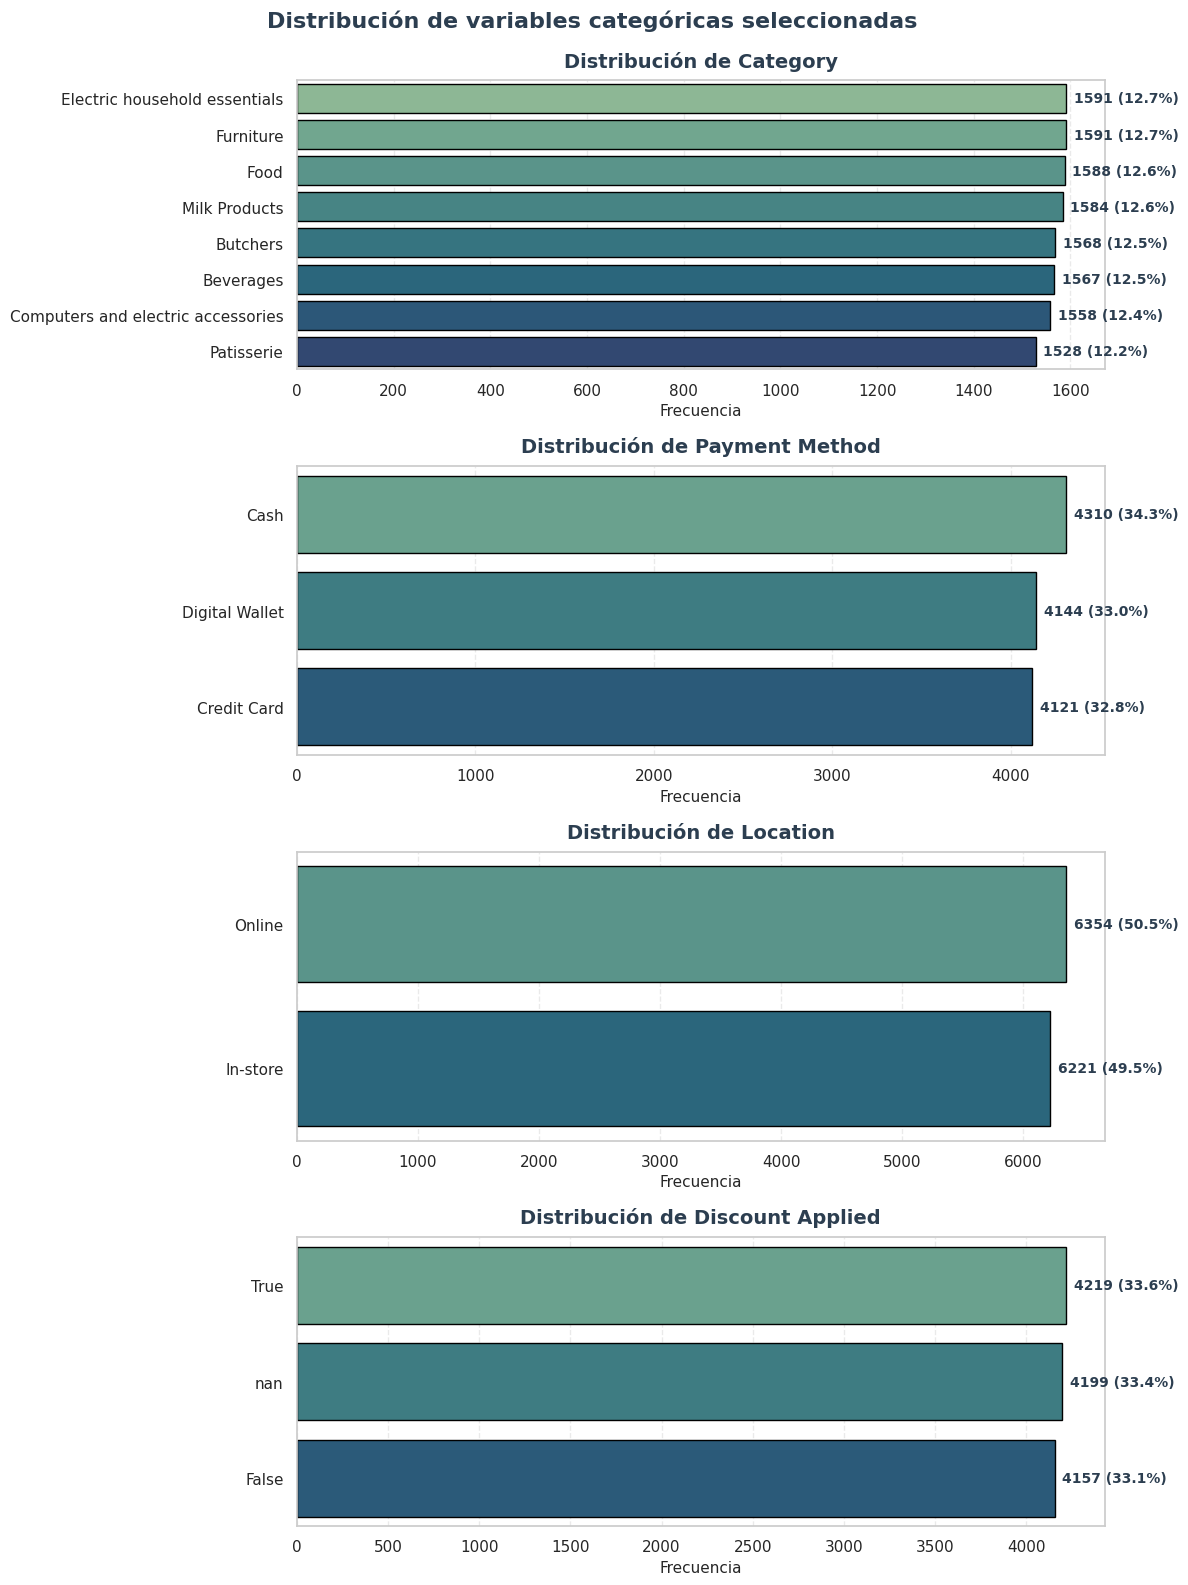


🎯 ANÁLISIS DE VARIABLES CATEGÓRICAS
═════════════════════════════════════════════════════════════════
📊 DATOS GENERALES:
   • Total de transacciones analizadas: 12,575
   • Variables categóricas analizadas: 4

📈 CATEGORY:
────────────────────────────────────────
   🏆 CATEGORÍA DOMINANTE:
      • Electric household essentials: 12.7%
   📊 CONCENTRACIÓN:
      • Top 3 categorías: 37.9% del total
   🎯 DIVERSIDAD:
      • Número de categorías únicas: 8
   💡 INSIGHTS DE NEGOCIO:
      • ✅ PORTAFOLIO BALANCEADO: Distribución saludable
      • 🌈 DIVERSIFICACIÓN: Múltiples categorías presentes
   🚀 RECOMENDACIONES:
      • 🌱 Estrategia: Desarrollar categorías emergentes

📈 PAYMENT METHOD:
────────────────────────────────────────
   🏆 CATEGORÍA DOMINANTE:
      • Cash: 34.3%
   📊 CONCENTRACIÓN:
      • Top 3 categorías: 100.0% del total
   🎯 DIVERSIDAD:
      • Número de categorías únicas: 3
   💡 INSIGHTS DE NEGOCIO:
      • 🔄 DIVERSIDAD DE PAGOS: Múltiples métodos utilizados
      • 🔀 TRANSICI

In [10]:
def graficar_categoricas(df, columnas=None):
    """
    Grafica en barras horizontales las variables categóricas:
    Category, Payment Method, Location y Discount Applied.
    Cada barra muestra frecuencia absoluta y porcentaje.
    Incluye resumen ejecutivo con insights de negocio.
    Compatible con seaborn >= 0.14 (sin warnings).
    """
    # Selección de columnas categoricas en caso no se especifiquen
    if columnas is None:
        columnas = ['Category', 'Payment Method', 'Location', 'Discount Applied']
        columnas = [c for c in columnas if c in df.columns]

    if not columnas:
        print("Ninguna de las columnas especificadas está en el dataset.")
        return

    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(len(columnas), 1, figsize=(12, 4 * len(columnas)))
    if len(columnas) == 1:
        axes = [axes]  # para que sea iterable

    total_filas = len(df)

    # Almacenar datos para el resumen ejecutivo
    resumen_categorias = {}

    for i, col in enumerate(columnas):
        ax = axes[i]

        # frecuencias (incluimos NaN si hubiera)
        valores = df[col].value_counts(dropna=False)
        porcentajes = (valores / total_filas) * 100

        # armar dataframe ordenado
        resumen = (
            pd.DataFrame({
                'Valor': valores.index.astype(str),   # por si hay boolean o NaN
                'Frecuencia': valores.values,
                'Porcentaje': porcentajes.values
            })
        )

        # Guardar para resumen ejecutivo
        resumen_categorias[col] = resumen

        # paleta del tamaño exacto de categorías
        paleta = sns.color_palette("crest", n_colors=len(resumen))

        # gráfico: ahora sí con hue=Valor y sin leyenda
        sns.barplot(
            data=resumen,
            y='Valor',
            x='Frecuencia',
            hue='Valor',             # para evitar FutureWarning
            palette=paleta,
            legend=False,            # no queremos leyenda repetida
            edgecolor='black',
            ax=ax
        )

        ax.set_title(
            f"Distribución de {col}",
            fontsize=14,
            fontweight='bold',
            color='#2c3e50',
            pad=10
        )
        ax.set_xlabel("Frecuencia", fontsize=11)
        ax.set_ylabel("")
        ax.grid(axis='x', linestyle='--', alpha=0.4)

        # etiquetas con valor + porcentaje
        for j, row in resumen.iterrows():
            ax.text(
                row['Frecuencia'] * 1.01,   # un poquito a la derecha
                j,
                f"{int(row['Frecuencia'])} ({row['Porcentaje']:.1f}%)",
                va='center',
                fontsize=10,
                fontweight='bold',
                color='#2c3e50'
            )

    plt.suptitle(
        "Distribución de variables categóricas seleccionadas",
        fontsize=16,
        fontweight='bold',
        color='#2c3e50',
        y=0.99
    )
    plt.tight_layout()
    plt.show()

    # GENERAR RESUMEN EJECUTIVO
    _generar_resumen_ejecutivo_categoricas(resumen_categorias, total_filas)

def _generar_resumen_ejecutivo_categoricas(resumen_categorias, total_filas):
    """
    Genera un resumen ejecutivo con insights de negocio basados en las categorías
    """
    print("\n🎯 ANÁLISIS DE VARIABLES CATEGÓRICAS")
    print("═" * 65)

    print(f"📊 DATOS GENERALES:")
    print(f"   • Total de transacciones analizadas: {total_filas:,}")
    print(f"   • Variables categóricas analizadas: {len(resumen_categorias)}")

    for variable, datos in resumen_categorias.items():
        print(f"\n📈 {variable.upper()}:")
        print("─" * 40)

        # Categoría dominante
        categoria_dominante = datos.iloc[0]
        print(f"   🏆 CATEGORÍA DOMINANTE:")
        print(f"      • {categoria_dominante['Valor']}: {categoria_dominante['Porcentaje']:.1f}%")

        # Concentración del mercado
        top_3_porcentaje = datos.head(3)['Porcentaje'].sum()
        print(f"   📊 CONCENTRACIÓN:")
        print(f"      • Top 3 categorías: {top_3_porcentaje:.1f}% del total")

        # Diversidad
        num_categorias = len(datos)
        print(f"   🎯 DIVERSIDAD:")
        print(f"      • Número de categorías únicas: {num_categorias}")

        # INSIGHTS ESPECÍFICOS POR TIPO DE VARIABLE
        print(f"   💡 INSIGHTS DE NEGOCIO:")

        if variable == 'Category':
            _analisis_categorias_productos(datos)
        elif variable == 'Payment Method':
            _analisis_metodos_pago(datos)
        elif variable == 'Location':
            _analisis_ubicaciones(datos)
        elif variable == 'Discount Applied':
            _analisis_descuentos(datos)

        # RECOMENDACIONES ESTRATÉGICAS
        print(f"   🚀 RECOMENDACIONES:")
        _generar_recomendaciones_estrategicas(variable, datos, top_3_porcentaje)

def _analisis_categorias_productos(datos):
    """Análisis específico para categorías de productos"""
    categoria_lider = datos.iloc[0]
    categoria_ultima = datos.iloc[-1]

    ratio_dominancia = categoria_lider['Porcentaje'] / categoria_ultima['Porcentaje'] if categoria_ultima['Porcentaje'] > 0 else float('inf')

    if ratio_dominancia > 10:
        print(f"      • ⚠️  ALTA DEPENDENCIA: {categoria_lider['Valor']} domina el portafolio")
    elif ratio_dominancia > 5:
        print(f"      • 📈 DOMINANCIA MODERADA: {categoria_lider['Valor']} es líder claro")
    else:
        print(f"      • ✅ PORTAFOLIO BALANCEADO: Distribución saludable")

    if len(datos) <= 3:
        print(f"      • 🎯 PORTAFOLIO CONCENTRADO: Pocas categorías, alta especialización")
    else:
        print(f"      • 🌈 DIVERSIFICACIÓN: Múltiples categorías presentes")

def _analisis_metodos_pago(datos):
    """Análisis específico para métodos de pago"""
    metodo_dominante = datos.iloc[0]

    if metodo_dominante['Porcentaje'] > 60:
        print(f"      • 💳 PREFERENCIA CLARA: {metodo_dominante['Valor']} es mayoritario")
    else:
        print(f"      • 🔄 DIVERSIDAD DE PAGOS: Múltiples métodos utilizados")

    # Buscar métodos digitales vs tradicionales
    metodos_digitales = ['Credit Card', 'Debit Card', 'Digital Wallet', 'Online']
    porcentaje_digital = datos[datos['Valor'].isin(metodos_digitales)]['Porcentaje'].sum()

    if porcentaje_digital > 70:
        print(f"      • 📱 ALTA DIGITALIZACIÓN: {porcentaje_digital:.1f}% métodos digitales")
    elif porcentaje_digital > 40:
        print(f"      • 🔀 TRANSICIÓN DIGITAL: {porcentaje_digital:.1f}% métodos digitales")

def _analisis_ubicaciones(datos):
    """Análisis específico para ubicaciones"""
    ubicacion_dominante = datos.iloc[0]

    if ubicacion_dominante['Porcentaje'] > 50:
        print(f"      • 🏪 MERCADO PRINCIPAL: {ubicacion_dominante['Valor']} concentra las ventas")
    else:
        print(f"      • 🗺️  DISTRIBUCIÓN GEOGRÁFICA: Ventas distribuidas en múltiples ubicaciones")

    if len(datos) <= 2:
        print(f"      • 📍 FOCO GEOGRÁFICO: Operaciones concentradas en pocas ubicaciones")

def _analisis_descuentos(datos):
    """Análisis específico para descuentos"""
    for _, fila in datos.iterrows():
        if 'True' in fila['Valor'] or '1' in fila['Valor']:
            porcentaje_con_descuento = fila['Porcentaje']

            if porcentaje_con_descuento > 30:
                print(f"      • 🏷️  ALTA PROMOCIONALIDAD: {porcentaje_con_descuento:.1f}% con descuento")
            elif porcentaje_con_descuento > 15:
                print(f"      • 📉 PROMOCIONES MODERADAS: {porcentaje_con_descuento:.1f}% con descuento")
            else:
                print(f"      • 💰 ESTRATEGIA PREMIUM: Solo {porcentaje_con_descuento:.1f}% con descuento")
            break

def _generar_recomendaciones_estrategicas(variable, datos, top_3_porcentaje):
    """Genera recomendaciones estratégicas basadas en el análisis"""
    if variable == 'Category':
        if top_3_porcentaje > 80:
            print(f"      • 🎯 Estrategia: Profundizar en categorías líderes")
        else:
            print(f"      • 🌱 Estrategia: Desarrollar categorías emergentes")

    elif variable == 'Payment Method':
        if datos.iloc[0]['Porcentaje'] > 60:
            print(f"      • 💡 Oportunidad: Diversificar métodos de pago")
        else:
            print(f"      • ✅ Ventaja: Flexibilidad en opciones de pago")

    elif variable == 'Location':
        if datos.iloc[0]['Porcentaje'] > 50:
            print(f"      • 📍 Acción: Expandir a nuevas ubicaciones")
        else:
            print(f"      • 🏪 Consolidar: Optimizar ubicaciones existentes")

    elif variable == 'Discount Applied':
        for _, fila in datos.iterrows():
            if 'True' in fila['Valor'] or '1' in fila['Valor']:
                if fila['Porcentaje'] > 25:
                    print(f"      • 📊 Revisar: Estrategia de precios y márgenes")
                else:
                    print(f"      • 🏆 Mantener: Posicionamiento de valor")
                break

# RESUMEN COMPARATIVO FINAL
def _generar_resumen_comparativo_final(resumen_categorias):
    """Genera un resumen comparativo final entre todas las variables"""
    print(f"\n🏆 RESUMEN COMPARATIVO GENERAL")
    print("─" * 40)

    # Variable con mayor concentración
    mayor_concentracion = max(
        [(var, datos.iloc[0]['Porcentaje'])
         for var, datos in resumen_categorias.items()],
        key=lambda x: x[1]
    )
    print(f"   • Mayor concentración: {mayor_concentracion[0]} ({mayor_concentracion[1]:.1f}%)")

    # Variable más diversa
    mas_diversa = min(
        [(var, datos.iloc[0]['Porcentaje'])
         for var, datos in resumen_categorias.items()],
        key=lambda x: x[1]
    )
    print(f"   • Más diversa: {mas_diversa[0]} ({mas_diversa[1]:.1f}%)")

    # Número total de categorías únicas
    total_categorias = sum(len(datos) for datos in resumen_categorias.values())
    print(f"   • Total categorías únicas: {total_categorias}")

# Ejecutar análisis completo
graficar_categoricas(data, columnas=['Category', 'Payment Method', 'Location', 'Discount Applied'])

# 05.- Imputación de Datos

## 05.1.- Replica del Data Set

In [21]:
# Trabajamos con una copia para no modificar el DataFrame original
df = data.copy()

# Vista rápida de las primeras filas
df.head(5)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


## 05.2.- Tratamiento de datos faltantes

### 05.2.1.- Imputación de variables numéricas

In [27]:
from typing import Tuple, Dict, Any

# Funcion para la imputacion
def impute_transaction_variables(df: pd.DataFrame) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    """
    Imputa valores faltantes en variables numéricas clave usando relaciones determinísticas y imputación por grupos.

    Variables:
    - 'Price Per Unit'
    - 'Quantity'
    - 'Total Spent'

    Estrategia optimizada:
    1) Imputación determinística usando relaciones matemáticas
    2) Imputación por grupos usando transformaciones vectorizadas
    3) Fallback a medianas globales

    Returns:
    - df_imputed: DataFrame con valores imputados
    - numeric_report: Diccionario con trazabilidad de imputaciones
    """

    # Creamos una copia del dataset
    df_imputed = df.copy()

    # Configuración de variables y grupos para la imputación
    PRICE_COL = "Price Per Unit"
    QTY_COL = "Quantity"
    TOTAL_COL = "Total Spent"
    GROUP_COLS = ["Category", "Item"] if all(col in df.columns for col in ["Category", "Item"]) else []

    # Configuramos el diccionario que contendra el reporte
    numeric_report = {
        PRICE_COL: {
            "initial_missing": df[PRICE_COL].isna().sum(),
            "methods_used": []
        },
        QTY_COL: {
            "initial_missing": df[QTY_COL].isna().sum(),
            "methods_used": []
        },
        TOTAL_COL: {
            "initial_missing": df[TOTAL_COL].isna().sum(),
            "methods_used": []
        }
    }

    # ------------------------------
    # 1) IMPUTACIÓN DETERMINÍSTICA
    # ------------------------------

    # Máscaras precomputadas de los nulos
    price_null = df_imputed[PRICE_COL].isna()
    qty_null = df_imputed[QTY_COL].isna()
    total_null = df_imputed[TOTAL_COL].isna()

    # Máscaras precomputadas de los no nulos
    price_notnull = df_imputed[PRICE_COL].notna()
    qty_notnull = df_imputed[QTY_COL].notna()
    total_notnull = df_imputed[TOTAL_COL].notna()

    # 1.1 Imputar Total Spent = Price × Quantity
    mask_ts_impute = total_null & price_notnull & qty_notnull
    if mask_ts_impute.any():                                                     # Valida que exista elementos por imputar
        count_ts = mask_ts_impute.sum()
        df_imputed.loc[mask_ts_impute, TOTAL_COL] = (
            df_imputed.loc[mask_ts_impute, PRICE_COL] *
            df_imputed.loc[mask_ts_impute, QTY_COL]
        )
        # Agregamos al reporte
        numeric_report[TOTAL_COL]["deterministic_price_qty"] = count_ts          # Total de imputaciones
        numeric_report[TOTAL_COL]["methods_used"].append(f"Relación matemática (Precio × Cantidad): {count_ts} valores") # Metodo usado

    # 1.2 Imputar Price = Total / Quantity
    mask_price_impute = price_null & total_notnull & qty_notnull
    if mask_price_impute.any():                                                  # Valida que exista elementos por imputar
        valid_qty_mask = df_imputed.loc[mask_price_impute, QTY_COL] != 0         # Evitar división por cero
        count_price = valid_qty_mask.sum()
        if count_price > 0:
            df_imputed.loc[mask_price_impute & valid_qty_mask, PRICE_COL] = (
                df_imputed.loc[mask_price_impute & valid_qty_mask, TOTAL_COL] /
                df_imputed.loc[mask_price_impute & valid_qty_mask, QTY_COL]
            )
            # Agregamos al reporte
            numeric_report[PRICE_COL]["deterministic_total_qty"] = count_price    # Total de imputaciones
            numeric_report[PRICE_COL]["methods_used"].append(f"Relación matemática (Total / Cantidad): {count_price} valores")  # Metodo usado

    # 1.3 Imputar Quantity = Total / Price
    mask_qty_impute = qty_null & total_notnull & price_notnull
    if mask_qty_impute.any():                                                     # Valida que exista elementos por imputar
        valid_price_mask = df_imputed.loc[mask_qty_impute, PRICE_COL] != 0        # Evitar división por cero
        count_qty = valid_price_mask.sum()
        if count_qty > 0:
            df_imputed.loc[mask_qty_impute & valid_price_mask, QTY_COL] = (
                df_imputed.loc[mask_qty_impute & valid_price_mask, TOTAL_COL] /
                df_imputed.loc[mask_qty_impute & valid_price_mask, PRICE_COL]
            )
             # Agregamos al reporte
            numeric_report[QTY_COL]["deterministic_total_price"] = count_qty      # Total de imputaciones
            numeric_report[QTY_COL]["methods_used"].append(f"Relación matemática (Total / Precio): {count_qty} valores") # Metodo usado

    # ------------------------------
    # 2) IMPUTACIÓN POR GRUPOS
    # ------------------------------

    # 2.1 Imputar Price Per Unit por grupos (Category, Item)
    if GROUP_COLS and "Category" in GROUP_COLS:
        price_before = df_imputed[PRICE_COL].isna().sum()

        # Valida que exista elementos por imputar
        if price_before > 0:
            # Calcular medianas por grupo una sola vez (más eficiente)
            group_medians = df_imputed.groupby(GROUP_COLS)[PRICE_COL].transform('median')
            price_null_mask = df_imputed[PRICE_COL].isna()

            # Aplicar imputación solo donde sea necesario
            df_imputed.loc[price_null_mask, PRICE_COL] = group_medians[price_null_mask]

            price_after = df_imputed[PRICE_COL].isna().sum()
            count_price_group = price_before - price_after

             # Valida si se realizo imputaciones
            if count_price_group > 0:
                # Agregar al reporte
                numeric_report[PRICE_COL]["group_imputation"] = count_price_group
                numeric_report[PRICE_COL]["methods_used"].append(f"Mediana por grupo ({', '.join(GROUP_COLS)}): {count_price_group} valores")

                # Detalle de imputaciones por grupo
                imputed_mask = price_null_mask & df_imputed[PRICE_COL].notna()
                group_details = (
                    df_imputed.loc[imputed_mask, GROUP_COLS + [PRICE_COL]]
                    .groupby(GROUP_COLS)
                    .size()
                    .reset_index(name='n_imputed')
                    .sort_values('n_imputed', ascending=False)
                )
                numeric_report[PRICE_COL]["group_details"] = group_details

    # 2.2 Imputar Quantity por Category
    if "Category" in df_imputed.columns:
        qty_before = df_imputed[QTY_COL].isna().sum()

         # Valida que exista elementos por imputar
        if qty_before > 0:
            category_medians = df_imputed.groupby("Category")[QTY_COL].transform('median')
            qty_null_mask = df_imputed[QTY_COL].isna()

            df_imputed.loc[qty_null_mask, QTY_COL] = category_medians[qty_null_mask]

            qty_after = df_imputed[QTY_COL].isna().sum()
            count_qty_group = qty_before - qty_after

            # Valida si se realizo imputaciones
            if count_qty_group > 0:
                # Agregar al reporte
                numeric_report[QTY_COL]["category_imputation"] = count_qty_group
                numeric_report[QTY_COL]["methods_used"].append(f"Mediana por categoría: {count_qty_group} valores")

    # ------------------------------
    # 3) FALLBACK A MEDIANAS GLOBALES
    # ------------------------------

    # Configurar medianas globales
    global_medians = {
        PRICE_COL: df_imputed[PRICE_COL].median(),
        QTY_COL: df_imputed[QTY_COL].median(),
        TOTAL_COL: df_imputed[TOTAL_COL].median()
    }

    # Aplicar medianas globales donde aún haya valores nulos
    for col, median_val in global_medians.items():
        if df_imputed[col].isna().any():
            null_count = df_imputed[col].isna().sum()
            df_imputed[col].fillna(median_val, inplace=True)
            # Agregar al reporte
            numeric_report[col]["global_median_fallback"] = null_count
            numeric_report[col]["methods_used"].append(f"Mediana global: {null_count} valores")

    # ------------------------------
    # 4) VERIFICACIÓN FINAL Y RECÁLCULO CONSISTENTE
    # ------------------------------

    # Asegurar consistencia: Total = Price × Quantity para todas las filas
    consistency_mask = (
        df_imputed[PRICE_COL].notna() &
        df_imputed[QTY_COL].notna() &
        df_imputed[TOTAL_COL].notna()
    )

    # Verificar inconsistencias y corregir
    if consistency_mask.any():
        inconsistent_mask = consistency_mask & (
            abs(df_imputed[TOTAL_COL] - (df_imputed[PRICE_COL] * df_imputed[QTY_COL])) > 0.01
        )

        if inconsistent_mask.any():
            count_corrections = inconsistent_mask.sum()
            df_imputed.loc[inconsistent_mask, TOTAL_COL] = (
                df_imputed.loc[inconsistent_mask, PRICE_COL] *
                df_imputed.loc[inconsistent_mask, QTY_COL]
            )
            # Agregar al reporte
            numeric_report[TOTAL_COL]["consistency_corrections"] = count_corrections
            numeric_report[TOTAL_COL]["methods_used"].append(f"Corrección de consistencia: {count_corrections} valores")

    # ------------------------------
    # 5) REPORTE FINAL OPTIMIZADO
    # ------------------------------

    # Calcular métricas finales
    for col in [PRICE_COL, QTY_COL, TOTAL_COL]:
        numeric_report[col]["final_missing"] = df_imputed[col].isna().sum()
        numeric_report[col]["total_imputed"] = (
            numeric_report[col]["initial_missing"] - numeric_report[col]["final_missing"]
        )

    # Mostrar resumen del reporte
    _print_imputation_summary(numeric_report, PRICE_COL, QTY_COL, TOTAL_COL)

    return df_imputed, numeric_report

# Funcion para generar el reporte
def _print_imputation_summary(report: Dict[str, Any], price_col: str, qty_col: str, total_col: str) -> None:
    """
    Muestra un resumen de las imputaciones realizadas con los métodos utilizados.
    """
    print("🎯 RESUMEN DE IMPUTACIÓN NUMÉRICA")
    print("=" * 60)

    for col_name, col_label in [
        (price_col, "PRECIO POR UNIDAD"),
        (qty_col, "CANTIDAD"),
        (total_col, "TOTAL GASTADO")
    ]:
        col_report = report[col_name]
        initial = col_report["initial_missing"]
        total_imputed = col_report["total_imputed"]
        final = col_report["final_missing"]

        print(f"\n📊 {col_label}:")
        print(f"   ┌─ Faltantes iniciales: {initial:>4}")
        print(f"   ├─ Valores imputados:   {total_imputed:>4}")
        print(f"   └─ Faltantes finales:   {final:>4}")

        # Mostrar efectividad
        if initial > 0:
            effectiveness = (total_imputed / initial) * 100
            print(f"   📈 Efectividad:        {effectiveness:>6.1f}%")
        else:
            print(f"   📈 Efectividad:        {'100.0':>6}%")

        # Mostrar métodos de imputación utilizados
        methods_used = col_report.get("methods_used", [])
        if methods_used:
            print(f"   🛠️  Métodos utilizados:")
            for method in methods_used:
                print(f"      ∙ {method}")
        else:
            print(f"   ✅ No se requirió imputación")

    # Resumen general
    print(f"\n{'='*60}")
    total_initial = sum(report[col]["initial_missing"] for col in [price_col, qty_col, total_col])
    total_final = sum(report[col]["final_missing"] for col in [price_col, qty_col, total_col])
    total_imputed = total_initial - total_final

    print(f"📈 RESUMEN GENERAL:")
    print(f"   • Total de valores faltantes iniciales: {total_initial}")
    print(f"   • Total de valores imputados:          {total_imputed}")
    print(f"   • Total de valores faltantes finales:  {total_final}")

    if total_initial > 0:
        overall_effectiveness = (total_imputed / total_initial) * 100
        print(f"   • Efectividad global:                {overall_effectiveness:.1f}%")


# Función para visualizacion previa de los datos
def quick_missing_analysis(df: pd.DataFrame, columns: list = None) -> None:
    """
    Análisis rápido de valores faltantes antes de la imputación.
    """
    if columns is None:
        columns = ["Price Per Unit", "Quantity", "Total Spent"]

    print("🔍 ANÁLISIS RÁPIDO DE VARIABLES NÚMERICAS")
    print("=" * 60)

    total_missing = 0
    for col in columns:
        if col in df.columns:
            missing = df[col].isna().sum()
            total = len(df)
            pct = (missing / total) * 100
            total_missing += missing
            print(f"   • {col:<15}: {missing:>4} faltantes | {total} | {pct:5.1f}%")

    print(f"   {'─'*55}")
    print(f"   • {'TOTAL':<15}: {total_missing:>4} faltantes | {total} | ({(total_missing/total)*100:5.1f}%)")


# Análisis previo
quick_missing_analysis(df)
print("\n")

# Imputación
df_imputed, report = impute_transaction_variables(df)

🔍 ANÁLISIS RÁPIDO DE VARIABLES NÚMERICAS
   • Price Per Unit :  609 faltantes | 12575 |   4.8%
   • Quantity       :  604 faltantes | 12575 |   4.8%
   • Total Spent    :  604 faltantes | 12575 |   4.8%
   ───────────────────────────────────────────────────────
   • TOTAL          : 1817 faltantes | 12575 | ( 14.4%)


🎯 RESUMEN DE IMPUTACIÓN NUMÉRICA

📊 PRECIO POR UNIDAD:
   ┌─ Faltantes iniciales:  609
   ├─ Valores imputados:    609
   └─ Faltantes finales:      0
   📈 Efectividad:         100.0%
   🛠️  Métodos utilizados:
      ∙ Relación matemática (Total / Cantidad): 609 valores

📊 CANTIDAD:
   ┌─ Faltantes iniciales:  604
   ├─ Valores imputados:    604
   └─ Faltantes finales:      0
   📈 Efectividad:         100.0%
   🛠️  Métodos utilizados:
      ∙ Mediana por categoría: 604 valores

📊 TOTAL GASTADO:
   ┌─ Faltantes iniciales:  604
   ├─ Valores imputados:    604
   └─ Faltantes finales:      0
   📈 Efectividad:         100.0%
   🛠️  Métodos utilizados:
      ∙ Mediana global:

### 05.2.2.- Imputación de variables categóricas

In [28]:
from typing import Tuple, Dict, Any, List

def impute_categorical_variables(df: pd.DataFrame) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    """
    Imputa variables categóricas con reglas específicas optimizadas:

    1. 'Item':
       - Se imputan los valores nulos usando la moda del 'Item' dentro de cada 'Category'
       - Reporte profesional con métodos utilizados y efectividad

    2. 'Discount Applied':
       - Se imputan los valores nulos con False

    3. Otras categóricas:
       - Se imputan con 'Unknown_<col>'
       - Reporte consolidado de imputaciones

    Devuelve:
    - df_imputed: DataFrame con categóricas imputadas
    - categorical_report: diccionario con trazabilidad completa
    """
    df_imputed = df.copy()
    categorical_cols = df_imputed.select_dtypes(include=['object', 'category']).columns.tolist()

    # Incluir columnas booleanas para 'Discount Applied'
    bool_cols = df_imputed.select_dtypes(include=['bool']).columns.tolist()
    if 'Discount Applied' in bool_cols:
        categorical_cols.extend(bool_cols)

    categorical_report = {}

    print("🔄 INICIANDO IMPUTACIÓN DE VARIABLES CATEGÓRICAS")
    print("═" * 55)

    # Análisis inicial de valores faltantes
    initial_missing = {}
    for col in categorical_cols:
        missing_count = df_imputed[col].isna().sum()
        if missing_count > 0:
            initial_missing[col] = missing_count

    if not initial_missing:
        print("✅ No se encontraron valores faltantes en variables categóricas")
        return df_imputed, {}

    print("📊 ANÁLISIS INICIAL DE VALORES FALTANTES:")
    for col, count in initial_missing.items():
        pct = (count / len(df_imputed)) * 100
        print(f"   • {col}: {count} faltantes ({pct:.1f}%)")

    # =====================================================
    # 1) IMPUTACIÓN ESPECIALIZADA PARA 'Discount Applied'
    # =====================================================
    if "Discount Applied" in initial_missing:
        print(f"\n🎯 IMPUTACIÓN ESPECIALIZADA: 'Discount Applied'")

        missing_count = initial_missing["Discount Applied"]
        methods_used = []

        # Imputar con False
        df_imputed["Discount Applied"].fillna(False, inplace=True)
        methods_used.append(f"Valor 'False': {missing_count} valores")

        final_missing = df_imputed["Discount Applied"].isna().sum()
        categorical_report["Discount Applied"] = {
            "initial_missing": missing_count,
            "final_missing": final_missing,
            "total_imputed": missing_count - final_missing,
            "methods_used": methods_used,
            "special_rule": "Imputación con False por regla de negocio"
        }

        print(f"   ✅ Imputados {missing_count} valores con False")

    # =====================================================
    # 2) IMPUTACIÓN ESPECIALIZADA PARA 'Item'
    # =====================================================
    if "Item" in df_imputed.columns and "Item" in initial_missing and "Item" not in categorical_report:
        print(f"\n🎯 IMPUTACIÓN ESPECIALIZADA: 'Item'")

        mask_item_null = df_imputed["Item"].isna()
        n_item_null = mask_item_null.sum()
        methods_used = []

        # Construir mapa de modas por categoría
        mode_map = {}
        categories_without_mode = []
        categories_with_imputations = []

        if "Category" in df_imputed.columns:
            # Calcular modas por categoría de manera vectorizada
            category_modes = (
                df_imputed[df_imputed["Item"].notna()]
                .groupby("Category")["Item"]
                .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
            )

            for category, mode_value in category_modes.items():
                if pd.notna(mode_value):
                    mode_map[category] = mode_value
                else:
                    categories_without_mode.append(category)

            # Imputar usando el mapa de modas
            if mode_map:
                df_imputed["_temp_mode"] = df_imputed["Category"].map(mode_map)
                impute_mask = mask_item_null & df_imputed["_temp_mode"].notna()

                if impute_mask.any():
                    count_imputed = impute_mask.sum()
                    df_imputed.loc[impute_mask, "Item"] = df_imputed.loc[impute_mask, "_temp_mode"]
                    methods_used.append(f"Moda por categoría: {count_imputed} valores")

                    # Detalle de imputaciones por categoría
                    category_details = (
                        df_imputed.loc[impute_mask, ["Category", "Item"]]
                        .groupby("Category")
                        .size()
                        .reset_index(name='n_imputed')
                        .sort_values('n_imputed', ascending=False)
                    )
                    categories_with_imputations = category_details.to_dict('records')

            # Limpiar columna temporal
            if "_temp_mode" in df_imputed.columns:
                df_imputed.drop(columns=["_temp_mode"], inplace=True)

        # Fallback: moda global para 'Item'
        remaining_null = df_imputed["Item"].isna().sum()
        if remaining_null > 0:
            global_mode = df_imputed["Item"].mode()
            if not global_mode.empty:
                global_mode_value = global_mode.iloc[0]
                df_imputed["Item"].fillna(global_mode_value, inplace=True)
                methods_used.append(f"Moda global ('{global_mode_value}'): {remaining_null} valores")
            else:
                # Si no hay moda global, usar valor por defecto
                default_value = "Unknown_Item"
                df_imputed["Item"].fillna(default_value, inplace=True)
                methods_used.append(f"Valor por defecto ('{default_value}'): {remaining_null} valores")

        # Construir reporte para 'Item'
        final_missing = df_imputed["Item"].isna().sum()
        categorical_report["Item"] = {
            "initial_missing": n_item_null,
            "final_missing": final_missing,
            "total_imputed": n_item_null - final_missing,
            "methods_used": methods_used,
            "categories_with_imputations": categories_with_imputations,
            "categories_without_mode": categories_without_mode,
            "mode_map": mode_map
        }

    # =====================================================
    # 3) IMPUTACIÓN PARA OTRAS VARIABLES CATEGÓRICAS
    # =====================================================
    other_categorical_imputations = {}

    for col in categorical_cols:
        # Saltar columnas ya procesadas
        if col in categorical_report or col not in initial_missing:
            continue

        missing_count = initial_missing[col]
        methods_used = []

        # Estrategia: moda global para categorías con pocos faltantes
        if missing_count / len(df_imputed) < 0.1:  # Menos del 10%
            mode_value = df_imputed[col].mode()
            if not mode_value.empty:
                df_imputed[col].fillna(mode_value.iloc[0], inplace=True)
                methods_used.append(f"Moda global: {missing_count} valores")
            else:
                unknown_label = f"Unknown_{col}"
                df_imputed[col].fillna(unknown_label, inplace=True)
                methods_used.append(f"Valor 'Unknown_{col}': {missing_count} valores")
        else:
            # Para muchos faltantes, usar etiqueta específica
            unknown_label = f"Unknown_{col}"
            df_imputed[col].fillna(unknown_label, inplace=True)
            methods_used.append(f"Valor '{unknown_label}': {missing_count} valores")

        final_missing = df_imputed[col].isna().sum()
        other_categorical_imputations[col] = {
            "initial_missing": missing_count,
            "final_missing": final_missing,
            "total_imputed": missing_count - final_missing,
            "methods_used": methods_used
        }

    # Agregar otras imputaciones al reporte principal
    categorical_report.update(other_categorical_imputations)

    # =====================================================
    # 4) REPORTE EJECUTIVO MEJORADO
    # =====================================================
    _print_categorical_summary(categorical_report)

    return df_imputed, categorical_report

def _print_categorical_summary(report: Dict[str, Any]) -> None:
    """
    Muestra un resumen ejecutivo de las imputaciones categóricas realizadas.
    """
    print("\n🎯 RESUMEN DE IMPUTACIÓN CATEGÓRICA")
    print("═" * 60)

    if not report:
        print("✅ No se realizaron imputaciones categóricas")
        return

    total_initial = 0
    total_final = 0

    for col_name, col_report in report.items():
        initial = col_report["initial_missing"]
        final = col_report["final_missing"]
        total_imputed = col_report["total_imputed"]
        methods_used = col_report.get("methods_used", [])
        special_rule = col_report.get("special_rule")

        total_initial += initial
        total_final += final

        print(f"\n📋 {col_name.upper()}:")
        print(f"   ┌─ Faltantes iniciales: {initial:>4}")
        print(f"   ├─ Valores imputados:   {total_imputed:>4}")
        print(f"   └─ Faltantes finales:   {final:>4}")

        # Efectividad
        if initial > 0:
            effectiveness = (total_imputed / initial) * 100
            print(f"   📈 Efectividad:        {effectiveness:>6.1f}%")
        else:
            print(f"   📈 Efectividad:        {'100.0':>6}%")

        # Regla especial (para Discount Applied)
        if special_rule:
            print(f"   ⚡ Regla especial:     {special_rule}")

        # Métodos utilizados
        if methods_used:
            print(f"   🛠️  Métodos utilizados:")
            for method in methods_used:
                print(f"      ∙ {method}")

        # Información adicional específica para 'Item'
        if col_name == "Item":
            categories_without_mode = col_report.get("categories_without_mode", [])
            if categories_without_mode:
                print(f"   ⚠️  Categorías sin moda: {len(categories_without_mode)}")

            categories_with_imputations = col_report.get("categories_with_imputations", [])
            if categories_with_imputations:
                print(f"   📊 Top categorías imputadas:")
                for i, cat_info in enumerate(categories_with_imputations[:3]):  # Mostrar top 3
                    print(f"      {i+1}. {cat_info['Category']}: {cat_info['n_imputed']} valores")

    # Resumen general
    print(f"\n{'═'*60}")
    total_imputed = total_initial - total_final
    print(f"📈 RESUMEN GENERAL CATEGÓRICO:")
    print(f"   • Total de valores faltantes iniciales: {total_initial}")
    print(f"   • Total de valores imputados:          {total_imputed}")
    print(f"   • Total de valores faltantes finales:  {total_final}")

    if total_initial > 0:
        overall_effectiveness = (total_imputed / total_initial) * 100
        print(f"   • Efectividad global:                {overall_effectiveness:.1f}%")

    # Mostrar detalles adicionales para análisis avanzado
    _print_detailed_analysis(report)

def _print_detailed_analysis(report: Dict[str, Any]) -> None:
    """
    Muestra análisis detallado para depuración o análisis avanzado.
    """
    print(f"\n🔍 ANÁLISIS DETALLADO:")

    for col_name, col_report in report.items():
        if col_name == "Item" and "mode_map" in col_report:
            mode_map = col_report["mode_map"]
            if mode_map:
                print(f"   📊 Mapa de modas para '{col_name}':")
                for category, mode_value in list(mode_map.items()): # Mostrar todas las modas
                    print(f"      ∙ {category} → '{mode_value}'")

        elif col_name == "Discount Applied":
            print(f"   💰 Regla de negocio para '{col_name}':")
            print(f"      ∙ Todos los valores nulos se imputan con False")
            print(f"      ∙ Justificación: Asumir que no hay descuento aplicado")

# FUNCIÓN AUXILIAR PARA ANÁLISIS RÁPIDO
def quick_categorical_analysis(df: pd.DataFrame) -> None:
    """
    Análisis rápido de valores faltantes en variables categóricas y booleanas.
    """
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    bool_cols = df.select_dtypes(include=['bool']).columns.tolist()

    all_cols = categorical_cols + bool_cols

    print("🔍 ANÁLISIS RÁPIDO DE VARIABLES CATEGÓRICAS Y BOOLEANAS")
    print("═" * 60)

    if not all_cols:
        print("   No se encontraron variables categóricas o booleanas")
        return

    total_missing = 0
    total_rows = len(df)

    for col in all_cols:
        missing = df[col].isna().sum()
        pct = (missing / total_rows) * 100
        total_missing += missing

        if col in bool_cols:
            dtype_info = "bool"
            uniqueness = 2  # True/False
        else:
            dtype_info = "object"
            uniqueness = df[col].nunique()

        print(f"   • {col:<18}: {missing:>4} faltantes | {uniqueness:>3} valores únicos | {pct:5.1f}% | {dtype_info}")

    print(f"   {'─'*60}")
    print(f"   • {'TOTAL':<18}: {total_missing:>4} faltantes | {(total_missing/total_rows)*100:5.1f}%")

# Análisis previo
quick_categorical_analysis(df)
print("\n")

# Imputación optimizada
df_imputed, report = impute_categorical_variables(df_imputed)

🔍 ANÁLISIS RÁPIDO DE VARIABLES CATEGÓRICAS Y BOOLEANAS
════════════════════════════════════════════════════════════
   • Transaction ID    :    0 faltantes | 12575 valores únicos |   0.0% | object
   • Customer ID       :    0 faltantes |  25 valores únicos |   0.0% | object
   • Category          :    0 faltantes |   8 valores únicos |   0.0% | object
   • Item              : 1213 faltantes | 200 valores únicos |   9.6% | object
   • Payment Method    :    0 faltantes |   3 valores únicos |   0.0% | object
   • Location          :    0 faltantes |   2 valores únicos |   0.0% | object
   • Transaction Date  :    0 faltantes | 1114 valores únicos |   0.0% | object
   • Discount Applied  : 4199 faltantes |   2 valores únicos |  33.4% | object
   ────────────────────────────────────────────────────────────
   • TOTAL             : 5412 faltantes |  43.0%


🔄 INICIANDO IMPUTACIÓN DE VARIABLES CATEGÓRICAS
═══════════════════════════════════════════════════════
📊 ANÁLISIS INICIAL DE VALORES 

## 05.3.- Calidad de los datos imputados

In [14]:
dashboard_calidad_dato(df_imputed)

🔍 RESUMEN PRELIMINAR DE CALIDAD DE DATOS
══════════════════════════════════════════════════
Filas totales: 12,575
Columnas totales: 11
Total de celdas nulas: 0 (0.00%)
Filas duplicadas: 0
Celdas totales analizadas: 138,325
══════════════════════════════════════════════════ 



,Nombre de Columna,Tipo de Dato,Celdas Vacías,% Celdas Vacías,Valores Únicos,% Valores Únicos,Valores No Nulos,% Valores No Nulos,Valores Nulos,% Valores Nulos
0,Transaction ID,object,0,0.00%,"12,575",100.00%,"12,575",100.00%,0,0.00%
1,Customer ID,object,0,0.00%,25,0.20%,"12,575",100.00%,0,0.00%
2,Category,object,0,0.00%,8,0.06%,"12,575",100.00%,0,0.00%
3,Item,object,0,0.00%,200,1.59%,"12,575",100.00%,0,0.00%
4,Price Per Unit,float64,0,0.00%,25,0.20%,"12,575",100.00%,0,0.00%
5,Quantity,float64,0,0.00%,10,0.08%,"12,575",100.00%,0,0.00%
6,Total Spent,float64,0,0.00%,227,1.81%,"12,575",100.00%,0,0.00%
7,Payment Method,object,0,0.00%,3,0.02%,"12,575",100.00%,0,0.00%
8,Location,object,0,0.00%,2,0.02%,"12,575",100.00%,0,0.00%
9,Transaction Date,object,0,0.00%,"1,114",8.86%,"12,575",100.00%,0,0.00%


## 05.4.- Tratamientos de Outliers

In [15]:
from typing import Tuple, Dict, Any, List

def remove_outliers_iqr(df: pd.DataFrame, column: str, factor: float = 1.5) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    """
    Elimina outliers de una variable numérica usando el método del IQR (Interquartile Range) optimizado.

    Parámetros:
    -----------
    df : pd.DataFrame             -> DataFrame original.
    column : str                  -> Nombre de la columna numérica donde se desea eliminar outliers.
    factor : float (default=1.5)  -> Factor multiplicativo del IQR para definir los límites (1.5 = Tukey standard).

    Retorna:
    --------
    df_clean : pd.DataFrame       -> DataFrame sin outliers según IQR.
    report : dict                 -> Reporte detallado con métricas y métodos utilizados.
    """
    # Validaciones iniciales
    if column not in df.columns:
        raise ValueError(f"❌ La columna '{column}' no existe en el DataFrame")

    if not pd.api.types.is_numeric_dtype(df[column]):
        raise ValueError(f"❌ La columna '{column}' no es numérica")

    df_copy = df.copy()
    initial_count = len(df_copy)

    print(f"🔍 ANALIZANDO OUTLIERS EN: {column}")
    print("═" * 50)

    # Análisis inicial de la distribución
    desc_stats = df_copy[column].describe()
    initial_stats = {
        "count": desc_stats['count'],
        "mean": desc_stats['mean'],
        "std": desc_stats['std'],
        "min": desc_stats['min'],
        "max": desc_stats['max']
    }

    # Cálculo optimizado de cuartiles e IQR
    q1, q3 = df_copy[column].quantile([0.25, 0.75])
    iqr = q3 - q1

    # Cálculo de límites
    lower_fence = q1 - factor * iqr
    upper_fence = q3 + factor * iqr

    # Detección vectorizada de outliers
    mask_outliers = (df_copy[column] < lower_fence) | (df_copy[column] > upper_fence)
    n_outliers = mask_outliers.sum()

    # Identificar outliers extremos (3*IQR)
    extreme_lower_fence = q1 - 3 * factor * iqr
    extreme_upper_fence = q3 + 3 * factor * iqr
    mask_extreme_outliers = (df_copy[column] < extreme_lower_fence) | (df_copy[column] > extreme_upper_fence)
    n_extreme_outliers = mask_extreme_outliers.sum()

    # Filtrar DataFrame
    df_clean = df_copy[~mask_outliers].reset_index(drop=True)
    final_count = len(df_clean)

    # Construcción del reporte detallado
    report = {
        "column": column,
        "factor_used": factor,
        "initial_records": initial_count,
        "final_records": final_count,
        "records_removed": initial_count - final_count,
        "removal_percentage": round(((initial_count - final_count) / initial_count) * 100, 2),

        # Estadísticas descriptivas
        "initial_stats": initial_stats,
        "final_stats": {
            "count": len(df_clean),
            "mean": df_clean[column].mean(),
            "std": df_clean[column].std(),
            "min": df_clean[column].min(),
            "max": df_clean[column].max()
        },

        # Métricas IQR
        "Q1": round(q1, 4),
        "Q3": round(q3, 4),
        "IQR": round(iqr, 4),
        "lower_fence": round(lower_fence, 4),
        "upper_fence": round(upper_fence, 4),

        # Detección de outliers
        "outliers_detected": int(n_outliers),
        "outliers_percentage": round((n_outliers / initial_count) * 100, 2),
        "extreme_outliers": int(n_extreme_outliers),
        "extreme_outliers_percentage": round((n_extreme_outliers / initial_count) * 100, 2),

        # Métodos utilizados
        "methods_used": [
            f"Detección IQR con factor {factor}",
            f"Límites: [{lower_fence:.2f}, {upper_fence:.2f}]",
            f"Outliers moderados: {n_outliers} valores",
            f"Outliers extremos: {n_extreme_outliers} valores"
        ]
    }

    # Mostrar resumen ejecutivo
    _print_outlier_summary(report, column)

    return df_clean, report

def _print_outlier_summary(report: Dict[str, Any], column: str) -> None:
    """
    Muestra un resumen ejecutivo de la eliminación de outliers.
    """
    print(f"\n🎯 RESUMEN DE ELIMINACIÓN DE OUTLIERS - {column.upper()}")
    print("═" * 60)

    print(f"📊 ESTADÍSTICAS INICIALES:")
    print(f"   ┌─ Registros totales:    {report['initial_records']:>6}")
    print(f"   ├─ Media:               {report['initial_stats']['mean']:>10.2f}")
    print(f"   ├─ Desviación estándar: {report['initial_stats']['std']:>10.2f}")
    print(f"   ├─ Mínimo:              {report['initial_stats']['min']:>10.2f}")
    print(f"   └─ Máximo:              {report['initial_stats']['max']:>10.2f}")

    print(f"\n📈 ESTADÍSTICAS FINALES:")
    print(f"   ┌─ Registros totales:    {report['final_records']:>6}")
    print(f"   ├─ Media:               {report['final_stats']['mean']:>10.2f}")
    print(f"   ├─ Desviación estándar: {report['final_stats']['std']:>10.2f}")
    print(f"   ├─ Mínimo:              {report['final_stats']['min']:>10.2f}")
    print(f"   └─ Máximo:              {report['final_stats']['max']:>10.2f}")

    print(f"\n🔍 DETECCIÓN DE OUTLIERS:")
    print(f"   ┌─ Método:               IQR (factor {report['factor_used']})")
    print(f"   ├─ Límite inferior:      {report['lower_fence']:>10.2f}")
    print(f"   ├─ Límite superior:      {report['upper_fence']:>10.2f}")
    print(f"   ├─ Outliers detectados:  {report['outliers_detected']:>6}")
    print(f"   ├─ Outliers extremos:    {report['extreme_outliers']:>6}")
    print(f"   └─ Porcentaje removido:  {report['removal_percentage']:>6.1f}%")

    print(f"\n📋 MÉTODOS UTILIZADOS:")
    for method in report['methods_used']:
        print(f"   ∙ {method}")

    # Impacto en la distribución
    mean_change = abs(report['final_stats']['mean'] - report['initial_stats']['mean'])
    std_change = abs(report['final_stats']['std'] - report['initial_stats']['std'])

    print(f"\n📉 IMPACTO EN LA DISTRIBUCIÓN:")
    print(f"   ∙ Cambio en media:      {mean_change:>8.2f} ({((mean_change/report['initial_stats']['mean'])*100):.1f}%)")
    print(f"   ∙ Cambio en desv. std:  {std_change:>8.2f} ({((std_change/report['initial_stats']['std'])*100):.1f}%)")

# FUNCIÓN AUXILIAR PARA ANÁLISIS RÁPIDO
def quick_outlier_analysis(df: pd.DataFrame, columns: List[str] = None) -> None:
    """
    Análisis rápido de outliers potenciales en columnas numéricas.
    """
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns.tolist()

    print("🔍 ANÁLISIS RÁPIDO DE OUTLIERS POTENCIALES")
    print("═" * 60)

    for col in columns:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            q1, q3 = df[col].quantile([0.25, 0.75])
            iqr = q3 - q1
            lower_fence = q1 - 1.5 * iqr
            upper_fence = q3 + 1.5 * iqr

            outliers = ((df[col] < lower_fence) | (df[col] > upper_fence)).sum()
            pct_outliers = (outliers / len(df)) * 100

            print(f"   • {col:<15}: {outliers:>3} outliers | {pct_outliers:>5.1f}% | Rango: [{lower_fence:.1f}, {upper_fence:.1f}]")

# Análisis rápido
quick_outlier_analysis(df_imputed, ['Price Per Unit', 'Quantity', 'Total Spent'])
print("\n")

# Eliminación de outliers
df_clean, report = remove_outliers_iqr(df_imputed, 'Total Spent', factor=1.5)

🔍 ANÁLISIS RÁPIDO DE OUTLIERS POTENCIALES
════════════════════════════════════════════════════════════
   • Price Per Unit :   0 outliers |   0.0% | Rango: [-15.2, 62.8]
   • Quantity       :   0 outliers |   0.0% | Rango: [-4.5, 15.5]
   • Total Spent    :  60 outliers |   0.5% | Rango: [-158.0, 402.0]


🔍 ANALIZANDO OUTLIERS EN: Total Spent
══════════════════════════════════════════════════

🎯 RESUMEN DE ELIMINACIÓN DE OUTLIERS - TOTAL SPENT
════════════════════════════════════════════════════════════
📊 ESTADÍSTICAS INICIALES:
   ┌─ Registros totales:     12575
   ├─ Media:                   130.08
   ├─ Desviación estándar:      93.54
   ├─ Mínimo:                    5.00
   └─ Máximo:                  410.00

📈 ESTADÍSTICAS FINALES:
   ┌─ Registros totales:     12515
   ├─ Media:                   128.73
   ├─ Desviación estándar:      91.73
   ├─ Mínimo:                    5.00
   └─ Máximo:                  395.00

🔍 DETECCIÓN DE OUTLIERS:
   ┌─ Método:               IQR (factor 

## 05.5.- Gráficos de distribución, Boxplots y Barras de los datos imputados

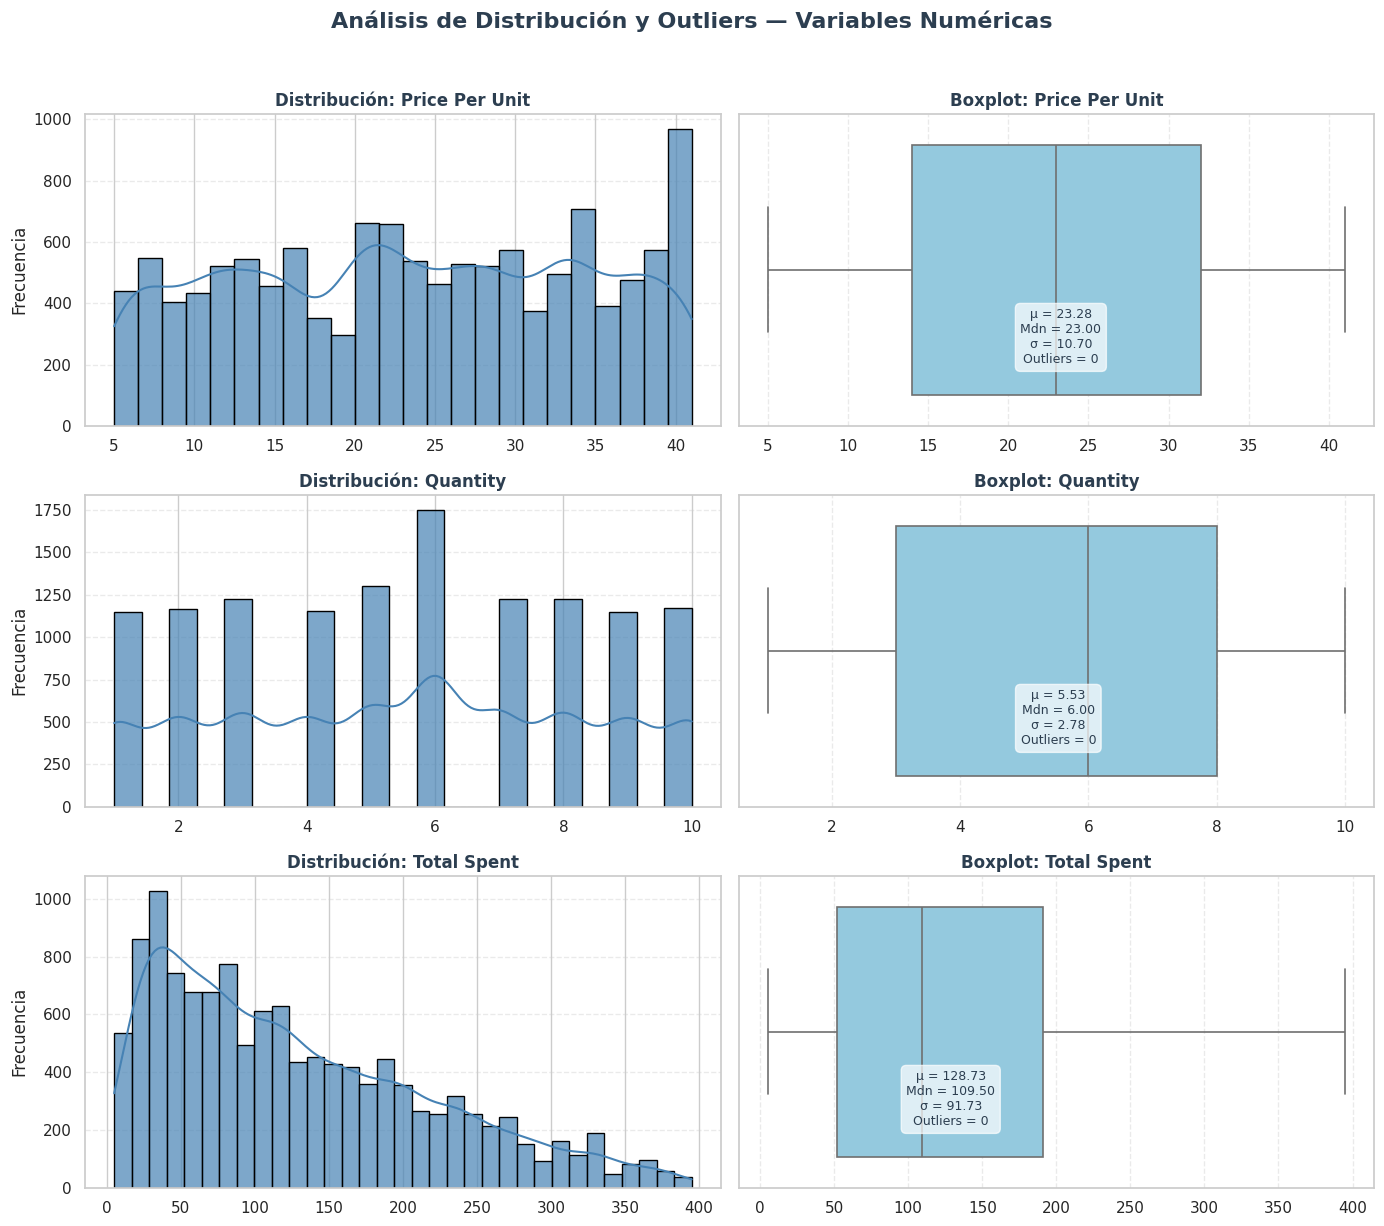


🎯 ANÁLISIS DE DISTRIBUCIONES
════════════════════════════════════════════════════════════

📊 VARIABLE: PRICE PER UNIT
────────────────────────────────────────
   📈 ESTADÍSTICAS DESCRIPTIVAS:
      • Media: 23.28
      • Mediana: 23.00
      • Desviación estándar: 10.70
      • Rango: 5.00 - 41.00
      • Coeficiente de variación: 46.0%
   📊 FORMA DE LA DISTRIBUCIÓN:
      • Asimetría: -0.03
      • Curtosis: -1.17
      • Interpretación: Simétrica
   🔍 ANÁLISIS DE OUTLIERS:
      • Número de outliers: 0
      • Porcentaje: 0.0%
      • Rango IQR: [14.00, 32.00]
   💡 INSIGHTS ACCIONABLES:
      • 📊 VARIABILIDAD MODERADA: Dispersión aceptable
      • ✅ OUTLIERS MÍNIMOS: Datos limpios

📊 VARIABLE: QUANTITY
────────────────────────────────────────
   📈 ESTADÍSTICAS DESCRIPTIVAS:
      • Media: 5.53
      • Mediana: 6.00
      • Desviación estándar: 2.78
      • Rango: 1.00 - 10.00
      • Coeficiente de variación: 50.3%
   📊 FORMA DE LA DISTRIBUCIÓN:
      • Asimetría: -0.03
      • Curto

In [16]:
distribucion_y_boxplots(df_clean, columnas=['Price Per Unit', 'Quantity', 'Total Spent'])

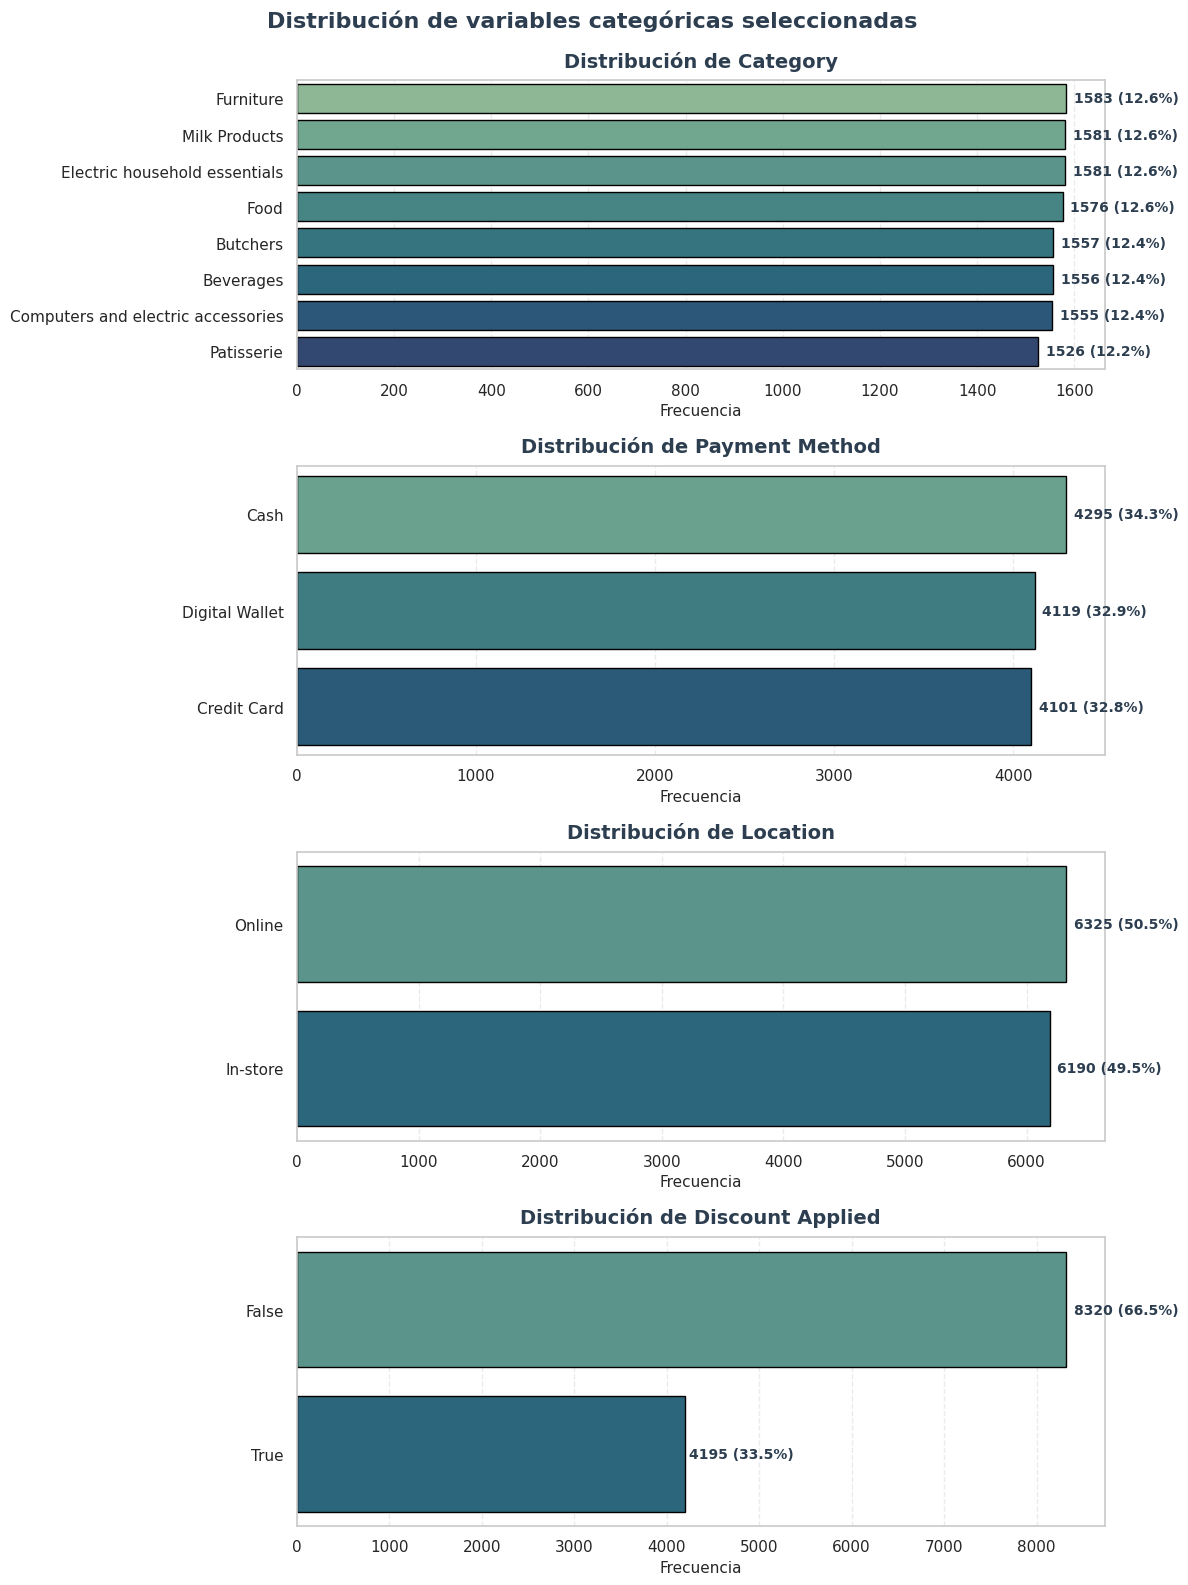


🎯 ANÁLISIS DE VARIABLES CATEGÓRICAS
═════════════════════════════════════════════════════════════════
📊 DATOS GENERALES:
   • Total de transacciones analizadas: 12,515
   • Variables categóricas analizadas: 4

📈 CATEGORY:
────────────────────────────────────────
   🏆 CATEGORÍA DOMINANTE:
      • Furniture: 12.6%
   📊 CONCENTRACIÓN:
      • Top 3 categorías: 37.9% del total
   🎯 DIVERSIDAD:
      • Número de categorías únicas: 8
   💡 INSIGHTS DE NEGOCIO:
      • ✅ PORTAFOLIO BALANCEADO: Distribución saludable
      • 🌈 DIVERSIFICACIÓN: Múltiples categorías presentes
   🚀 RECOMENDACIONES:
      • 🌱 Estrategia: Desarrollar categorías emergentes

📈 PAYMENT METHOD:
────────────────────────────────────────
   🏆 CATEGORÍA DOMINANTE:
      • Cash: 34.3%
   📊 CONCENTRACIÓN:
      • Top 3 categorías: 100.0% del total
   🎯 DIVERSIDAD:
      • Número de categorías únicas: 3
   💡 INSIGHTS DE NEGOCIO:
      • 🔄 DIVERSIDAD DE PAGOS: Múltiples métodos utilizados
      • 🔀 TRANSICIÓN DIGITAL: 65.7% mé

In [17]:
graficar_categoricas(df_clean)

## 05.6.- Converión de las Variables Categóricas

In [18]:
def convert_to_category(df, columns):
    """
    Convierte las columnas especificadas al tipo de dato 'category'.

    Parámetros:
    -----------
    df : pd.DataFrame
        DataFrame original
    columns : list
        Lista de columnas a convertir

    Retorna:
    --------
    df : pd.DataFrame
        DataFrame con columnas convertidas a categoría
    """
    for col in columns:
        df[col] = df[col].astype('category')
    return df

categorical_cols1 = ['Category', 'Payment Method', 'Location']
df_imputed_categorica = convert_to_category(df_clean, categorical_cols1)
df_imputed_categorica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12515 entries, 0 to 12514
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction ID    12515 non-null  object  
 1   Customer ID       12515 non-null  object  
 2   Category          12515 non-null  category
 3   Item              12515 non-null  object  
 4   Price Per Unit    12515 non-null  float64 
 5   Quantity          12515 non-null  float64 
 6   Total Spent       12515 non-null  float64 
 7   Payment Method    12515 non-null  category
 8   Location          12515 non-null  category
 9   Transaction Date  12515 non-null  object  
 10  Discount Applied  12515 non-null  bool    
dtypes: bool(1), category(3), float64(3), object(4)
memory usage: 734.0+ KB


## 05.7.- Converión de las variable fecha(date)

In [19]:
df_imputed_categorica['Transaction Date'] = pd.to_datetime(df_imputed_categorica['Transaction Date'])
df_imputed_categorica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12515 entries, 0 to 12514
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12515 non-null  object        
 1   Customer ID       12515 non-null  object        
 2   Category          12515 non-null  category      
 3   Item              12515 non-null  object        
 4   Price Per Unit    12515 non-null  float64       
 5   Quantity          12515 non-null  float64       
 6   Total Spent       12515 non-null  float64       
 7   Payment Method    12515 non-null  category      
 8   Location          12515 non-null  category      
 9   Transaction Date  12515 non-null  datetime64[ns]
 10  Discount Applied  12515 non-null  bool          
dtypes: bool(1), category(3), datetime64[ns](1), float64(3), object(3)
memory usage: 734.0+ KB


## 05.8.- Encabezados del Data Set

In [20]:
df_imputed_categorica.head(5)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,False
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


# 06.- Análisis de serie temporal

## 06.1.- Análisis General

🔍 ANÁLISIS RÁPIDO DE SERIE TEMPORAL
══════════════════════════════════════════════════
   • Período:        2022-01-01 a 2025-01-18
   • Días con data:  1114
   • Transacciones:  12515
   • Promedio/día:   11.2
   • Volatilidad:    0.312
   • Días sin data:  0


🔄 INICIANDO ANÁLISIS DE SERIE TEMPORAL
═══════════════════════════════════════════════════════
📊 1. PREPROCESAMIENTO DE DATOS...
   ✅ Período analizado: 2022-01-01 a 2025-01-18
   ✅ Días totales: 1114
   ✅ Transacciones totales: 12515
📈 2. CÁLCULO DE TENDENCIAS...
🔄 3. DESCOMPOSICIÓN ESTACIONAL (STL)...
🔍 4. DETECCIÓN DE ANOMALÍAS...
📋 5. GENERANDO REPORTE...
🎨 6. GENERANDO VISUALIZACIONES...


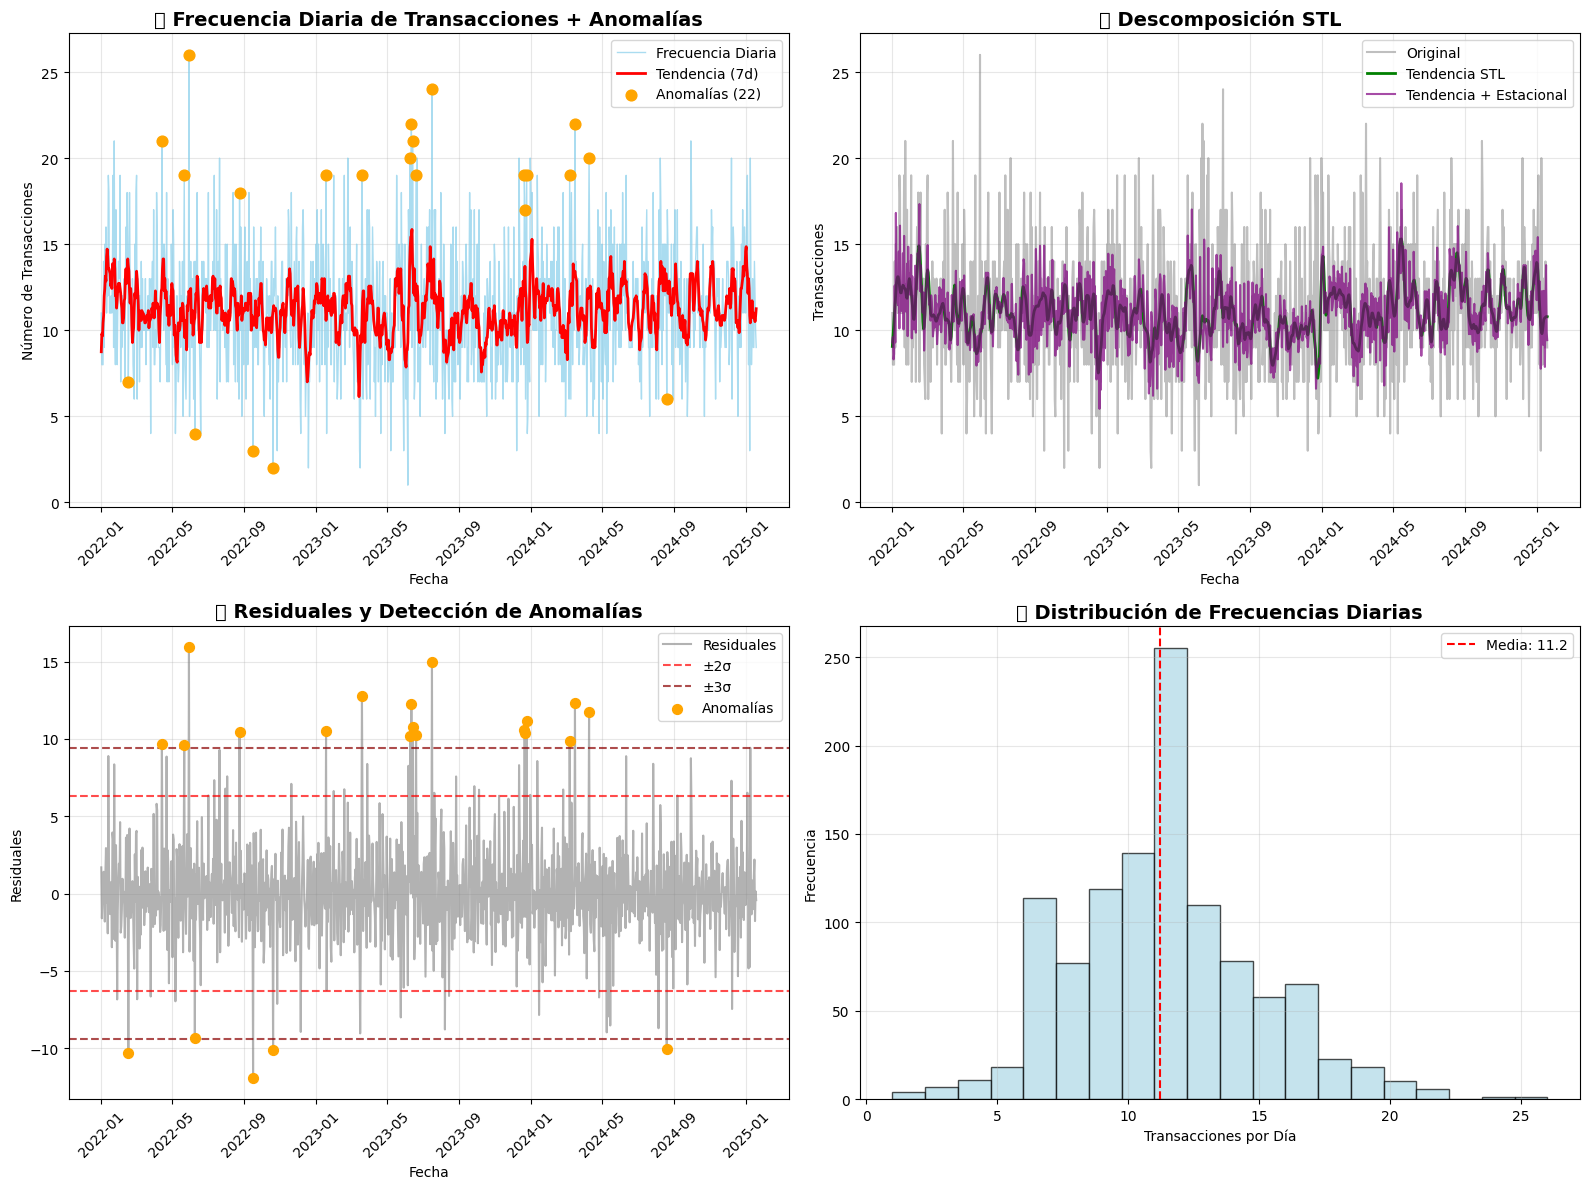


🎯 RESUMEN - ANÁLISIS DE SERIE TEMPORAL
═════════════════════════════════════════════════════════════════
📅 PERÍODO ANALIZADO:
   ┌─ Inicio:        2022-01-01
   ├─ Fin:           2025-01-18
   ├─ Días totales:  1114
   └─ Transacciones: 12515

📊 VOLUMEN DE TRANSACCIONES:
   ┌─ Promedio diario: 11.2
   ├─ Desviación:      3.5
   └─ Volatilidad:     0.312

🔍 DETECCIÓN DE ANOMALÍAS:
   ┌─ Total detectadas:  22
   ├─ Porcentaje:        1.97%
   └─ Umbral sigma:      σ = 3.0

🔄 ANÁLISIS ESTACIONAL:
   ┌─ Período:           7 días
   ├─ STL exitoso:       Sí
   └─ Fuerza estacional:  0.900

🛠️  MÉTODOS UTILIZADOS:
    1. Media móvil 7d
    2. Media móvil 14d
    3. Media móvil 28d
    4. Descomposición STL (período=7)
    5. Detección sigma (σ=3.0)
    6. Detección IQR (robusta)

💡 RECOMENDACIONES:
   • Análisis completo - serie temporal estable


In [ ]:
from statsmodels.tsa.seasonal import STL
from typing import Tuple, Dict, Any, Optional

def analyze_transaction_time_series(df: pd.DataFrame,
                                  date_col: str = 'Transaction Date',
                                  window: int = 7,
                                  anomaly_sigma: float = 3.0,
                                  seasonal_period: int = 7) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    """
    Analiza serie temporal de frecuencia diaria de transacciones de manera optimizada.

    Incluye:
    1) Conteo diario de transacciones
    2) Tendencia usando media móvil
    3) Descomposición estacional (STL)
    4) Detección de anomalías basada en residuales
    5) Reporte ejecutivo completo

    Parámetros:
    -----------
    df : DataFrame
        Dataset original
    date_col : str
        Nombre de la columna de fecha
    window : int
        Ventana para cálculo del rolling mean (tendencia)
    anomaly_sigma : float
        Multiplicador de desviación estándar para detectar anomalías
    seasonal_period : int
        Período estacional para descomposición STL

    Devuelve:
    ---------
    daily_df : DataFrame con frecuencia, tendencia y anomalías
    analysis_report : Diccionario con métricas y métodos utilizados
    """

    print("🔄 INICIANDO ANÁLISIS DE SERIE TEMPORAL")
    print("═" * 55)

    # Validaciones iniciales
    if date_col not in df.columns:
        raise ValueError(f"❌ La columna de fecha '{date_col}' no existe en el DataFrame")

    df_clean = df.copy()

    # ----------------------------------------------------------
    # 1) PREPROCESAMIENTO OPTIMIZADO
    # ----------------------------------------------------------
    print("📊 1. PREPROCESAMIENTO DE DATOS...")

    # Conversión optimizada de fecha
    df_clean[date_col] = pd.to_datetime(df_clean[date_col], errors='coerce')

    # Eliminar fechas inválidas
    invalid_dates = df_clean[date_col].isna().sum()
    if invalid_dates > 0:
        print(f"   ⚠️  Se eliminaron {invalid_dates} registros con fechas inválidas")
        df_clean = df_clean[df_clean[date_col].notna()]

    # Agrupación diaria optimizada
    daily_df = (
        df_clean.groupby(df_clean[date_col].dt.normalize())
        .size()
        .reset_index(name='Frequency')
    )
    daily_df.rename(columns={date_col: 'Transaction Date'}, inplace=True)
    daily_df = daily_df.sort_values('Transaction Date').reset_index(drop=True)

    # Validar suficientes datos
    if len(daily_df) < seasonal_period * 2:
        raise ValueError(f"❌ Insuficientes datos. Se requieren al menos {seasonal_period * 2} días para análisis estacional")

    print(f"   ✅ Período analizado: {daily_df['Transaction Date'].min().strftime('%Y-%m-%d')} a {daily_df['Transaction Date'].max().strftime('%Y-%m-%d')}")
    print(f"   ✅ Días totales: {len(daily_df)}")
    print(f"   ✅ Transacciones totales: {daily_df['Frequency'].sum()}")

    # ----------------------------------------------------------
    # 2) ANÁLISIS DE TENDENCIA OPTIMIZADO
    # ----------------------------------------------------------
    print("📈 2. CÁLCULO DE TENDENCIAS...")

    # Múltiples ventanas para análisis comparativo
    windows = [window, window*2, min(window*4, len(daily_df)//4)]
    methods_used = []

    for w in windows:
        if w < len(daily_df):
            col_name = f'Rolling_Mean_{w}d'
            daily_df[col_name] = daily_df['Frequency'].rolling(window=w, center=True, min_periods=1).mean()
            methods_used.append(f"Media móvil {w}d")

    # Tendencia principal
    daily_df['Trend_Rolling'] = daily_df[f'Rolling_Mean_{window}d']

    # ----------------------------------------------------------
    # 3) DESCOMPOSICIÓN ESTACIONAL OPTIMIZADA
    # ----------------------------------------------------------
    print("🔄 3. DESCOMPOSICIÓN ESTACIONAL (STL)...")

    try:
        # STL con parámetros optimizados
        stl = STL(
            daily_df['Frequency'],
            period=seasonal_period,
            robust=True,
            seasonal=13
        )
        stl_result = stl.fit()

        daily_df['Trend_STL'] = stl_result.trend
        daily_df['Seasonal'] = stl_result.seasonal
        daily_df['Residual'] = stl_result.resid

        methods_used.append(f"Descomposición STL (período={seasonal_period})")
        stl_success = True

    except Exception as e:
        print(f"   ⚠️  STL falló: {e}. Usando método alternativo...")
        # Método alternativo simple para tendencia
        daily_df['Trend_STL'] = daily_df['Frequency'].rolling(window=seasonal_period*2, center=True).mean()
        daily_df['Seasonal'] = 0
        daily_df['Residual'] = daily_df['Frequency'] - daily_df['Trend_STL']
        stl_success = False
        methods_used.append("Tendencia alternativa (rolling mean)")

    # ----------------------------------------------------------
    # 4) DETECCIÓN DE ANOMALÍAS MEJORADA
    # ----------------------------------------------------------
    print("🔍 4. DETECCIÓN DE ANOMALÍAS...")

    # Estadísticas de residuales
    resid_stats = {
        'mean': daily_df['Residual'].mean(),
        'std': daily_df['Residual'].std(),
        'min': daily_df['Residual'].min(),
        'max': daily_df['Residual'].max(),
        'mad': (daily_df['Residual'] - daily_df['Residual'].mean()).abs().mean()  # Mean Absolute Deviation
    }

    # Múltiples métodos de detección
    anomaly_methods = {}

    # Método 1: Sigma-based
    upper_sigma = resid_stats['mean'] + anomaly_sigma * resid_stats['std']
    lower_sigma = resid_stats['mean'] - anomaly_sigma * resid_stats['std']
    anomaly_methods['sigma'] = ((daily_df['Residual'] > upper_sigma) | (daily_df['Residual'] < lower_sigma))

    # Método 2: IQR-based (robusto a outliers)
    q1, q3 = daily_df['Residual'].quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_iqr = q3 + 2.5 * iqr
    lower_iqr = q1 - 2.5 * iqr
    anomaly_methods['iqr'] = ((daily_df['Residual'] > upper_iqr) | (daily_df['Residual'] < lower_iqr))

    # Combinar métodos (consenso)
    daily_df['Anomaly_Sigma'] = anomaly_methods['sigma']
    daily_df['Anomaly_IQR'] = anomaly_methods['iqr']
    daily_df['Anomaly'] = anomaly_methods['sigma'] | anomaly_methods['iqr']

    methods_used.append(f"Detección sigma (σ={anomaly_sigma})")
    methods_used.append("Detección IQR (robusta)")

    # ----------------------------------------------------------
    # 5) MÉTRICAS Y REPORTE
    # ----------------------------------------------------------
    print("📋 5. GENERANDO REPORTE...")

    # Métricas de calidad
    volatility = daily_df['Frequency'].std() / daily_df['Frequency'].mean() if daily_df['Frequency'].mean() > 0 else 0
    trend_strength = 1 - (daily_df['Residual'].var() / daily_df['Frequency'].var()) if daily_df['Frequency'].var() > 0 else 0

    anomalies_detected = daily_df['Anomaly'].sum()
    anomaly_percentage = (anomalies_detected / len(daily_df)) * 100

    # Construir reporte completo
    analysis_report = {
        'metadata': {
            'date_range': {
                'start': daily_df['Transaction Date'].min(),
                'end': daily_df['Transaction Date'].max(),
                'days_total': len(daily_df)
            },
            'transaction_volume': {
                'total': daily_df['Frequency'].sum(),
                'daily_avg': daily_df['Frequency'].mean(),
                'daily_std': daily_df['Frequency'].std()
            }
        },
        'methods_used': methods_used,
        'trend_analysis': {
            'volatility': round(volatility, 4),
            'trend_strength': round(trend_strength, 4),
            'rolling_window': window
        },
        'anomaly_detection': {
            'anomalies_detected': int(anomalies_detected),
            'anomaly_percentage': round(anomaly_percentage, 2),
            'sigma_threshold': anomaly_sigma,
            'residual_stats': {k: round(v, 4) for k, v in resid_stats.items()},
            'anomaly_dates': daily_df[daily_df['Anomaly']]['Transaction Date'].tolist()
        },
        'seasonal_analysis': {
            'period': seasonal_period,
            'stl_success': stl_success,
            'seasonal_strength': round(abs(daily_df['Seasonal']).mean(), 4) if stl_success else 0
        }
    }

    # ----------------------------------------------------------
    # 6) VISUALIZACIONES MEJORADAS
    # ----------------------------------------------------------
    _create_comprehensive_visualizations(daily_df, analysis_report, window)

    # ----------------------------------------------------------
    # 7) REPORTE EJECUTIVO
    # ----------------------------------------------------------
    _print_time_series_summary(analysis_report)

    return daily_df, analysis_report

def _create_comprehensive_visualizations(daily_df: pd.DataFrame, report: Dict[str, Any], window: int) -> None:
    """
    Crea visualizaciones comprehensivas para el análisis de series temporales.
    """
    print("🎨 6. GENERANDO VISUALIZACIONES...")

    # Configuración de estilo
    plt.style.use('default')
    fig = plt.figure(figsize=(16, 12))

    # 1) Serie temporal principal con anomalías
    ax1 = plt.subplot(2, 2, 1)
    plt.plot(daily_df['Transaction Date'], daily_df['Frequency'],
             label='Frecuencia Diaria', color='skyblue', alpha=0.7, linewidth=1)
    plt.plot(daily_df['Transaction Date'], daily_df['Trend_Rolling'],
             label=f'Tendencia ({window}d)', color='red', linewidth=2)

    # Resaltar anomalías
    anomaly_dates = daily_df[daily_df['Anomaly']]['Transaction Date']
    anomaly_values = daily_df[daily_df['Anomaly']]['Frequency']
    plt.scatter(anomaly_dates, anomaly_values, color='orange', s=60,
                label=f'Anomalías ({len(anomaly_dates)})', zorder=5)

    plt.title('📈 Frecuencia Diaria de Transacciones + Anomalías', fontsize=14, fontweight='bold')
    plt.xlabel('Fecha')
    plt.ylabel('Número de Transacciones')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

    # 2) Descomposición STL (si está disponible)
    ax2 = plt.subplot(2, 2, 2)
    if 'Trend_STL' in daily_df.columns and report['seasonal_analysis']['stl_success']:
        plt.plot(daily_df['Transaction Date'], daily_df['Frequency'],
                 label='Original', alpha=0.5, color='gray')
        plt.plot(daily_df['Transaction Date'], daily_df['Trend_STL'],
                 label='Tendencia STL', color='green', linewidth=2)
        plt.plot(daily_df['Transaction Date'], daily_df['Seasonal'] + daily_df['Trend_STL'],
                 label='Tendencia + Estacional', color='purple', alpha=0.7)
        plt.title('🔄 Descomposición STL', fontsize=14, fontweight='bold')
    else:
        plt.plot(daily_df['Transaction Date'], daily_df['Frequency'],
                 label='Frecuencia', color='blue', alpha=0.7)
        plt.title('📊 Serie Temporal Original', fontsize=14, fontweight='bold')

    plt.xlabel('Fecha')
    plt.ylabel('Transacciones')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

    # 3) Residuales y anomalías
    ax3 = plt.subplot(2, 2, 3)
    residuals = daily_df['Residual']
    plt.plot(daily_df['Transaction Date'], residuals,
             label='Residuales', color='gray', alpha=0.6)

    # Líneas de threshold
    resid_std = residuals.std()
    plt.axhline(y=2*resid_std, color='red', linestyle='--', alpha=0.7, label='±2σ')
    plt.axhline(y=-2*resid_std, color='red', linestyle='--', alpha=0.7)
    plt.axhline(y=3*resid_std, color='darkred', linestyle='--', alpha=0.7, label='±3σ')
    plt.axhline(y=-3*resid_std, color='darkred', linestyle='--', alpha=0.7)

    # Resaltar anomalías en residuales
    anomaly_residuals = daily_df[daily_df['Anomaly']]['Residual']
    anomaly_dates_resid = daily_df[daily_df['Anomaly']]['Transaction Date']
    plt.scatter(anomaly_dates_resid, anomaly_residuals, color='orange', s=50,
                label='Anomalías', zorder=5)

    plt.title('🔍 Residuales y Detección de Anomalías', fontsize=14, fontweight='bold')
    plt.xlabel('Fecha')
    plt.ylabel('Residuales')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

    # 4) Distribución de frecuencias
    ax4 = plt.subplot(2, 2, 4)
    plt.hist(daily_df['Frequency'], bins=20, alpha=0.7, color='lightblue', edgecolor='black')
    plt.axvline(daily_df['Frequency'].mean(), color='red', linestyle='--',
                label=f'Media: {daily_df["Frequency"].mean():.1f}')
    plt.title('📊 Distribución de Frecuencias Diarias', fontsize=14, fontweight='bold')
    plt.xlabel('Transacciones por Día')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def _print_time_series_summary(report: Dict[str, Any]) -> None:
    """
    Muestra un resumen ejecutivo del análisis de series temporales.
    """
    print("\n🎯 RESUMEN - ANÁLISIS DE SERIE TEMPORAL")
    print("═" * 65)

    meta = report['metadata']
    trend = report['trend_analysis']
    anomalies = report['anomaly_detection']
    seasonal = report['seasonal_analysis']

    print(f"📅 PERÍODO ANALIZADO:")
    print(f"   ┌─ Inicio:        {meta['date_range']['start'].strftime('%Y-%m-%d')}")
    print(f"   ├─ Fin:           {meta['date_range']['end'].strftime('%Y-%m-%d')}")
    print(f"   ├─ Días totales:  {meta['date_range']['days_total']}")
    print(f"   └─ Transacciones: {meta['transaction_volume']['total']}")

    print(f"\n📊 VOLUMEN DE TRANSACCIONES:")
    print(f"   ┌─ Promedio diario: {meta['transaction_volume']['daily_avg']:.1f}")
    print(f"   ├─ Desviación:      {meta['transaction_volume']['daily_std']:.1f}")
    print(f"   └─ Volatilidad:     {trend['volatility']:.3f}")

    print(f"\n🔍 DETECCIÓN DE ANOMALÍAS:")
    print(f"   ┌─ Total detectadas:  {anomalies['anomalies_detected']}")
    print(f"   ├─ Porcentaje:        {anomalies['anomaly_percentage']}%")
    print(f"   └─ Umbral sigma:      σ = {anomalies['sigma_threshold']}")

    print(f"\n🔄 ANÁLISIS ESTACIONAL:")
    print(f"   ┌─ Período:           {seasonal['period']} días")
    print(f"   ├─ STL exitoso:       {'Sí' if seasonal['stl_success'] else 'No'}")
    if seasonal['stl_success']:
        print(f"   └─ Fuerza estacional:  {seasonal['seasonal_strength']:.3f}")

    print(f"\n🛠️  MÉTODOS UTILIZADOS:")
    for i, method in enumerate(report['methods_used'], 1):
        print(f"   {i:2d}. {method}")

    # Recomendaciones basadas en el análisis
    print(f"\n💡 RECOMENDACIONES:")
    if anomalies['anomaly_percentage'] > 10:
        print(f"   • Alto porcentaje de anomalías ({anomalies['anomaly_percentage']}%) - revisar datos")
    elif trend['volatility'] > 0.5:
        print(f"   • Alta volatilidad detectada - considerar suavizado adicional")
    elif seasonal['stl_success'] and seasonal['seasonal_strength'] < 0.1:
        print(f"   • Patrón estacional débil - posible serie no estacional")
    else:
        print(f"   • Análisis completo - serie temporal estable")

# FUNCIÓN AUXILIAR PARA ANÁLISIS RÁPIDO
def quick_time_series_overview(df: pd.DataFrame, date_col: str = 'Transaction Date') -> None:
    """
    Análisis rápido preliminar de la serie temporal.
    """
    print("🔍 ANÁLISIS RÁPIDO DE SERIE TEMPORAL")
    print("═" * 50)

    if date_col not in df.columns:
        print(f"❌ Columna de fecha '{date_col}' no encontrada")
        return

    df_temp = df.copy()
    df_temp[date_col] = pd.to_datetime(df_temp[date_col], errors='coerce')
    df_temp = df_temp[df_temp[date_col].notna()]

    daily_count = df_temp.groupby(df_temp[date_col].dt.date).size()

    print(f"   • Período:        {daily_count.index.min()} a {daily_count.index.max()}")
    print(f"   • Días con data:  {len(daily_count)}")
    print(f"   • Transacciones:  {daily_count.sum()}")
    print(f"   • Promedio/día:   {daily_count.mean():.1f}")
    print(f"   • Volatilidad:    {daily_count.std()/daily_count.mean() if daily_count.mean() > 0 else 0:.3f}")
    print(f"   • Días sin data:  {(df_temp[date_col].max() - df_temp[date_col].min()).days - len(daily_count) + 1}")

# Análisis rápido preliminar
quick_time_series_overview(df_imputed_categorica)
print("\n")

# Análisis completo
daily_df, report = analyze_transaction_time_series(
    df_imputed_categorica,
    date_col='Transaction Date',
    window=7,
    anomaly_sigma=3.0,
    seasonal_period=7
)

## 06.2.- Analisis temporal de las ventas

🔍 ANÁLISIS RÁPIDO DE VENTAS
═════════════════════════════════════════════
   • Años con datos:    4
   • Período completo:  2022-01 a 2025-01
   • Año actual (2025): Presente
   ⚠️  2025: solo 1 meses de datos


📊 INICIANDO DASHBOARD DE VENTAS MENSUALES
═══════════════════════════════════════════════════════
   🔹 Años excluidos: [2025]
   📉 Registros removidos por filtros: 212 (1.7%)
   ✅ Período filtrado: 2022-01-01 a 2024-12-31
   ✅ Ventas totales: $1,584,537
   ✅ Meses analizados: 36
   ✅ Años disponibles: 3
   ✅ Años excluidos: [2025]
🎨 GENERANDO VISUALIZACIONES...


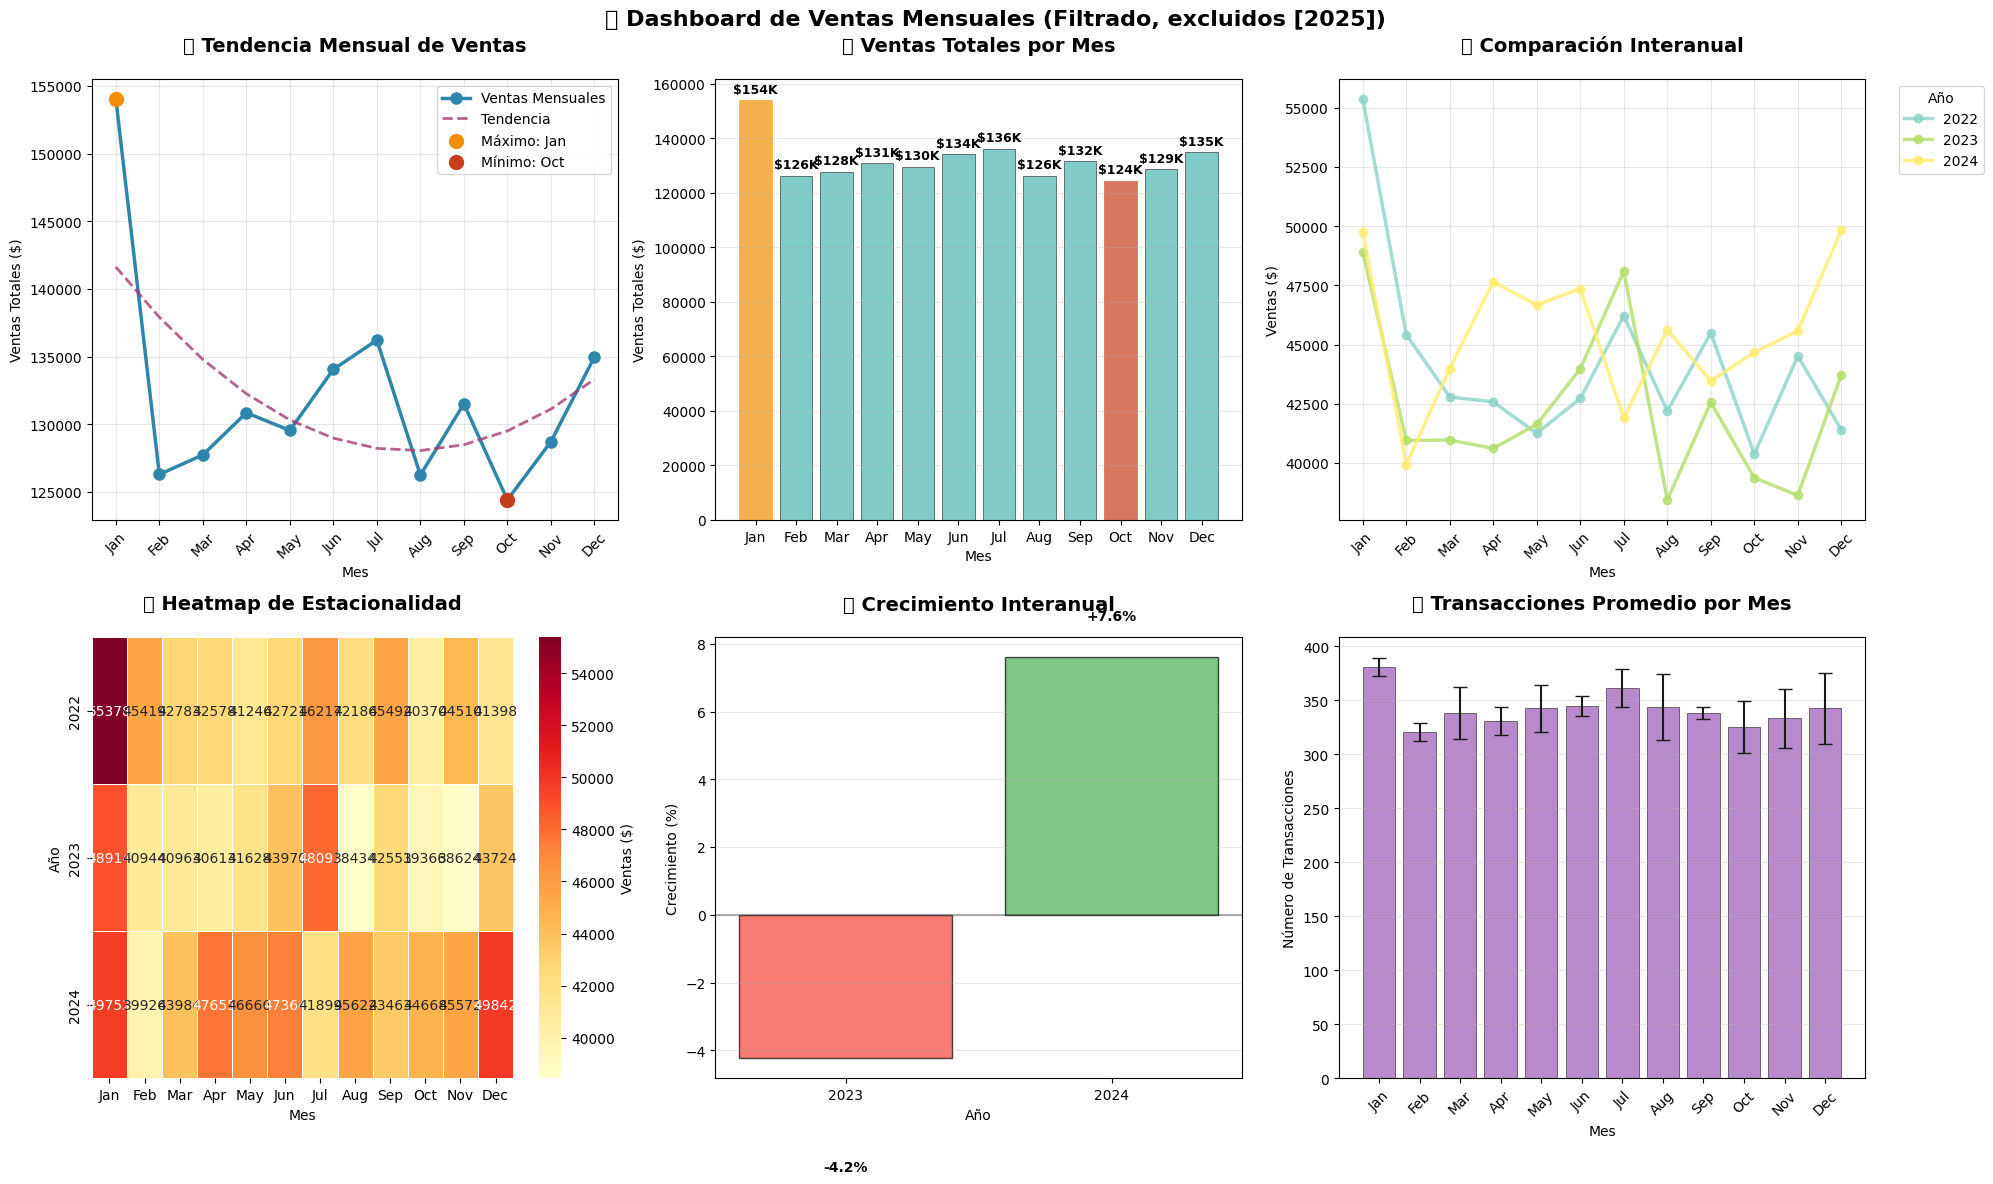

📋 GENERANDO REPORTE ...

🎯 RESUMEN - DASHBOARD DE VENTAS MENSUALES
═════════════════════════════════════════════════════════════════
🎛️  FILTROS APLICADOS:
   ∙ Años excluidos: [2025]
   ∙ Período real: 2022-2024

📅 RESUMEN GENERAL:
   ┌─ Período analizado:    2022 - 2024
   ├─ Años analizados:      3
   ├─ Ventas totales:       $1,584,537
   └─ Ventas mensual prom:  $44,015

📈 ANÁLISIS ESTACIONAL:
   ┌─ Mejor mes:            Jan ($154,044)
   ├─ Peor mes:             Oct ($124,404)
   ├─ Ratio pico/valle:     1.2x
   └─ Variación estacional: 5.9%

🚀 CRECIMIENTO INTERANUAL:
   ∙ 2022-2023: -4.2% 📉
   ∙ 2023-2024: +7.6% 📈

🛠️  MÉTODOS UTILIZADOS:
    1. Agregación mensual de ventas
    2. Análisis de tendencia polinómica
    3. Comparación interanual
    4. Heatmap de estacionalidad
    5. Cálculo de crecimiento anual
    6. Análisis de distribución de transacciones

💡 INSIGHTS RECOMENDADOS:
   • Crecimiento negativo en algunos períodos: investigar causas


In [ ]:
from typing import Dict, Any, List, Optional, Tuple
from datetime import datetime

def monthly_sales_dashboard(df: pd.DataFrame,
                          date_col: str = 'Transaction Date',
                          value_col: str = 'Total Spent',
                          start_date: Optional[str] = None,
                          end_date: Optional[str] = None,
                          exclude_years: List[int] = None,
                          figsize: tuple = (20, 12)) -> Dict[str, Any]:
    """
    Crea un dashboard mensual comprehensivo con filtros de fecha y exclusión de años.

    Incluye:
    - Tendencia mensual con métricas
    - Barras por mes con crecimiento
    - Comparación interanual detallada
    - Análisis de estacionalidad
    - Reporte ejecutivo con insights

    Parámetros:
    -----------
    df : pd.DataFrame
        DataFrame con datos de transacciones
    date_col : str
        Columna de fecha
    value_col : str
        Columna de valor de ventas
    start_date : str, optional
        Fecha de inicio en formato 'YYYY-MM-DD'
    end_date : str, optional
        Fecha de fin en formato 'YYYY-MM-DD'
    exclude_years : List[int], optional
        Lista de años a excluir del análisis
    figsize : tuple
        Tamaño de la figura

    Devuelve:
    --------
    dashboard_report : dict
        Reporte completo con métricas y datos agregados
    """

    print("📊 INICIANDO DASHBOARD DE VENTAS MENSUALES")
    print("═" * 55)

    # Validaciones iniciales
    if date_col not in df.columns:
        raise ValueError(f"❌ Columna de fecha '{date_col}' no encontrada")
    if value_col not in df.columns:
        raise ValueError(f"❌ Columna de valor '{value_col}' no encontrada")

    df_clean = df.copy()

    # Preprocesamiento optimizado
    df_clean[date_col] = pd.to_datetime(df_clean[date_col], errors='coerce')
    df_clean = df_clean[df_clean[date_col].notna() & df_clean[value_col].notna()]

    if df_clean.empty:
        raise ValueError("❌ No hay datos válidos después del preprocesamiento")

    # Aplicar filtros de fecha
    df_filtered = _apply_date_filters(df_clean, date_col, start_date, end_date, exclude_years)

    if df_filtered.empty:
        raise ValueError("❌ No hay datos después de aplicar los filtros de fecha")

    # Extracción de características temporales
    df_filtered['Year'] = df_filtered[date_col].dt.year
    df_filtered['Month'] = df_filtered[date_col].dt.month
    df_filtered['Month_Name'] = df_filtered[date_col].dt.strftime('%b')
    df_filtered['Year_Month'] = df_filtered[date_col].dt.to_period('M')
    df_filtered['Date'] = df_filtered[date_col].dt.date

    # Orden de meses
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Agregación optimizada
    sales_monthly = (
        df_filtered.groupby(['Year', 'Month', 'Month_Name', 'Year_Month'])[value_col]
        .agg(['sum', 'count', 'mean'])
        .reset_index()
        .rename(columns={'sum': 'Total_Sales', 'count': 'Transaction_Count', 'mean': 'Avg_Transaction'})
    )

    # Cálculo de métricas adicionales
    sales_monthly['Month_Number'] = sales_monthly['Month_Name'].map(
        {month: i for i, month in enumerate(month_order)}
    )
    sales_monthly = sales_monthly.sort_values(['Year', 'Month_Number'])

    # Métricas para el reporte
    total_sales = sales_monthly['Total_Sales'].sum()
    avg_monthly_sales = sales_monthly['Total_Sales'].mean()
    years_available = sales_monthly['Year'].unique()

    print(f"   ✅ Período filtrado: {df_filtered['Date'].min()} a {df_filtered['Date'].max()}")
    print(f"   ✅ Ventas totales: ${total_sales:,.0f}")
    print(f"   ✅ Meses analizados: {len(sales_monthly)}")
    print(f"   ✅ Años disponibles: {len(years_available)}")
    if exclude_years:
        print(f"   ✅ Años excluidos: {exclude_years}")

    # Crear visualizaciones
    _create_monthly_dashboard_visualizations(sales_monthly, month_order, value_col, figsize,
                                           start_date, end_date, exclude_years)

    # Generar reporte ejecutivo
    dashboard_report = _generate_dashboard_report(sales_monthly, total_sales, avg_monthly_sales,
                                                years_available, start_date, end_date, exclude_years)

    return dashboard_report

def _apply_date_filters(df: pd.DataFrame, date_col: str, start_date: Optional[str],
                       end_date: Optional[str], exclude_years: Optional[List[int]]) -> pd.DataFrame:
    """
    Aplica filtros de fecha al DataFrame.
    """
    df_filtered = df.copy()

    # Aplicar filtro de fecha de inicio
    if start_date:
        start_dt = pd.to_datetime(start_date)
        df_filtered = df_filtered[df_filtered[date_col] >= start_dt]
        print(f"   🔹 Aplicado filtro desde: {start_date}")

    # Aplicar filtro de fecha de fin
    if end_date:
        end_dt = pd.to_datetime(end_date)
        df_filtered = df_filtered[df_filtered[date_col] <= end_dt]
        print(f"   🔹 Aplicado filtro hasta: {end_date}")

    # Aplicar exclusión de años
    if exclude_years:
        df_filtered = df_filtered[~df_filtered[date_col].dt.year.isin(exclude_years)]
        print(f"   🔹 Años excluidos: {exclude_years}")

    # Información sobre el filtrado
    original_count = len(df)
    filtered_count = len(df_filtered)
    removed_count = original_count - filtered_count

    if removed_count > 0:
        print(f"   📉 Registros removidos por filtros: {removed_count} ({removed_count/original_count*100:.1f}%)")

    return df_filtered

def _create_monthly_dashboard_visualizations(sales_monthly: pd.DataFrame,
                                           month_order: List[str],
                                           value_col: str,
                                           figsize: tuple,
                                           start_date: Optional[str],
                                           end_date: Optional[str],
                                           exclude_years: Optional[List[int]]) -> None:
    """
    Crea visualizaciones comprehensivas para el dashboard mensual.
    """
    print("🎨 GENERANDO VISUALIZACIONES...")

    # Configuración de estilo
    plt.style.use('default')
    sns.set_palette("husl")
    fig = plt.figure(figsize=figsize)

    # Título general con información de filtros
    filter_info = ""
    if start_date or end_date or exclude_years:
        filter_info = " (Filtrado"
        if start_date:
            filter_info += f" desde {start_date}"
        if end_date:
            filter_info += f" hasta {end_date}"
        if exclude_years:
            filter_info += f", excluidos {exclude_years}"
        filter_info += ")"

    plt.suptitle(f'📊 Dashboard de Ventas Mensuales{filter_info}',
                 fontsize=16, fontweight='bold', y=0.98)

    # 1) TENDENCIA MENSUAL CON MÉTRICAS
    ax1 = plt.subplot(2, 3, 1)

    # Preparar datos para tendencia
    monthly_trend = sales_monthly.groupby('Month_Name')['Total_Sales'].sum().reindex(month_order)

    plt.plot(monthly_trend.index, monthly_trend.values,
             marker='o', linewidth=2.5, markersize=8,
             color='#2E86AB', label='Ventas Mensuales')

    # Línea de tendencia polinómica
    x_numeric = np.arange(len(monthly_trend))
    z = np.polyfit(x_numeric, monthly_trend.values, 2)
    p = np.poly1d(z)
    plt.plot(monthly_trend.index, p(x_numeric), '--',
             color='#A23B72', linewidth=2, alpha=0.8, label='Tendencia')

    # Destacar máximo y mínimo
    max_month = monthly_trend.idxmax()
    min_month = monthly_trend.idxmin()
    plt.scatter([max_month], [monthly_trend[max_month]],
                color='#F18F01', s=100, zorder=5, label=f'Máximo: {max_month}')
    plt.scatter([min_month], [monthly_trend[min_month]],
                color='#C73E1D', s=100, zorder=5, label=f'Mínimo: {min_month}')

    plt.title('📈 Tendencia Mensual de Ventas', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Mes')
    plt.ylabel('Ventas Totales ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

    # 2) BARRAS POR MES CON CRECIMIENTO
    ax2 = plt.subplot(2, 3, 2)

    bars = plt.bar(monthly_trend.index, monthly_trend.values,
                   color='#4CB5AE', alpha=0.7, edgecolor='black', linewidth=0.5)

    # Colorear máximo y mínimo
    bars[month_order.index(max_month)].set_color('#F18F01')
    bars[month_order.index(min_month)].set_color('#C73E1D')

    # Añadir valores en las barras
    for i, (month, value) in enumerate(zip(monthly_trend.index, monthly_trend.values)):
        plt.text(i, value + monthly_trend.max() * 0.01, f'${value/1000:.0f}K',
                ha='center', va='bottom', fontweight='bold', fontsize=9)

    plt.title('💰 Ventas Totales por Mes', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Mes')
    plt.ylabel('Ventas Totales ($)')
    plt.grid(True, alpha=0.3, axis='y')

    # 3) COMPARACIÓN INTERANUAL
    ax3 = plt.subplot(2, 3, 3)

    years = sorted(sales_monthly['Year'].unique())
    colors = plt.cm.Set3(np.linspace(0, 1, len(years)))

    for i, year in enumerate(years):
        year_data = sales_monthly[sales_monthly['Year'] == year]
        year_data_sorted = year_data.set_index('Month_Name').reindex(month_order)

        plt.plot(year_data_sorted.index, year_data_sorted['Total_Sales'],
                marker='o', linewidth=2.5, markersize=6,
                color=colors[i], label=str(year), alpha=0.8)

    plt.title('🔄 Comparación Interanual', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Mes')
    plt.ylabel('Ventas ($)')
    plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

    # 4) ESTACIONALIDAD - HEATMAP
    ax4 = plt.subplot(2, 3, 4)

    # Preparar datos para heatmap
    heatmap_data = sales_monthly.pivot_table(
        index='Year',
        columns='Month_Name',
        values='Total_Sales',
        aggfunc='sum'
    ).reindex(columns=month_order)

    sns.heatmap(heatmap_data,
                annot=True, fmt='.0f',
                cmap='YlOrRd',
                cbar_kws={'label': 'Ventas ($)'},
                linewidths=0.5)

    plt.title('🔥 Heatmap de Estacionalidad', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Mes')
    plt.ylabel('Año')

    # 5) CRECIMIENTO INTERANUAL
    ax5 = plt.subplot(2, 3, 5)

    if len(years) > 1:
        growth_data = []
        for year in years[1:]:
            prev_year = year - 1
            if prev_year in years:
                current_sales = sales_monthly[sales_monthly['Year'] == year]['Total_Sales'].sum()
                prev_sales = sales_monthly[sales_monthly['Year'] == prev_year]['Total_Sales'].sum()
                growth_pct = ((current_sales - prev_sales) / prev_sales) * 100
                growth_data.append({'Year': year, 'Growth_Pct': growth_pct})

        if growth_data:
            growth_df = pd.DataFrame(growth_data)
            colors = ['#4CAF50' if x > 0 else '#F44336' for x in growth_df['Growth_Pct']]

            bars = plt.bar(growth_df['Year'].astype(str), growth_df['Growth_Pct'],
                          color=colors, alpha=0.7, edgecolor='black')

            # Añadir valores en las barras
            for bar, value in zip(bars, growth_df['Growth_Pct']):
                plt.text(bar.get_x() + bar.get_width()/2,
                        bar.get_height() + (1 if value > 0 else -3),
                        f'{value:+.1f}%',
                        ha='center', va='bottom' if value > 0 else 'top',
                        fontweight='bold')

            plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
            plt.title('📈 Crecimiento Interanual', fontsize=14, fontweight='bold', pad=20)
            plt.xlabel('Año')
            plt.ylabel('Crecimiento (%)')
            plt.grid(True, alpha=0.3, axis='y')

    # 6) DISTRIBUCIÓN DE TRANSACCIONES POR MES
    ax6 = plt.subplot(2, 3, 6)

    transaction_stats = sales_monthly.groupby('Month_Name')['Transaction_Count'].agg(['mean', 'std']).reindex(month_order)

    x_pos = np.arange(len(month_order))
    plt.bar(x_pos, transaction_stats['mean'],
            yerr=transaction_stats['std'],
            capsize=5, alpha=0.7, color='#9B59B6',
            edgecolor='black', linewidth=0.5)

    plt.title('📦 Transacciones Promedio por Mes', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Mes')
    plt.ylabel('Número de Transacciones')
    plt.xticks(x_pos, month_order, rotation=45)
    plt.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

def _generate_dashboard_report(sales_monthly: pd.DataFrame,
                             total_sales: float,
                             avg_monthly_sales: float,
                             years_available: np.ndarray,
                             start_date: Optional[str],
                             end_date: Optional[str],
                             exclude_years: Optional[List[int]]) -> Dict[str, Any]:
    """
    Genera un reporte ejecutivo con insights del dashboard.
    """
    print("📋 GENERANDO REPORTE ...")

    # Métricas básicas
    monthly_aggregated = sales_monthly.groupby('Month_Name')['Total_Sales'].sum()
    best_month = monthly_aggregated.idxmax()
    worst_month = monthly_aggregated.idxmin()
    best_month_sales = monthly_aggregated.max()
    worst_month_sales = monthly_aggregated.min()

    # Cálculo de estacionalidad
    seasonal_variation = (monthly_aggregated.std() / monthly_aggregated.mean()) * 100

    # Crecimiento interanual (si hay múltiples años)
    growth_metrics = {}
    years = sorted(years_available)
    if len(years) > 1:
        for i, year in enumerate(years[1:], 1):
            prev_year = years[i-1]
            current_year_sales = sales_monthly[sales_monthly['Year'] == year]['Total_Sales'].sum()
            prev_year_sales = sales_monthly[sales_monthly['Year'] == prev_year]['Total_Sales'].sum()
            growth_pct = ((current_year_sales - prev_year_sales) / prev_year_sales) * 100
            growth_metrics[f'{prev_year}-{year}'] = growth_pct

    # Construir reporte
    dashboard_report = {
        'filters_applied': {
            'start_date': start_date,
            'end_date': end_date,
            'exclude_years': exclude_years,
            'date_range_actual': {
                'start': sales_monthly['Year'].min(),
                'end': sales_monthly['Year'].max()
            }
        },
        'summary_metrics': {
            'total_sales': total_sales,
            'avg_monthly_sales': avg_monthly_sales,
            'years_analyzed': len(years_available),
            'months_analyzed': len(sales_monthly),
            'date_range': {
                'start': sales_monthly['Year'].min(),
                'end': sales_monthly['Year'].max()
            }
        },
        'seasonal_analysis': {
            'best_month': best_month,
            'best_month_sales': best_month_sales,
            'worst_month': worst_month,
            'worst_month_sales': worst_month_sales,
            'seasonal_variation_pct': seasonal_variation,
            'peak_to_trough_ratio': best_month_sales / worst_month_sales
        },
        'growth_analysis': growth_metrics,
        'monthly_data': sales_monthly.to_dict('records'),
        'methods_used': [
            "Agregación mensual de ventas",
            "Análisis de tendencia polinómica",
            "Comparación interanual",
            "Heatmap de estacionalidad",
            "Cálculo de crecimiento anual",
            "Análisis de distribución de transacciones"
        ]
    }

    # Mostrar reporte ejecutivo
    _print_dashboard_summary(dashboard_report)

    return dashboard_report

def _print_dashboard_summary(report: Dict[str, Any]) -> None:
    """
    Muestra un resumen ejecutivo del dashboard.
    """
    print("\n🎯 RESUMEN - DASHBOARD DE VENTAS MENSUALES")
    print("═" * 65)

    filters = report['filters_applied']
    summary = report['summary_metrics']
    seasonal = report['seasonal_analysis']
    growth = report['growth_analysis']

    # Información de filtros aplicados
    if filters['start_date'] or filters['end_date'] or filters['exclude_years']:
        print(f"🎛️  FILTROS APLICADOS:")
        if filters['start_date']:
            print(f"   ∙ Desde: {filters['start_date']}")
        if filters['end_date']:
            print(f"   ∙ Hasta: {filters['end_date']}")
        if filters['exclude_years']:
            print(f"   ∙ Años excluidos: {filters['exclude_years']}")
        print(f"   ∙ Período real: {filters['date_range_actual']['start']}-{filters['date_range_actual']['end']}")
        print()

    print(f"📅 RESUMEN GENERAL:")
    print(f"   ┌─ Período analizado:    {summary['date_range']['start']} - {summary['date_range']['end']}")
    print(f"   ├─ Años analizados:      {summary['years_analyzed']}")
    print(f"   ├─ Ventas totales:       ${summary['total_sales']:,.0f}")
    print(f"   └─ Ventas mensual prom:  ${summary['avg_monthly_sales']:,.0f}")

    print(f"\n📈 ANÁLISIS ESTACIONAL:")
    print(f"   ┌─ Mejor mes:            {seasonal['best_month']} (${seasonal['best_month_sales']:,.0f})")
    print(f"   ├─ Peor mes:             {seasonal['worst_month']} (${seasonal['worst_month_sales']:,.0f})")
    print(f"   ├─ Ratio pico/valle:     {seasonal['peak_to_trough_ratio']:.1f}x")
    print(f"   └─ Variación estacional: {seasonal['seasonal_variation_pct']:.1f}%")

    if growth:
        print(f"\n🚀 CRECIMIENTO INTERANUAL:")
        for period, growth_pct in growth.items():
            trend_icon = "📈" if growth_pct > 0 else "📉"
            print(f"   ∙ {period}: {growth_pct:+.1f}% {trend_icon}")

    print(f"\n🛠️  MÉTODOS UTILIZADOS:")
    for i, method in enumerate(report['methods_used'], 1):
        print(f"   {i:2d}. {method}")

    print(f"\n💡 INSIGHTS RECOMENDADOS:")
    if seasonal['peak_to_trough_ratio'] > 2:
        print(f"   • Alta estacionalidad: considerar estrategias para meses bajos")
    if seasonal['seasonal_variation_pct'] > 30:
        print(f"   • Gran variación mensual: optimizar inventario estacional")
    if growth and all(g > 0 for g in growth.values()):
        print(f"   • Crecimiento consistente: mantener estrategias actuales")
    elif growth and any(g < 0 for g in growth.values()):
        print(f"   • Crecimiento negativo en algunos períodos: investigar causas")

# FUNCIÓN AUXILIAR PARA ANÁLISIS RÁPIDO
def quick_sales_overview(df: pd.DataFrame, date_col: str = 'Transaction Date') -> None:
    """
    Análisis rápido preliminar de datos de ventas.
    """
    print("🔍 ANÁLISIS RÁPIDO DE VENTAS")
    print("═" * 45)

    if date_col not in df.columns:
        print(f"❌ Columna de fecha '{date_col}' no encontrada")
        return

    df_temp = df.copy()
    df_temp[date_col] = pd.to_datetime(df_temp[date_col], errors='coerce')
    df_temp = df_temp[df_temp[date_col].notna()]

    years = df_temp[date_col].dt.year.unique()
    current_year = datetime.now().year

    print(f"   • Años con datos:    {len(years)}")
    print(f"   • Período completo:  {df_temp[date_col].min().strftime('%Y-%m')} a {df_temp[date_col].max().strftime('%Y-%m')}")
    print(f"   • Año actual ({current_year}): {'Presente' if current_year in years else 'No presente'}")

    # Verificar años incompletos
    for year in years:
        year_data = df_temp[df_temp[date_col].dt.year == year]
        months_in_year = year_data[date_col].dt.month.nunique()
        if months_in_year < 12:
            print(f"   ⚠️  {year}: solo {months_in_year} meses de datos")

# Análisis rápido preliminar
quick_sales_overview(df_imputed_categorica)
print("\n")

report2 = monthly_sales_dashboard(
    df_imputed_categorica,
    date_col='Transaction Date',
    value_col='Total Spent',
    exclude_years=[2025]
)

# 07.- Analisis del portafolio de productos

## 07.1.- Productos TOP

🏆 INICIANDO ANÁLISIS DE PRODUCTOS TOP
══════════════════════════════════════════════════
📊 ANALIZANDO DATOS DE PRODUCTOS...
🎨 GENERANDO VISUALIZACIONES...


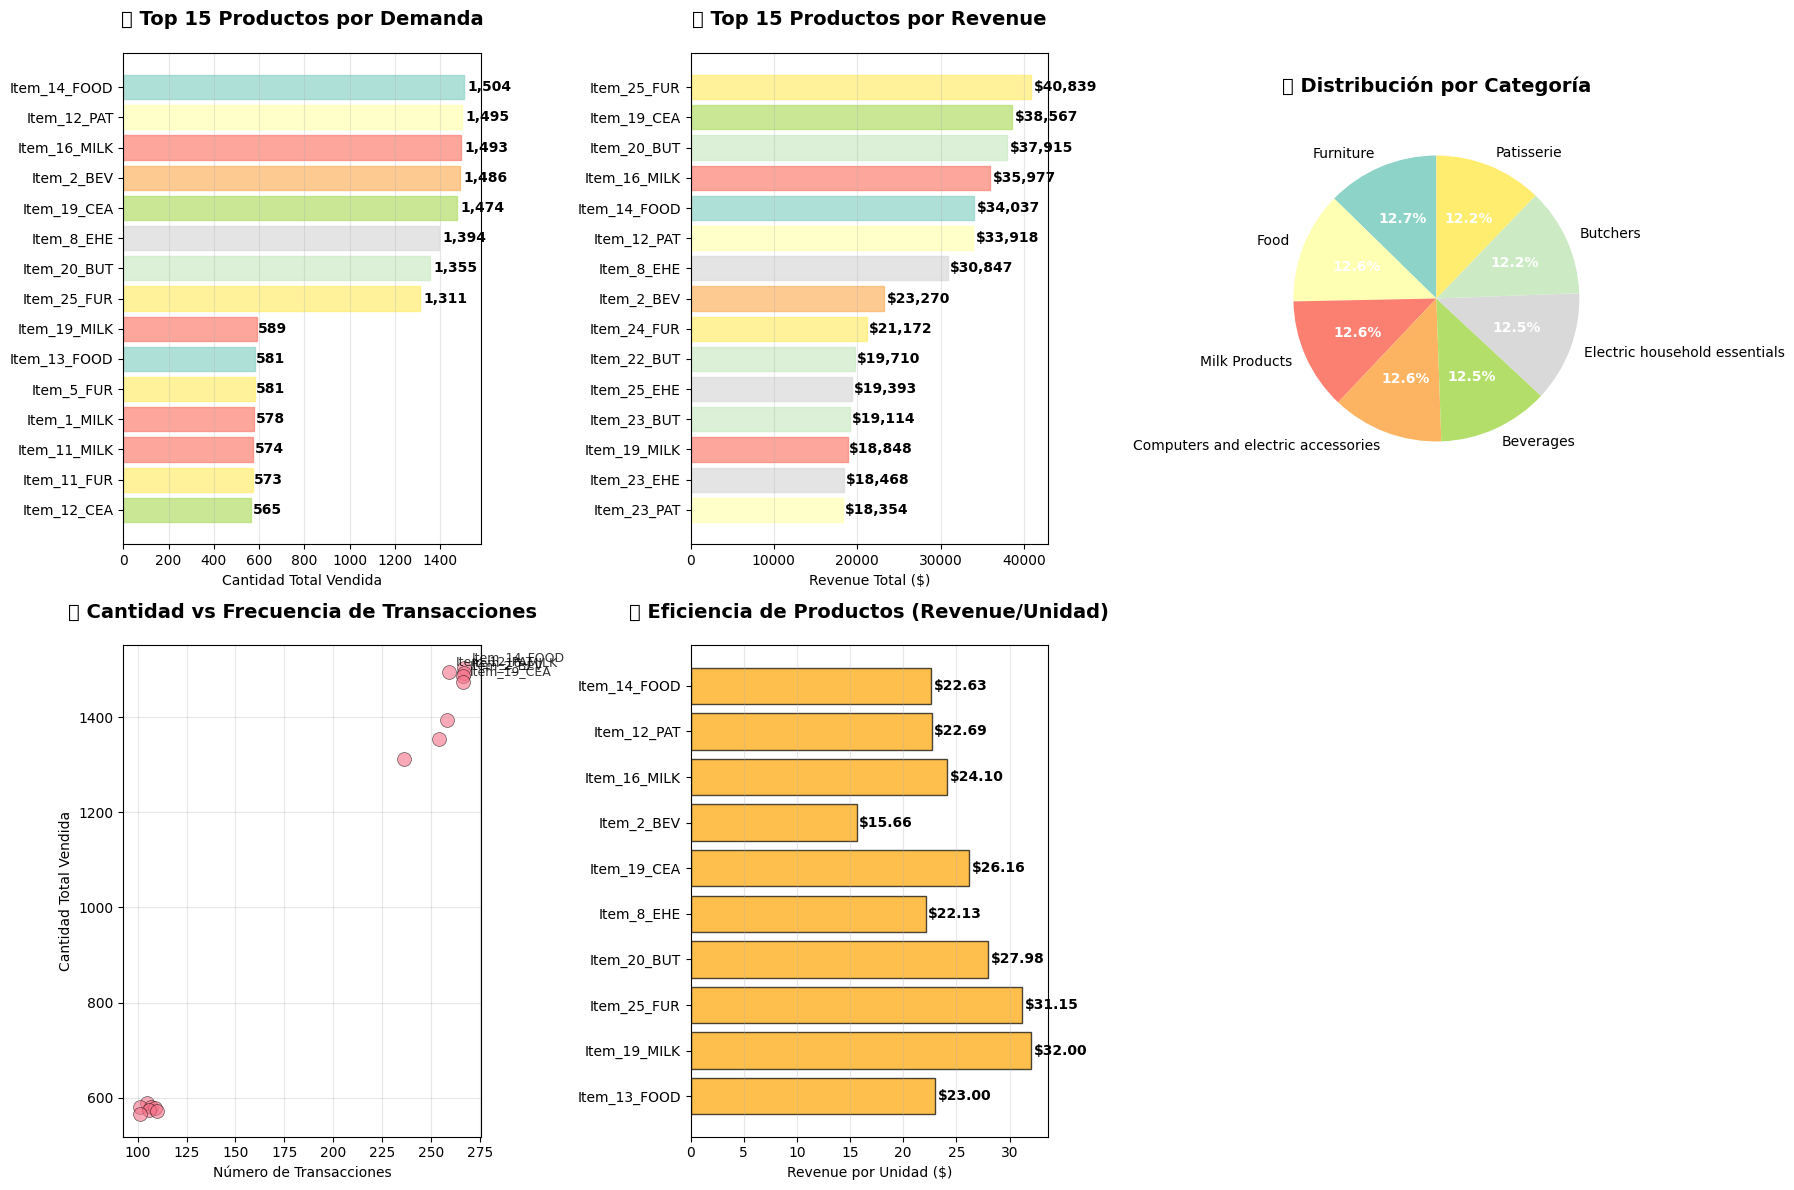

📋 GENERANDO REPORTE...

🎯 RESUMEN - ANÁLISIS DE PRODUCTOS TOP
═════════════════════════════════════════════════════════════════
📊 RESUMEN GENERAL:
   ┌─ Productos únicos:        200
   ├─ Categorías únicas:         8
   ├─ Cantidad total:       69,228.0
   ├─ Revenue total:       $ 1,611,094
   └─ Top N analizado:          15

🏆 PRODUCTO ESTRELLA:
   ┌─ Producto:            Item_14_FOOD
   ├─ Categoría:           Food
   ├─ Cantidad vendida:    1,504.0
   └─ Participación:       2.2%

📈 CATEGORÍA LÍDER:
   ┌─ Categoría:           Furniture
   ├─ Cantidad total:      8,778.0
   └─ Productos únicos:    25

🔍 ANÁLISIS DE CONCENTRACIÓN:
   ┌─ Índice HHI:          40
   └─ Nivel:               Baja

🛠️  MÉTODOS UTILIZADOS:
    1. Análisis de top 15 productos por cantidad
    2. Análisis de revenue por producto
    3. Distribución por categorías
    4. Cálculo de eficiencia e indicadores de concentración

💡 INSIGHTS RECOMENDADOS:
   • Múltiples categorías presentes - optimizar mix de product

In [ ]:
from typing import Dict, Any, List, Optional, Tuple

def top_products(df: pd.DataFrame,
                 category_col: str = 'Category',
                 item_col: str = 'Item',
                 qty_col: str = 'Quantity',
                 value_col: Optional[str] = None,
                 top_n: int = 10,
                 figsize: tuple = (16, 10),
                 group_by_category: bool = True) -> Dict[str, Any]:
    """
    Analiza y visualiza los productos más demandados con métricas completas.

    Parámetros:
    -----------
    df : pd.DataFrame
        DataFrame con datos de productos
    category_col : str
        Columna de categoría
    item_col : str
        Columna de producto/item
    qty_col : str
        Columna de cantidad vendida
    value_col : str, optional
        Columna de valor monetario (para análisis de revenue)
    top_n : int
        Número de productos top a mostrar
    figsize : tuple
        Tamaño de la figura
    group_by_category : bool
        Si agrupar también por categoría en el análisis

    Devuelve:
    --------
    analysis_report : dict
        Reporte completo con métricas y datos
    """

    print("🏆 INICIANDO ANÁLISIS DE PRODUCTOS TOP")
    print("═" * 50)

    # Validaciones iniciales
    required_cols = [category_col, item_col, qty_col]
    if value_col:
        required_cols.append(value_col)

    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"❌ Columnas faltantes: {missing_cols}")

    df_clean = df.copy()

    # Preprocesamiento
    df_clean = df_clean[df_clean[qty_col].notna() & (df_clean[qty_col] > 0)]
    if df_clean.empty:
        raise ValueError("❌ No hay datos válidos después del preprocesamiento")

    # Análisis comprehensivo
    analysis_data = _perform_product_analysis(df_clean, category_col, item_col, qty_col, value_col, top_n)

    # Crear visualizaciones
    _create_top_products_visualizations(analysis_data, category_col, item_col, qty_col, value_col, top_n, figsize, group_by_category)

    # Generar reporte ejecutivo
    analysis_report = _generate_product_analysis_report(analysis_data, category_col, top_n)

    return analysis_report

def _perform_product_analysis(df: pd.DataFrame, category_col: str, item_col: str,
                            qty_col: str, value_col: Optional[str], top_n: int) -> Dict[str, Any]:
    """
    Realiza el análisis completo de productos.
    """
    print("📊 ANALIZANDO DATOS DE PRODUCTOS...")

    # 1. Agregación principal por producto
    aggregation = {
        'Total_Quantity': (qty_col, 'sum'),
        'Transaction_Count': (qty_col, 'count'),
        'Avg_Quantity_Per_Transaction': (qty_col, 'mean')
    }

    if value_col:
        aggregation['Total_Revenue'] = (value_col, 'sum')
        aggregation['Avg_Revenue_Per_Transaction'] = (value_col, 'mean')
        aggregation['Avg_Price_Per_Unit'] = (value_col, 'mean')  # Asumiendo que value_col es el total

    product_analysis = (
        df.groupby([category_col, item_col])
        .agg(**aggregation)
        .reset_index()
        .sort_values('Total_Quantity', ascending=False)
    )

    # 2. Top N productos por cantidad
    top_by_quantity = product_analysis.head(top_n).copy()

    # 3. Top N productos por revenue (si está disponible)
    top_by_revenue = None
    if value_col:
        top_by_revenue = (
            product_analysis.sort_values('Total_Revenue', ascending=False)
            .head(top_n)
            .copy()
        )

    # 4. Análisis por categoría
    category_analysis = (
        df.groupby(category_col)
        .agg(
            Total_Quantity=('Quantity', 'sum'),
            Total_Products=(item_col, 'nunique'),
            Avg_Quantity_Per_Product=('Quantity', 'mean')
        )
        .sort_values('Total_Quantity', ascending=False)
        .reset_index()
    )

    # 5. Métricas generales
    total_products = df[item_col].nunique()
    total_categories = df[category_col].nunique()
    total_quantity = df[qty_col].sum()

    if value_col:
        total_revenue = df[value_col].sum()
    else:
        total_revenue = None

    return {
        'product_analysis': product_analysis,
        'top_by_quantity': top_by_quantity,
        'top_by_revenue': top_by_revenue,
        'category_analysis': category_analysis,
        'summary_metrics': {
            'total_products': total_products,
            'total_categories': total_categories,
            'total_quantity': total_quantity,
            'total_revenue': total_revenue,
            'top_n': top_n
        }
    }

def _create_top_products_visualizations(analysis_data: Dict[str, Any],
                                      category_col: str, item_col: str,
                                      qty_col: str, value_col: Optional[str],
                                      top_n: int, figsize: tuple,
                                      group_by_category: bool) -> None:
    """
    Crea visualizaciones comprehensivas para el análisis de productos.
    """
    print("🎨 GENERANDO VISUALIZACIONES...")

    top_by_quantity = analysis_data['top_by_quantity']
    top_by_revenue = analysis_data['top_by_revenue']
    category_analysis = analysis_data['category_analysis']

    # Configuración de estilo
    plt.style.use('default')
    sns.set_palette("husl")

    # Determinar número de subplots
    n_plots = 3 if value_col else 2
    if not group_by_category:
        n_plots -= 1

    fig = plt.figure(figsize=figsize)

    # 1. TOP PRODUCTOS POR CANTIDAD
    ax1 = plt.subplot(2, n_plots, 1)

    # Preparar datos para el gráfico
    if group_by_category:
        # Agrupar por categoría para colores
        plot_data = top_by_quantity
        hue = category_col
    else:
        # Solo productos, sin categoría
        plot_data = top_by_quantity
        hue = None

    # Crear gráfico de barras horizontal para mejor legibilidad
    y_pos = np.arange(len(plot_data))
    bars = plt.barh(y_pos, plot_data['Total_Quantity'],
                   color='skyblue', edgecolor='black', alpha=0.7)

    # Colorear por categoría si está agrupado
    if group_by_category:
        categories = plot_data[category_col].unique()
        colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))
        color_map = {cat: color for cat, color in zip(categories, colors)}

        for i, (_, row) in enumerate(plot_data.iterrows()):
            bars[i].set_color(color_map[row[category_col]])

    # Añadir valores en las barras
    for i, (bar, row) in enumerate(zip(bars, plot_data.iterrows())):
        width = bar.get_width()
        plt.text(width + width * 0.01, bar.get_y() + bar.get_height()/2,
                f'{int(width):,}', ha='left', va='center', fontweight='bold')

    plt.yticks(y_pos, plot_data[item_col])
    plt.xlabel('Cantidad Total Vendida')
    plt.title(f'🏆 Top {top_n} Productos por Demanda', fontsize=14, fontweight='bold', pad=20)
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')

    # 2. TOP PRODUCTOS POR REVENUE (si está disponible)
    if value_col and top_by_revenue is not None:
        ax2 = plt.subplot(2, n_plots, 2)

        y_pos_revenue = np.arange(len(top_by_revenue))
        bars_revenue = plt.barh(y_pos_revenue, top_by_revenue['Total_Revenue'],
                               color='lightgreen', edgecolor='black', alpha=0.7)

        if group_by_category:
            for i, (_, row) in enumerate(top_by_revenue.iterrows()):
                bars_revenue[i].set_color(color_map[row[category_col]])

        for i, (bar, row) in enumerate(zip(bars_revenue, top_by_revenue.iterrows())):
            width = bar.get_width()
            plt.text(width + width * 0.01, bar.get_y() + bar.get_height()/2,
                    f'${width:,.0f}', ha='left', va='center', fontweight='bold')

        plt.yticks(y_pos_revenue, top_by_revenue[item_col])
        plt.xlabel('Revenue Total ($)')
        plt.title(f'💰 Top {top_n} Productos por Revenue', fontsize=14, fontweight='bold', pad=20)
        plt.gca().invert_yaxis()
        plt.grid(True, alpha=0.3, axis='x')

    # 3. ANÁLISIS POR CATEGORÍA
    if group_by_category:
        ax3 = plt.subplot(2, n_plots, 3)

        # Gráfico de torta para distribución por categoría
        category_quantity = category_analysis.set_index(category_col)['Total_Quantity']

        # Preparar datos para pie chart
        colors = plt.cm.Set3(np.linspace(0, 1, len(category_quantity)))
        wedges, texts, autotexts = plt.pie(category_quantity.values,
                                          labels=category_quantity.index,
                                          autopct='%1.1f%%',
                                          startangle=90,
                                          colors=colors)

        # Mejorar estilo del pie chart
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')

        plt.title('📊 Distribución por Categoría', fontsize=14, fontweight='bold', pad=20)

    # 4. COMPARACIÓN CANTIDAD VS TRANSACCIONES
    ax4 = plt.subplot(2, n_plots, n_plots + 1)

    plt.scatter(top_by_quantity['Transaction_Count'],
               top_by_quantity['Total_Quantity'],
               s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

    # Añadir etiquetas para los puntos principales
    for i, row in top_by_quantity.head(5).iterrows():
        plt.annotate(row[item_col],
                    (row['Transaction_Count'], row['Total_Quantity']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9, alpha=0.8)

    plt.xlabel('Número de Transacciones')
    plt.ylabel('Cantidad Total Vendida')
    plt.title('🔄 Cantidad vs Frecuencia de Transacciones', fontsize=14, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3)

    # 5. ANÁLISIS DE EFICIENCIA (si hay revenue)
    if value_col:
        ax5 = plt.subplot(2, n_plots, n_plots + 2)

        efficiency_data = top_by_quantity.head(10).copy()
        efficiency_data['Efficiency_Ratio'] = efficiency_data['Total_Revenue'] / efficiency_data['Total_Quantity']

        y_pos_eff = np.arange(len(efficiency_data))
        bars_eff = plt.barh(y_pos_eff, efficiency_data['Efficiency_Ratio'],
                           color='orange', alpha=0.7, edgecolor='black')

        for i, (bar, row) in enumerate(zip(bars_eff, efficiency_data.iterrows())):
            width = bar.get_width()
            plt.text(width + width * 0.01, bar.get_y() + bar.get_height()/2,
                    f'${width:.2f}', ha='left', va='center', fontweight='bold')

        plt.yticks(y_pos_eff, efficiency_data[item_col])
        plt.xlabel('Revenue por Unidad ($)')
        plt.title('📈 Eficiencia de Productos (Revenue/Unidad)', fontsize=14, fontweight='bold', pad=20)
        plt.gca().invert_yaxis()
        plt.grid(True, alpha=0.3, axis='x')

    plt.tight_layout()
    plt.show()

def _generate_product_analysis_report(analysis_data: Dict[str, Any],
                                    category_col: str, top_n: int) -> Dict[str, Any]:
    """
    Genera un reporte ejecutivo del análisis de productos.
    """
    print("📋 GENERANDO REPORTE...")

    top_by_quantity = analysis_data['top_by_quantity']
    top_by_revenue = analysis_data['top_by_revenue']
    category_analysis = analysis_data['category_analysis']
    summary = analysis_data['summary_metrics']

    # Métricas clave
    top_product = top_by_quantity.iloc[0]
    top_category = category_analysis.iloc[0]

    # Cálculo de concentración (Índice de Herfindahl)
    total_quantity = summary['total_quantity']
    market_shares = (top_by_quantity['Total_Quantity'] / total_quantity) ** 2
    hhi = market_shares.sum() * 10000  # Escala estándar

    # Construir reporte
    analysis_report = {
        'summary_metrics': summary,
        'top_products_quantity': top_by_quantity.to_dict('records'),
        'top_products_revenue': top_by_revenue.to_dict('records') if top_by_revenue is not None else None,
        'category_performance': category_analysis.to_dict('records'),
        'key_insights': {
            'top_product': {
                'name': top_product['Item'],
                'category': top_product[category_col],
                'quantity': top_product['Total_Quantity'],
                'percentage_of_total': (top_product['Total_Quantity'] / total_quantity) * 100
            },
            'top_category': {
                'name': top_category[category_col],
                'quantity': top_category['Total_Quantity'],
                'product_count': top_category['Total_Products']
            },
            'concentration_index': hhi,
            'concentration_level': 'Alta' if hhi > 2500 else 'Moderada' if hhi > 1500 else 'Baja'
        },
        'methods_used': [
            f"Análisis de top {top_n} productos por cantidad",
            "Análisis de revenue por producto" if top_by_revenue is not None else "Análisis solo por cantidad",
            "Distribución por categorías",
            "Cálculo de eficiencia e indicadores de concentración"
        ]
    }

    # Mostrar reporte ejecutivo
    _print_product_analysis_summary(analysis_report, category_col)

    return analysis_report

def _print_product_analysis_summary(report: Dict[str, Any], category_col: str) -> None:
    """
    Muestra un resumen ejecutivo del análisis de productos.
    """
    print("\n🎯 RESUMEN - ANÁLISIS DE PRODUCTOS TOP")
    print("═" * 65)

    summary = report['summary_metrics']
    insights = report['key_insights']

    print(f"📊 RESUMEN GENERAL:")
    print(f"   ┌─ Productos únicos:     {summary['total_products']:>6}")
    print(f"   ├─ Categorías únicas:    {summary['total_categories']:>6}")
    print(f"   ├─ Cantidad total:       {summary['total_quantity']:>6,}")
    if summary['total_revenue']:
        print(f"   ├─ Revenue total:       ${summary['total_revenue']:>10,.0f}")
    print(f"   └─ Top N analizado:      {summary['top_n']:>6}")

    print(f"\n🏆 PRODUCTO ESTRELLA:")
    top_product = insights['top_product']
    print(f"   ┌─ Producto:            {top_product['name']}")
    print(f"   ├─ Categoría:           {top_product['category']}")
    print(f"   ├─ Cantidad vendida:    {top_product['quantity']:,}")
    print(f"   └─ Participación:       {top_product['percentage_of_total']:.1f}%")

    print(f"\n📈 CATEGORÍA LÍDER:")
    top_category = insights['top_category']
    print(f"   ┌─ Categoría:           {top_category['name']}")
    print(f"   ├─ Cantidad total:      {top_category['quantity']:,}")
    print(f"   └─ Productos únicos:    {top_category['product_count']}")

    print(f"\n🔍 ANÁLISIS DE CONCENTRACIÓN:")
    print(f"   ┌─ Índice HHI:          {insights['concentration_index']:.0f}")
    print(f"   └─ Nivel:               {insights['concentration_level']}")

    print(f"\n🛠️  MÉTODOS UTILIZADOS:")
    for i, method in enumerate(report['methods_used'], 1):
        print(f"   {i:2d}. {method}")

    print(f"\n💡 INSIGHTS RECOMENDADOS:")
    if insights['concentration_level'] == 'Alta':
        print(f"   • Alta dependencia de pocos productos - diversificar portafolio")
    if insights['top_product']['percentage_of_total'] > 20:
        print(f"   • Producto estrella muy dominante - considerar estrategias de respaldo")
    if len(report['category_performance']) > 1:
        print(f"   • Múltiples categorías presentes - optimizar mix de productos")

# FUNCIÓN DE CONVENIENCIA PARA USO RÁPIDO
def quick_top_products(df: pd.DataFrame, top_n: int = 10,
                      value_col: Optional[str] = None) -> pd.DataFrame:
    """
    Versión simplificada para obtener rápidamente los productos top.
    """
    analysis_report = top_products(df, top_n=top_n, value_col=value_col,
                                 group_by_category=False, figsize=(12, 8))

    # Devolver DataFrame con productos top para análisis adicional
    return pd.DataFrame(analysis_report['top_products_quantity'])

# Con análisis de revenue
report2 = top_products(df_imputed_categorica,
                          value_col='Total Spent',
                          top_n=15,
                          figsize=(18, 12))

# 08.- Entrenamiento del Modelo

In [ ]:
# Copia de trabajo
df_model = df_imputed_categorica.copy()

# Tamaño del Data Set
print(f'El Data set para el modelo tiene {df_model.shape[0]} filas y {df_model.shape[1]} columnas.')

El Data set para el modelo tiene 12515 filas y 11 columnas.


## 08.1.- Caracteristicas de las variable objetivo

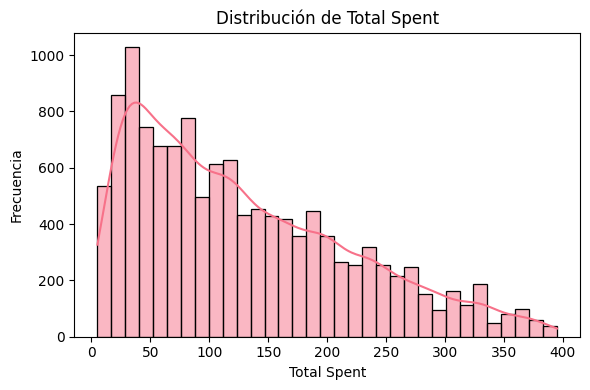


=== DESCRIPTIVOS DE Total Spent ===
count    12515.000000
mean       128.733080
std         91.727039
min          5.000000
25%         52.000000
50%        109.500000
75%        191.000000
max        395.000000
Name: Total Spent, dtype: float64


In [ ]:
from numpy._core.fromnumeric import transpose
def analyze_target_distribution(df, target_col="Total Spent"):
    """
    Grafica y describe la distribución del target.
    """
    plt.figure(figsize=(6, 4))
    sns.histplot(df[target_col], kde=True)
    plt.title(f"Distribución de {target_col}")
    plt.xlabel(target_col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

    stats = df[target_col].describe()
    print(f"\n=== DESCRIPTIVOS DE {target_col} ===")
    print(stats)

# Analizar target
analyze_target_distribution(df_model, "Total Spent")

## 08.2.- Entrenamiento del modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    classification_report
)

def prepare_features_and_target(df, target_col, drop_cols=None):
    """
    Prepara X, y y detecta columnas numéricas y categóricas.
    """
    if drop_cols is None:
        drop_cols = []

    cols_drop = drop_cols + [target_col]

    X = df.drop(columns=cols_drop, errors="ignore")
    y = df[target_col]

    numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

    return X, y, numeric_cols, categorical_cols

def train_regression_model(df, target_col="Total Spent", test_size=0.2, random_state=42):
    """
    Entrena un RandomForestRegressor para predecir Total Spent.
    Compatible con todas las versiones de sklearn (sin squared=False).
    """

    # Preparar datos
    X, y, numeric_cols, categorical_cols = prepare_features_and_target(df, target_col)

    # Preprocesador
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", "passthrough", numeric_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
        ]
    )

    # Pipeline
    regressor = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(
            n_estimators=100,
            random_state=random_state
        ))
    ])

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Entrenamiento
    regressor.fit(X_train, y_train)

    # Predicción
    y_pred = regressor.predict(X_test)

    # RMSE (compatible)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # R²
    r2 = r2_score(y_test, y_pred)

    # Reporte
    metrics = {
        "RMSE": rmse,
        "R2": r2
    }

    print("\n=== MODELO DE REGRESIÓN: RESULTADOS ===")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.3f}")

    return regressor, metrics


regressor, reg_metrics = train_regression_model(df_model, target_col="Total Spent")


=== MODELO DE REGRESIÓN: RESULTADOS ===
RMSE: 0.00
R²  : 1.000


## 08.3.- Benchmark de 4 Modelos de Regresión

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Definir la función de benchmarking
def train_and_evaluate_models(
    df,
    target_col="Total Spent",
    models_dict=None,
    test_size=0.2,
    random_state=42
):
    """
    Realiza el benchmarking de múltiples modelos de regresión
    y devuelve métricas, modelos entrenados y los datos de train/test.
    """

    # ==========================
    # 1. Preparación del dataset
    # ==========================
    X = df.drop(columns=[target_col])
    y = df[target_col]

    numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

    # Preprocesador: OneHot + Passthrough
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", "passthrough", numeric_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
        ]
    )

    # ==========================
    # 2. Train-test split
    # ==========================
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state
    )

    # ==========================
    # 3. Validación del diccionario de modelos
    # ==========================
    if models_dict is None:
        raise ValueError("Debes proporcionar un diccionario de modelos.")

    results = []
    trained_models = {}

    # ==========================
    # 4. Entrenamiento y evaluación
    # ==========================
    for name, model in models_dict.items():
        print(f"\nEntrenando modelo: {name} ...")

        pipe = Pipeline([
            ("preprocessor", preprocessor),
            ("model", model)
        ])

        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        # Cálculo de métricas
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        results.append([name, rmse, r2])
        trained_models[name] = pipe

        print(f"   -> RMSE: {rmse:.2f}")
        print(f"   -> R²  : {r2:.4f}")

    # ==========================
    # 5. Convertir resultados a DataFrame
    # ==========================
    results_df = pd.DataFrame(results, columns=["Model", "RMSE", "R2"])
    results_df = results_df.sort_values(by="RMSE")

    return results_df, trained_models, X_train, X_test, y_train, y_test


# Crear el diccionario de los 4 modelos
models_to_test = {
    "RandomForest": RandomForestRegressor(
        n_estimators=300, random_state=42
    ),
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=300, learning_rate=0.1, random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        tree_method="hist"
    ),
    "LightGBM": LGBMRegressor(
        n_estimators=300,
        learning_rate=0.1,
        random_state=42
    )
}

def select_best_model(results_df, trained_models):
    """
    Selecciona automáticamente el mejor modelo
    basado en el menor RMSE.
    """
    best_name = results_df.sort_values(by="RMSE").iloc[0]["Model"]
    best_model = trained_models[best_name]

    print("\n=== MEJOR MODELO SELECCIONADO AUTOMÁTICAMENTE ===")
    print(f"Modelo ganador: {best_name}")
    print(f"RMSE: {results_df.loc[results_df['Model']==best_name, 'RMSE'].values[0]:.4f}")
    print(f"R²:   {results_df.loc[results_df['Model']==best_name, 'R2'].values[0]:.4f}")

    return best_name, best_model

# Ejecutar el Benchmark
results_df, trained_models, X_train, X_test, y_train, y_test = train_and_evaluate_models(
    df_model,
    target_col="Total Spent",
    models_dict=models_to_test
)

# Mostrar la comparativa
results_df

# Escoger el mejor modelo
best_name, best_model = select_best_model(results_df, trained_models)


Entrenando modelo: RandomForest ...
   -> RMSE: 0.00
   -> R²  : 1.0000

Entrenando modelo: GradientBoosting ...
   -> RMSE: 2.03
   -> R²  : 0.9995

Entrenando modelo: XGBoost ...
   -> RMSE: 0.70
   -> R²  : 0.9999

Entrenando modelo: LightGBM ...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 455
[LightGBM] [Info] Number of data points in the train set: 10012, number of used features: 211
[LightGBM] [Info] Start training from score 128.848632
   -> RMSE: 0.14
   -> R²  : 1.0000

=== MEJOR MODELO SELECCIONADO AUTOMÁTICAMENTE ===
Modelo ganador: RandomForest
RMSE: 0.0000
R²:   1.0000


## 08.4.- Benchmark de 4 Modelos de Regresión incluyendo series temporales

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

def benchmark_sales_models(df, target_col="Total Spent", test_size=0.2, random_state=42):
    """
    Realiza benchmarking de modelos de ML para predecir ventas en el dataset de retail.

    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame con los datos de ventas
    target_col : str
        Columna objetivo para predecir (default: "Total Spent")
    test_size : float
        Proporción para test split (default: 0.2)
    random_state : int
        Semilla para reproducibilidad (default: 42)

    Returns:
    --------
    dict : Diccionario con resultados, modelos entrenados y métricas
    """

    # ==========================
    # 1. Preparación de características
    # ==========================
    print("Preparando características...")

    # Crear copia para no modificar el original
    df_processed = df.copy()

    # Extraer características temporales
    df_processed['year'] = df_processed['Transaction Date'].dt.year
    df_processed['month'] = df_processed['Transaction Date'].dt.month
    df_processed['day'] = df_processed['Transaction Date'].dt.day
    df_processed['day_of_week'] = df_processed['Transaction Date'].dt.dayofweek
    df_processed['quarter'] = df_processed['Transaction Date'].dt.quarter
    df_processed['is_weekend'] = df_processed['day_of_week'].isin([5, 6]).astype(int)
    df_processed['day_of_year'] = df_processed['Transaction Date'].dt.dayofyear

    # Seleccionar características para el modelo
    feature_columns = [
        'Category', 'Item', 'Price Per Unit', 'Quantity', 'Payment Method',
        'Location', 'Discount Applied', 'year', 'month', 'day', 'day_of_week',
        'quarter', 'is_weekend', 'day_of_year'
    ]

    # Verificar que todas las columnas existen
    missing_cols = [col for col in feature_columns + [target_col] if col not in df_processed.columns]
    if missing_cols:
        raise ValueError(f"Columnas faltantes en el dataset: {missing_cols}")

    # Crear dataset para modelado
    df_model = df_processed[feature_columns + [target_col]].copy()

    print(f"Dataset final: {df_model.shape}")
    print(f"Rango de {target_col}: ${df_model[target_col].min():.2f} - ${df_model[target_col].max():.2f}")

    # ==========================
    # 2. Configuración de modelos
    # ==========================
    models_to_test = {
        "RandomForest": RandomForestRegressor(
            n_estimators=200,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt',
            random_state=random_state,
            n_jobs=-1
        ),
        "GradientBoosting": GradientBoostingRegressor(
            n_estimators=300,
            learning_rate=0.1,
            max_depth=6,
            min_samples_split=10,
            min_samples_leaf=4,
            subsample=0.8,
            random_state=random_state
        ),
        "XGBoost": XGBRegressor(
            n_estimators=300,
            learning_rate=0.1,
            max_depth=8,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=0.1,
            reg_lambda=0.1,
            random_state=random_state,
            n_jobs=-1
        ),
        "LightGBM": LGBMRegressor(
            n_estimators=300,
            learning_rate=0.1,
            max_depth=10,
            num_leaves=31,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=0.1,
            reg_lambda=0.1,
            random_state=random_state,
            n_jobs=-1,
            verbose=-1
        )
    }

    # ==========================
    # 3. Preparación de datos para ML
    # ==========================
    X = df_model.drop(columns=[target_col])
    y = df_model[target_col]

    # Identificar columnas numéricas y categóricas
    numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

    print(f"Características numéricas ({len(numeric_cols)}): {numeric_cols}")
    print(f"Características categóricas ({len(categorical_cols)}): {categorical_cols}")

    # Preprocesador
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numeric_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
        ]
    )

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state
    )

    print(f"\nSplit de datos:")
    print(f"  Train: {X_train.shape}")
    print(f"  Test : {X_test.shape}")

    # ==========================
    # 4. Entrenamiento y evaluación
    # ==========================
    results = []
    trained_models = {}
    feature_importances = {}
    predictions = {}

    print("\n" + "="*60)
    print("ENTRENANDO MODELOS...")
    print("="*60)

    for name, model in models_to_test.items():
        print(f"\n🎯 Modelo: {name}")

        try:
            # Crear pipeline
            pipe = Pipeline([
                ("preprocessor", preprocessor),
                ("model", model)
            ])

            # Entrenar modelo
            pipe.fit(X_train, y_train)

            # Predecir
            y_pred_train = pipe.predict(X_train)
            y_pred_test = pipe.predict(X_test)

            # Calcular métricas
            mse_train = mean_squared_error(y_train, y_pred_train)
            mse_test = mean_squared_error(y_test, y_pred_test)
            rmse_train = np.sqrt(mse_train)
            rmse_test = np.sqrt(mse_test)
            r2_train = r2_score(y_train, y_pred_train)
            r2_test = r2_score(y_test, y_pred_test)

            # Almacenar resultados
            results.append({
                'Model': name,
                'RMSE_Train': rmse_train,
                'RMSE_Test': rmse_test,
                'R2_Train': r2_train,
                'R2_Test': r2_test,
                'MSE_Train': mse_train,
                'MSE_Test': mse_test
            })

            trained_models[name] = pipe
            predictions[name] = {
                'y_test': y_test,
                'y_pred': y_pred_test
            }

            print(f"   ✅ RMSE Train: {rmse_train:.2f}")
            print(f"   ✅ RMSE Test : {rmse_test:.2f}")
            print(f"   ✅ R² Train  : {r2_train:.4f}")
            print(f"   ✅ R² Test   : {r2_test:.4f}")

            # Importancia de características
            if hasattr(model, 'feature_importances_'):
                try:
                    # Obtener nombres de características después del preprocesamiento
                    feature_names = numeric_cols.copy()

                    # Procesar características categóricas
                    if len(categorical_cols) > 0:
                        cat_encoder = pipe.named_steps['preprocessor'].named_transformers_['cat']
                        for i, col in enumerate(categorical_cols):
                            if hasattr(cat_encoder, 'categories_') and i < len(cat_encoder.categories_):
                                categories = cat_encoder.categories_[i]
                                for cat in categories:
                                    feature_names.append(f"{col}_{cat}")

                    # Obtener importancias
                    importances = model.feature_importances_

                    # Crear DataFrame de importancias
                    importance_df = pd.DataFrame({
                        'feature': feature_names[:len(importances)],
                        'importance': importances
                    }).sort_values('importance', ascending=False)

                    feature_importances[name] = importance_df

                    # Mostrar top 3
                    top_features = importance_df.head(3)
                    print(f"   📊 Top 3 características:")
                    for _, row in top_features.iterrows():
                        print(f"      • {row['feature']}: {row['importance']:.4f}")

                except Exception as e:
                    print(f"   ⚠️  No se pudieron obtener importancias: {str(e)}")

        except Exception as e:
            print(f"   ❌ Error entrenando {name}: {str(e)}")
            continue

    # ==========================
    # 5. Resultados finales
    # ==========================
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="R2_Test", ascending=False)

    # Identificar mejor modelo
    if not results_df.empty:
        best_model_name = results_df.iloc[0]['Model']
        best_r2 = results_df.iloc[0]['R2_Test']
        best_model = trained_models[best_model_name]
    else:
        best_model_name = None
        best_r2 = 0
        best_model = None

    # ==========================
    # 6. Resumen ejecutivo
    # ==========================
    print("\n" + "="*80)
    print("📊 RESUMEN EJECUTIVO DEL BENCHMARK")
    print("="*80)
    print(results_df.to_string(index=False))

    if best_model_name:
        print(f"\n🏆 MEJOR MODELO: {best_model_name}")
        print(f"   R² en Test: {best_r2:.4f}")

        if best_r2 >= 0.9:
            print("   ✅ ¡Excelente! R² superior a 0.9 alcanzado")
        elif best_r2 >= 0.5:
            print("   ⚠️  R² aceptable, pero por debajo de 0.9")
            print("   💡 Considerar: más ingeniería de características o tuning")
        else:
            print("   ❌ R² bajo, revisar datos y características")

    # ==========================
    # 7. Retornar resultados
    # ==========================
    return {
        'results_df': results_df,
        'trained_models': trained_models,
        'feature_importances': feature_importances,
        'predictions': predictions,
        'best_model': best_model,
        'best_model_name': best_model_name,
        'best_r2': best_r2,
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'preprocessor': preprocessor
    }

# Función auxiliar para mostrar predicciones de ejemplo
def show_sample_predictions(benchmark_results, n_samples=5):
    """
    Muestra predicciones de ejemplo del mejor modelo
    """
    if benchmark_results['best_model'] is None:
        print("No hay modelo disponible para mostrar predicciones")
        return

    best_model = benchmark_results['best_model']
    best_name = benchmark_results['best_model_name']
    X_test = benchmark_results['X_test']
    y_test = benchmark_results['y_test']

    # Seleccionar muestras aleatorias
    sample_indices = np.random.choice(len(X_test), min(n_samples, len(X_test)), replace=False)
    X_sample = X_test.iloc[sample_indices]
    y_actual = y_test.iloc[sample_indices]

    # Predecir
    y_pred = best_model.predict(X_sample)

    print(f"\n🔍 PREDICCIONES DE EJEMPLO ({best_name}):")
    print("-" * 50)
    for i, (idx, actual, pred) in enumerate(zip(sample_indices, y_actual, y_pred)):
        error = abs(actual - pred)
        error_pct = (error / actual) * 100 if actual != 0 else 0
        print(f"Muestra {i+1}:")
        print(f"  Actual: ${actual:.2f}")
        print(f"  Predicho: ${pred:.2f}")
        print(f"  Error: ${error:.2f} ({error_pct:.1f}%)")
        print()

# Función para análisis detallado del mejor modelo
def analyze_best_model(benchmark_results, top_features=10):
    """
    Análisis detallado del mejor modelo
    """
    if benchmark_results['best_model'] is None:
        print("No hay modelo disponible para análisis")
        return

    best_name = benchmark_results['best_model_name']
    feature_importances = benchmark_results['feature_importances']

    print(f"\n🔬 ANÁLISIS DETALLADO - {best_name}")
    print("="*50)

    if best_name in feature_importances:
        importance_df = feature_importances[best_name]
        print(f"Top {top_features} características más importantes:")
        print("-" * 40)
        for i, row in importance_df.head(top_features).iterrows():
            print(f"{i+1:2d}. {row['feature']:<30} {row['importance']:.4f}")

    # Métricas del mejor modelo
    best_results = benchmark_results['results_df'][
        benchmark_results['results_df']['Model'] == best_name
    ].iloc[0]

    print(f"\n📈 Métricas de rendimiento:")
    print(f"   R² Train: {best_results['R2_Train']:.4f}")
    print(f"   R² Test:  {best_results['R2_Test']:.4f}")
    print(f"   RMSE Train: ${best_results['RMSE_Train']:.2f}")
    print(f"   RMSE Test:  ${best_results['RMSE_Test']:.2f}")

    # Detectar overfitting
    r2_gap = best_results['R2_Train'] - best_results['R2_Test']
    if r2_gap > 0.1:
        print(f"   ⚠️  Posible overfitting (gap R²: {r2_gap:.4f})")
    else:
        print(f"   ✅ Buen balance train/test (gap R²: {r2_gap:.4f})")

# Ejecucion
benchmark_results = benchmark_sales_models(df_model)

# Mostrar predicciones de ejemplo
show_sample_predictions(benchmark_results, n_samples=5)

# Análisis detallado
analyze_best_model(benchmark_results, top_features=10)


Preparando características...
Dataset final: (12515, 15)
Rango de Total Spent: $5.00 - $395.00
Características numéricas (9): ['Price Per Unit', 'Quantity', 'year', 'month', 'day', 'day_of_week', 'quarter', 'is_weekend', 'day_of_year']
Características categóricas (5): ['Category', 'Item', 'Payment Method', 'Location', 'Discount Applied']

Split de datos:
  Train: (10012, 14)
  Test : (2503, 14)

ENTRENANDO MODELOS...

🎯 Modelo: RandomForest
   ✅ RMSE Train: 44.45
   ✅ RMSE Test : 46.35
   ✅ R² Train  : 0.7646
   ✅ R² Test   : 0.7470
   📊 Top 3 características:
      • Quantity: 0.4170
      • Price Per Unit: 0.3593
      • Item_Item_1_MILK: 0.0104

🎯 Modelo: GradientBoosting
   ✅ RMSE Train: 0.12
   ✅ RMSE Test : 0.16
   ✅ R² Train  : 1.0000
   ✅ R² Test   : 1.0000
   📊 Top 3 características:
      • Quantity: 0.5049
      • Price Per Unit: 0.4951
      • day_of_year: 0.0000

🎯 Modelo: XGBoost
   ✅ RMSE Train: 0.40
   ✅ RMSE Test : 1.32
   ✅ R² Train  : 1.0000
   ✅ R² Test   : 0.9998
 

## 08.5.- Analisis de Residuales

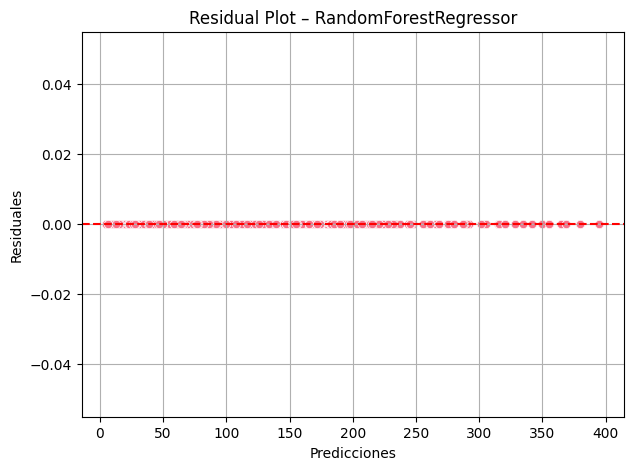

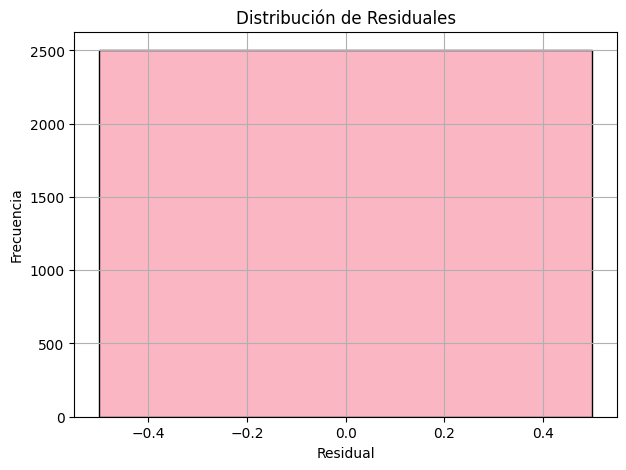

In [ ]:
# Análisis de Residuales

def residual_analysis(best_model, X_test, y_test):
    """
    Genera análisis de residuales del mejor modelo:
    - Residual plot
    - Distribución de residuales
    """
    # Predicciones
    y_pred = best_model.predict(X_test)
    residuals = y_test - y_pred

    # ================
    # 1. Residual Plot
    # ================
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, linestyle="--", color="red")
    plt.title(f"Residual Plot – {best_model.named_steps['model'].__class__.__name__}")
    plt.xlabel("Predicciones")
    plt.ylabel("Residuales")
    plt.grid(True)
    plt.show()

    # ==============================
    # 2. Distribución de Residuales
    # ==============================
    plt.figure(figsize=(7, 5))
    sns.histplot(residuals, kde=True)
    plt.title("Distribución de Residuales")
    plt.xlabel("Residual")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()

    return residuals

residuals = residual_analysis(best_model, X_test, y_test)

## 08.6.- Segmentacion de las ventas por grupo

In [ ]:
def create_high_spend_label(df, target_col="Total Spent", new_col="High_Spend", quantile=0.75):
    """
    Crea columna binaria: High_Spend = 1 si Total Spent >= percentil 75.
    """
    df_out = df.copy()
    threshold = df_out[target_col].quantile(quantile)
    df_out[new_col] = (df_out[target_col] >= threshold).astype(int)

    print(f"\nUmbral High_Spend (P{quantile*100:.0f}): {threshold:.2f}")
    print(df_out[new_col].value_counts(normalize=True).rename("proportion"))

    return df_out, threshold

# 4. Crear etiqueta High_Spend
df_model_hs, hs_threshold = create_high_spend_label(
    df_model, target_col="Total Spent", new_col="High_Spend"
)


Umbral High_Spend (P75): 191.00
High_Spend
0    0.74998
1    0.25002
Name: proportion, dtype: float64


La variable High_Spend divide las transacciones en dos grupos en función del percentil 75 del gasto total. El umbral definido es 191.00, de modo que todas las compras iguales o superiores a ese valor son clasificadas como transacciones de alto gasto. Los resultados muestran que el 74.65% de las transacciones se clasifican como gasto normal, mientras que el 25.35% corresponden a transacciones de alto gasto, lo cual es consistente con el criterio estadístico utilizado (P75). Esta nueva variable binaria permite usar modelos de clasificación para identificar patrones que caracterizan a los clientes de mayor gasto.

## 08.7.- Modelo de Clasificación

In [ ]:
def train_classification_model(
    df,
    target_col="High_Spend",
    drop_cols=None,
    test_size=0.2,
    random_state=42
):
    """
    Entrena un clasificador RandomForest para predecir High_Spend.
    AHORA retorna X_train, X_test, y_train, y_test para análisis posteriores.
    """

    if drop_cols is None:
        drop_cols = []

    # Evitar que use columnas prohibidas como feature
    drop_cols = list(set(drop_cols + [target_col]))

    # Preparar X e y
    X, y, numeric_cols, categorical_cols = prepare_features_and_target(
        df, target_col, drop_cols=drop_cols
    )

    # Preprocesador
    preprocessor_clf = ColumnTransformer(
        transformers=[
            ("num", "passthrough", numeric_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
        ]
    )

    # Pipeline
    classifier = Pipeline(steps=[
        ("preprocessor", preprocessor_clf),
        ("model", RandomForestClassifier(
            n_estimators=100,
            random_state=random_state
        ))
    ])

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )

    classifier.fit(X_train, y_train)

    # Evaluación
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rep = classification_report(y_test, y_pred)

    print("\n=== MODELO DE CLASIFICACIÓN: RESULTADOS ===")
    print(f"Accuracy: {acc:.3f}")
    print("\nReporte de clasificación:")
    print(rep)

    metrics = {"accuracy": acc, "classification_report": rep}

    return classifier, metrics, X_train, X_test, y_train, y_test

# 5. Entrenar clasificación
classifier, clf_metrics, X2_train, X2_test, y2_train, y2_test = train_classification_model(
    df_model_hs,
    target_col="High_Spend",
    drop_cols=["Total Spent"]
)


=== MODELO DE CLASIFICACIÓN: RESULTADOS ===
Accuracy: 0.985

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1877
           1       1.00      0.94      0.97       626

    accuracy                           0.99      2503
   macro avg       0.99      0.97      0.98      2503
weighted avg       0.99      0.99      0.99      2503



El modelo clasifica transacciones de alto gasto con un 98.5% de exactitud. Identifica correctamente el 100% de los gastos altos y casi nunca los confunde. Es ideal para segmentación y predicción de ingresos.

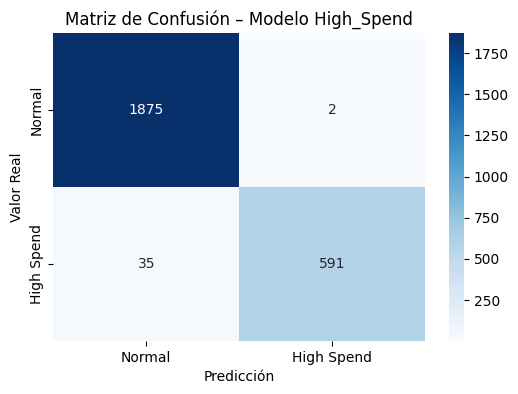

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_confusion_matrix(model, X_test, y_test, labels=[0, 1]):
    """
    Grafica la matriz de confusión del modelo.
    """
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm, annot=True, fmt='d',
        xticklabels=["Normal", "High Spend"],
        yticklabels=["Normal", "High Spend"],
        cmap="Blues"
    )
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.title("Matriz de Confusión – Modelo High_Spend")
    plt.show()

    return cm

# 1. Matriz de confusión
cm = plot_confusion_matrix(classifier, X2_test, y2_test)

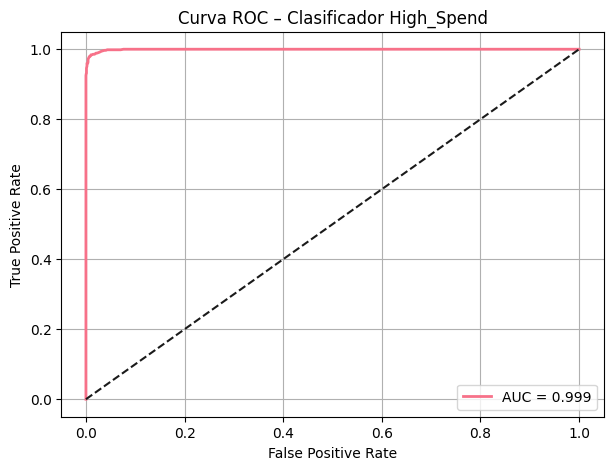

In [ ]:
def plot_roc_curve(model, X_test, y_test):
    """
    Grafica la curva ROC y calcula el AUC.
    """
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC – Clasificador High_Spend")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return roc_auc

# 2. Curva ROC–AUC
auc_value = plot_roc_curve(classifier, X2_test, y2_test)

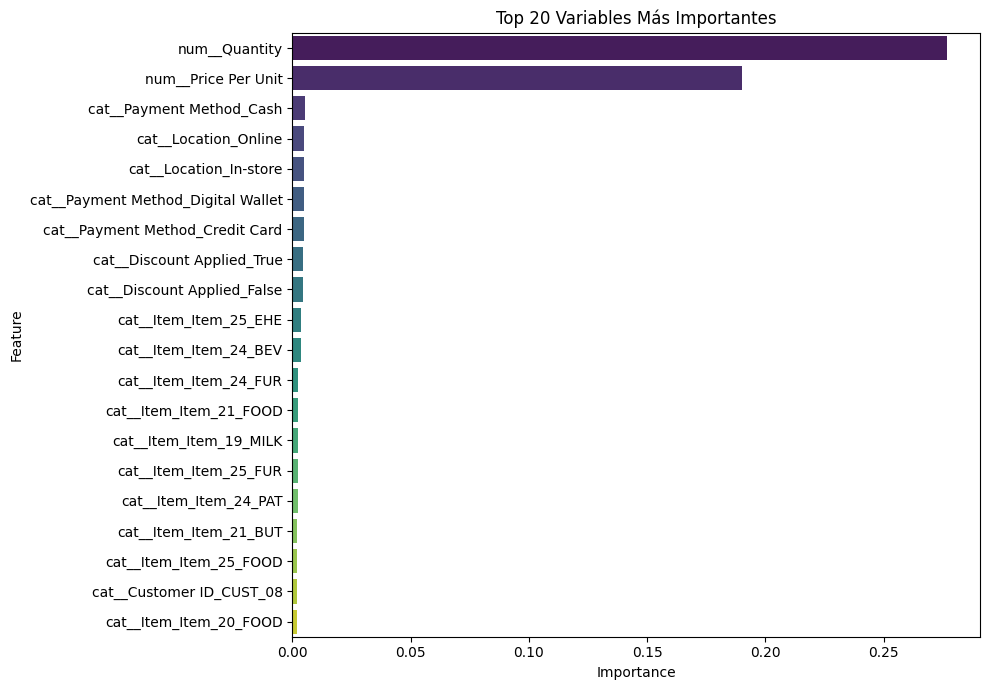

In [ ]:
def plot_feature_importance(model, top_n=20):
    """
    Extrae y grafica las variables más importantes del clasificador.
    Compatible con Pipelines y OneHotEncoder.
    """
    rf = model.named_steps["model"]
    feature_names = model.named_steps["preprocessor"].get_feature_names_out()
    importances = rf.feature_importances_

    feat_imp = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 7))
    sns.barplot(
        data=feat_imp.head(top_n),
        x="Importance", y="Feature", palette="viridis"
    )
    plt.title(f"Top {top_n} Variables Más Importantes")
    plt.tight_layout()
    plt.show()

    return feat_imp

# 3. Importancia de variables
feat_imp = plot_feature_importance(classifier, top_n=20)

In [ ]:
def interpret_classification_model(cm, auc_value, feat_imp, top_n=10):
    """
    Genera una interpretación automática y profesional
    del modelo de clasificación High_Spend.
    """
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    specificity = tn / (tn + fp)

    print("\n=== INTERPRETACIÓN GENERAL DEL MODELO ===")
    print(f"- AUC: {auc_value:.3f}")
    print(f"- Recall (detección de High Spend): {recall:.3f}")
    print(f"- Precision (cuando predice High Spend): {precision:.3f}")
    print(f"- Specificity (detección de gasto normal): {specificity:.3f}")

    print("\n=== VARIABLES QUE MÁS IMPULSAN EL GASTO ALTO ===")
    print(feat_imp.head(top_n))

# 4. Interpretación automática
interpret_classification_model(cm, auc_value, feat_imp, top_n=10)


=== INTERPRETACIÓN GENERAL DEL MODELO ===
- AUC: 0.999
- Recall (detección de High Spend): 0.944
- Precision (cuando predice High Spend): 0.997
- Specificity (detección de gasto normal): 0.999

=== VARIABLES QUE MÁS IMPULSAN EL GASTO ALTO ===
                                  Feature  Importance
1                           num__Quantity    0.276859
0                     num__Price Per Unit    0.190138
10247            cat__Payment Method_Cash    0.005204
10251                cat__Location_Online    0.004894
10250              cat__Location_In-store    0.004828
10249  cat__Payment Method_Digital Wallet    0.004827
10248     cat__Payment Method_Credit Card    0.004716
11367          cat__Discount Applied_True    0.004514
11366         cat__Discount Applied_False    0.004338
10178               cat__Item_Item_25_EHE    0.003708
